In [34]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import numpy as np
import pickle
import subprocess
import warnings
warnings.filterwarnings('ignore')

In [35]:
verbose=1

data_setting = 'tedvae_ihdp' # you can set tedvae_ihdp_b, the rest of datasets is not available in this example.
test_val_split = '547,100,100'
data_path = './datasets'
fedavg_strategies='fedavg_all,fedavg_all_vanilla,none' # none is TV isolated

n_nodes = 2

datasets =  np.arange(1,21) #datasets used in the experiment
#load the dict with imbalances

In [36]:
os.getcwd()

'/home/almo/CODE/federated_tedvae'

In [37]:

with open('imbalances.pkl', 'rb') as f:
    imbalances_dict = pickle.load(f)
    
imbalance_name = 'tedvae_ihdp_a_ablation_vanilla'#'tedvae_ihdp_a_random' # other option is 'tedvae_ihdp_a_ablation_vanilla'. To add more 
# imbalances, modify imbalances.pkl via 
# imbalances.py scrit
imbalance = imbalances_dict[imbalance_name] # string of the imbalance

In [38]:

with open('imbalances.pkl', 'rb') as f:
    imbalances_dict = pickle.load(f)
    
# imbalances.py scrit
imbalance = imbalances_dict[imbalance_name] # string of the imbalance

if not os.path.exists(f'results/{data_setting}'):
    os.makedirs(f'results/{data_setting}')

results_path = f'results/{data_setting}/{imbalance_name}'
imbalances = imbalances_dict[imbalance_name]
if not os.path.exists(results_path):
    os.makedirs(results_path)
    
print(results_path)

file = open(results_path + '/imbalances', 'wb')
np.save(file, imbalances)
file.close()


results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla


In [39]:
#FEDERATED EXPERIMENT

for imb in imbalances:
    _results_path = results_path + '/' + str(imb)
    if not os.path.exists(_results_path):
        os.makedirs(_results_path)
    for dataset in datasets:
        for fedavg in fedavg_strategies.split(','):
            command = ['python', "federated/fed_tedvae.py",
                               '--experiment', str(dataset),
                               '--nnodes', str(n_nodes),
                               '--verbose', str(0),
                               '--fedavg', fedavg,
                               '--datapath', data_path,
                               '--data_setting', data_setting,
                               '--resultspath', _results_path,
                               '--train_test_val_split', test_val_split,
                               '--treatment_split', str(imb)]
            
            # Run the script with the modified arguments using subprocess
            subprocess.run(command)
            




/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 80.17 - Domain[1] - TOTAL loss: 85.18
Domain[0] loss_reconstruction: 22.79 - Domain[1] loss_reconstruction: 22.62
Domain[0] loss_kl: 8.17 - Domain[1] loss_kl: 8.52
Domain[0] loss_disentanglement: 46.92 - Domain[1] loss_disentanglement: 51.7
Domain[0] loss_q_y: 31.73 - Domain[1] loss_q_y: 34.47
Domain[0] loss_q_t: 15.19 - Domain[1] loss_q_t: 17.23
Domain[0] elbo: 30.96 - Domain[1] elbo: 31.14
Domain[0] loss_p_y: 1.6 - Domain[1] loss_p_y: 1.68
Domain[0] loss_p_t: 0.69 - Domain[1] loss_p_t: 0.67
Domain[0] loss_p_zt: -11.85 - Domain[1] loss_p_zt: -11.66
Domain[0] loss_p_zc: -24.88 - Domain[1] loss_p_zc: -25.41
Domain[0] loss_q_zt: -10.68 - Domain[1] loss_q_zt: -10.45
Domain[0] loss_q_zc: -20.23 - Domain[1] loss_q_zc: -21.17
Domain[0] loss_q_zy: -10.2 - Domain[1] loss_q_zy: -9.89
Domain[0] loss_model: 2.29 - Domain[1] loss_model: 2.34
Domain[0] val_loss_p_t

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 80.51 - Domain[1] - TOTAL loss: 84.69
Domain[0] loss_reconstruction: 23.08 - Domain[1] loss_reconstruction: 22.83
Domain[0] loss_kl: 7.83 - Domain[1] loss_kl: 8.53
Domain[0] loss_disentanglement: 47.2 - Domain[1] loss_disentanglement: 50.87
Domain[0] loss_q_y: 32.18 - Domain[1] loss_q_y: 34.72
Domain[0] loss_q_t: 15.02 - Domain[1] loss_q_t: 16.15
Domain[0] elbo: 30.92 - Domain[1] elbo: 31.35
Domain[0] loss_p_y: 1.56 - Domain[1] loss_p_y: 1.75
Domain[0] loss_p_t: 0.83 - Domain[1] loss_p_t: 0.72
Domain[0] loss_p_zt: -11.89 - Domain[1] loss_p_zt: -11.87
Domain[0] loss_p_zc: -25.39 - Domain[1] loss_p_zc: -24.87
Domain[0] loss_q_zt: -10.85 - Domain[1] loss_q_zt: -10.77
Domain[0] loss_q_zc: -20.56 - Domain[1] loss_q_zc: -20.52
Domain[0] loss_q_zy: -11.12 - Domain[1] loss_q_zy: -9.42
Domain[0] loss_model: 2.39 - Domain[1] loss_model: 2.47
Domain[0] val_loss_p

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 95.02 - Domain[1] - TOTAL loss: 105.04
Domain[0] loss_reconstruction: 23.26 - Domain[1] loss_reconstruction: 23.37
Domain[0] loss_kl: 9.64 - Domain[1] loss_kl: 10.27
Domain[0] loss_disentanglement: 58.59 - Domain[1] loss_disentanglement: 68.06
Domain[0] loss_q_y: 43.09 - Domain[1] loss_q_y: 51.46
Domain[0] loss_q_t: 15.5 - Domain[1] loss_q_t: 16.6
Domain[0] elbo: 32.9 - Domain[1] elbo: 33.63
Domain[0] loss_p_y: 2.51 - Domain[1] loss_p_y: 2.52
Domain[0] loss_p_t: 1.02 - Domain[1] loss_p_t: 0.83
Domain[0] loss_p_zt: -12.9 - Domain[1] loss_p_zt: -12.73
Domain[0] loss_p_zc: -24.76 - Domain[1] loss_p_zc: -25.28
Domain[0] loss_q_zt: -10.7 - Domain[1] loss_q_zt: -10.53
Domain[0] loss_q_zc: -19.66 - Domain[1] loss_q_zc: -19.58
Domain[0] loss_q_zy: -10.58 - Domain[1] loss_q_zy: -10.12
Domain[0] loss_model: 3.53 - Domain[1] loss_model: 3.35
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 86.63 - Domain[1] - TOTAL loss: 78.17
Domain[0] loss_reconstruction: 22.12 - Domain[1] loss_reconstruction: 22.36
Domain[0] loss_kl: 9.31 - Domain[1] loss_kl: 7.68
Domain[0] loss_disentanglement: 52.78 - Domain[1] loss_disentanglement: 45.75
Domain[0] loss_q_y: 34.25 - Domain[1] loss_q_y: 32.41
Domain[0] loss_q_t: 18.53 - Domain[1] loss_q_t: 13.33
Domain[0] elbo: 31.44 - Domain[1] elbo: 30.03
Domain[0] loss_p_y: 1.71 - Domain[1] loss_p_y: 1.6
Domain[0] loss_p_t: 0.71 - Domain[1] loss_p_t: 0.79
Domain[0] loss_p_zt: -11.76 - Domain[1] loss_p_zt: -11.8
Domain[0] loss_p_zc: -25.3 - Domain[1] loss_p_zc: -25.07
Domain[0] loss_q_zt: -10.62 - Domain[1] loss_q_zt: -10.65
Domain[0] loss_q_zc: -19.03 - Domain[1] loss_q_zc: -20.66
Domain[0] loss_q_zy: -10.86 - Domain[1] loss_q_zy: -10.85
Domain[0] loss_model: 2.41 - Domain[1] loss_model: 2.39
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 83.68 - Domain[1] - TOTAL loss: 79.64
Domain[0] loss_reconstruction: 22.5 - Domain[1] loss_reconstruction: 22.73
Domain[0] loss_kl: 8.39 - Domain[1] loss_kl: 8.61
Domain[0] loss_disentanglement: 50.38 - Domain[1] loss_disentanglement: 45.85
Domain[0] loss_q_y: 33.3 - Domain[1] loss_q_y: 30.27
Domain[0] loss_q_t: 17.09 - Domain[1] loss_q_t: 15.58
Domain[0] elbo: 30.89 - Domain[1] elbo: 31.34
Domain[0] loss_p_y: 1.66 - Domain[1] loss_p_y: 1.67
Domain[0] loss_p_t: 0.74 - Domain[1] loss_p_t: 0.79
Domain[0] loss_p_zt: -11.65 - Domain[1] loss_p_zt: -11.76
Domain[0] loss_p_zc: -25.18 - Domain[1] loss_p_zc: -25.32
Domain[0] loss_q_zt: -10.32 - Domain[1] loss_q_zt: -10.64
Domain[0] loss_q_zc: -20.4 - Domain[1] loss_q_zc: -20.14
Domain[0] loss_q_zy: -10.61 - Domain[1] loss_q_zy: -10.94
Domain[0] loss_model: 2.4 - Domain[1] loss_model: 2.46
Domain[0] val_loss_p_t

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 95.85 - Domain[1] - TOTAL loss: 110.49
Domain[0] loss_reconstruction: 23.54 - Domain[1] loss_reconstruction: 24.41
Domain[0] loss_kl: 8.51 - Domain[1] loss_kl: 8.48
Domain[0] loss_disentanglement: 60.62 - Domain[1] loss_disentanglement: 75.12
Domain[0] loss_q_y: 42.23 - Domain[1] loss_q_y: 58.92
Domain[0] loss_q_t: 18.38 - Domain[1] loss_q_t: 16.2
Domain[0] elbo: 32.05 - Domain[1] elbo: 32.89
Domain[0] loss_p_y: 2.36 - Domain[1] loss_p_y: 1.63
Domain[0] loss_p_t: 0.82 - Domain[1] loss_p_t: 0.86
Domain[0] loss_p_zt: -13.11 - Domain[1] loss_p_zt: -12.9
Domain[0] loss_p_zc: -24.67 - Domain[1] loss_p_zc: -25.81
Domain[0] loss_q_zt: -10.93 - Domain[1] loss_q_zt: -10.7
Domain[0] loss_q_zc: -20.24 - Domain[1] loss_q_zc: -21.54
Domain[0] loss_q_zy: -10.88 - Domain[1] loss_q_zy: -10.75
Domain[0] loss_model: 3.18 - Domain[1] loss_model: 2.49
Domain[0] val_loss_p

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 81.58 - Domain[1] - TOTAL loss: 77.4
Domain[0] loss_reconstruction: 22.9 - Domain[1] loss_reconstruction: 22.78
Domain[0] loss_kl: 7.86 - Domain[1] loss_kl: 8.31
Domain[0] loss_disentanglement: 48.43 - Domain[1] loss_disentanglement: 43.95
Domain[0] loss_q_y: 33.92 - Domain[1] loss_q_y: 29.3
Domain[0] loss_q_t: 14.51 - Domain[1] loss_q_t: 14.65
Domain[0] elbo: 30.76 - Domain[1] elbo: 31.09
Domain[0] loss_p_y: 1.68 - Domain[1] loss_p_y: 1.56
Domain[0] loss_p_t: 0.71 - Domain[1] loss_p_t: 0.8
Domain[0] loss_p_zt: -11.74 - Domain[1] loss_p_zt: -11.92
Domain[0] loss_p_zc: -25.06 - Domain[1] loss_p_zc: -25.48
Domain[0] loss_q_zt: -10.52 - Domain[1] loss_q_zt: -10.94
Domain[0] loss_q_zc: -20.67 - Domain[1] loss_q_zc: -20.35
Domain[0] loss_q_zy: -10.43 - Domain[1] loss_q_zy: -11.43
Domain[0] loss_model: 2.39 - Domain[1] loss_model: 2.36
Domain[0] val_loss_p_t

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 86.94 - Domain[1] - TOTAL loss: 79.73
Domain[0] loss_reconstruction: 22.84 - Domain[1] loss_reconstruction: 22.87
Domain[0] loss_kl: 10.79 - Domain[1] loss_kl: 9.49
Domain[0] loss_disentanglement: 50.9 - Domain[1] loss_disentanglement: 45.14
Domain[0] loss_q_y: 36.43 - Domain[1] loss_q_y: 31.86
Domain[0] loss_q_t: 14.47 - Domain[1] loss_q_t: 13.28
Domain[0] elbo: 33.63 - Domain[1] elbo: 32.36
Domain[0] loss_p_y: 1.77 - Domain[1] loss_p_y: 1.53
Domain[0] loss_p_t: 0.64 - Domain[1] loss_p_t: 0.69
Domain[0] loss_p_zt: -11.59 - Domain[1] loss_p_zt: -11.62
Domain[0] loss_p_zc: -26.04 - Domain[1] loss_p_zc: -24.99
Domain[0] loss_q_zt: -10.2 - Domain[1] loss_q_zt: -10.11
Domain[0] loss_q_zc: -19.93 - Domain[1] loss_q_zc: -20.06
Domain[0] loss_q_zy: -9.48 - Domain[1] loss_q_zy: -9.72
Domain[0] loss_model: 2.41 - Domain[1] loss_model: 2.22
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 110.52 - Domain[1] - TOTAL loss: 98.09
Domain[0] loss_reconstruction: 24.63 - Domain[1] loss_reconstruction: 23.87
Domain[0] loss_kl: 9.31 - Domain[1] loss_kl: 9.75
Domain[0] loss_disentanglement: 73.17 - Domain[1] loss_disentanglement: 60.85
Domain[0] loss_q_y: 56.45 - Domain[1] loss_q_y: 46.4
Domain[0] loss_q_t: 16.72 - Domain[1] loss_q_t: 14.45
Domain[0] elbo: 33.94 - Domain[1] elbo: 33.62
Domain[0] loss_p_y: 2.6 - Domain[1] loss_p_y: 2.73
Domain[0] loss_p_t: 0.8 - Domain[1] loss_p_t: 0.89
Domain[0] loss_p_zt: -12.73 - Domain[1] loss_p_zt: -12.66
Domain[0] loss_p_zc: -25.43 - Domain[1] loss_p_zc: -25.76
Domain[0] loss_q_zt: -10.05 - Domain[1] loss_q_zt: -10.05
Domain[0] loss_q_zc: -21.25 - Domain[1] loss_q_zc: -21.11
Domain[0] loss_q_zy: -10.44 - Domain[1] loss_q_zy: -10.66
Domain[0] loss_model: 3.4 - Domain[1] loss_model: 3.62
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 81.8 - Domain[1] - TOTAL loss: 83.52
Domain[0] loss_reconstruction: 22.65 - Domain[1] loss_reconstruction: 22.76
Domain[0] loss_kl: 8.99 - Domain[1] loss_kl: 7.94
Domain[0] loss_disentanglement: 47.92 - Domain[1] loss_disentanglement: 50.33
Domain[0] loss_q_y: 32.44 - Domain[1] loss_q_y: 34.31
Domain[0] loss_q_t: 15.48 - Domain[1] loss_q_t: 16.02
Domain[0] elbo: 31.64 - Domain[1] elbo: 30.7
Domain[0] loss_p_y: 1.56 - Domain[1] loss_p_y: 1.62
Domain[0] loss_p_t: 0.68 - Domain[1] loss_p_t: 0.87
Domain[0] loss_p_zt: -11.6 - Domain[1] loss_p_zt: -11.69
Domain[0] loss_p_zc: -25.83 - Domain[1] loss_p_zc: -25.03
Domain[0] loss_q_zt: -10.14 - Domain[1] loss_q_zt: -10.34
Domain[0] loss_q_zc: -21.25 - Domain[1] loss_q_zc: -20.85
Domain[0] loss_q_zy: -9.84 - Domain[1] loss_q_zy: -10.61
Domain[0] loss_model: 2.24 - Domain[1] loss_model: 2.5
Domain[0] val_loss_p_t:

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 81.27 - Domain[1] - TOTAL loss: 80.7
Domain[0] loss_reconstruction: 22.77 - Domain[1] loss_reconstruction: 23.01
Domain[0] loss_kl: 7.35 - Domain[1] loss_kl: 7.2
Domain[0] loss_disentanglement: 48.78 - Domain[1] loss_disentanglement: 48.03
Domain[0] loss_q_y: 32.91 - Domain[1] loss_q_y: 33.42
Domain[0] loss_q_t: 15.87 - Domain[1] loss_q_t: 14.61
Domain[0] elbo: 30.12 - Domain[1] elbo: 30.2
Domain[0] loss_p_y: 1.57 - Domain[1] loss_p_y: 1.68
Domain[0] loss_p_t: 0.79 - Domain[1] loss_p_t: 0.79
Domain[0] loss_p_zt: -11.78 - Domain[1] loss_p_zt: -11.73
Domain[0] loss_p_zc: -25.12 - Domain[1] loss_p_zc: -25.46
Domain[0] loss_q_zt: -10.66 - Domain[1] loss_q_zt: -10.56
Domain[0] loss_q_zc: -20.9 - Domain[1] loss_q_zc: -21.25
Domain[0] loss_q_zy: -10.78 - Domain[1] loss_q_zy: -10.7
Domain[0] loss_model: 2.37 - Domain[1] loss_model: 2.47
Domain[0] val_loss_p_t:

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 106.07 - Domain[1] - TOTAL loss: 106.43
Domain[0] loss_reconstruction: 25.55 - Domain[1] loss_reconstruction: 23.59
Domain[0] loss_kl: 9.53 - Domain[1] loss_kl: 8.34
Domain[0] loss_disentanglement: 67.51 - Domain[1] loss_disentanglement: 71.39
Domain[0] loss_q_y: 46.89 - Domain[1] loss_q_y: 56.11
Domain[0] loss_q_t: 20.62 - Domain[1] loss_q_t: 15.28
Domain[0] elbo: 35.08 - Domain[1] elbo: 31.92
Domain[0] loss_p_y: 2.58 - Domain[1] loss_p_y: 2.0
Domain[0] loss_p_t: 0.9 - Domain[1] loss_p_t: 1.11
Domain[0] loss_p_zt: -13.24 - Domain[1] loss_p_zt: -13.15
Domain[0] loss_p_zc: -25.44 - Domain[1] loss_p_zc: -25.39
Domain[0] loss_q_zt: -10.99 - Domain[1] loss_q_zt: -10.87
Domain[0] loss_q_zc: -21.1 - Domain[1] loss_q_zc: -21.19
Domain[0] loss_q_zy: -10.22 - Domain[1] loss_q_zy: -10.84
Domain[0] loss_model: 3.48 - Domain[1] loss_model: 3.11
Domain[0] val_loss_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 80.47 - Domain[1] - TOTAL loss: 81.66
Domain[0] loss_reconstruction: 22.09 - Domain[1] loss_reconstruction: 22.64
Domain[0] loss_kl: 9.41 - Domain[1] loss_kl: 7.68
Domain[0] loss_disentanglement: 46.84 - Domain[1] loss_disentanglement: 48.93
Domain[0] loss_q_y: 31.58 - Domain[1] loss_q_y: 34.02
Domain[0] loss_q_t: 15.26 - Domain[1] loss_q_t: 14.91
Domain[0] elbo: 31.5 - Domain[1] elbo: 30.32
Domain[0] loss_p_y: 1.45 - Domain[1] loss_p_y: 1.67
Domain[0] loss_p_t: 0.67 - Domain[1] loss_p_t: 0.74
Domain[0] loss_p_zt: -11.64 - Domain[1] loss_p_zt: -11.75
Domain[0] loss_p_zc: -25.11 - Domain[1] loss_p_zc: -25.97
Domain[0] loss_q_zt: -10.3 - Domain[1] loss_q_zt: -10.59
Domain[0] loss_q_zc: -20.0 - Domain[1] loss_q_zc: -21.89
Domain[0] loss_q_zy: -9.29 - Domain[1] loss_q_zy: -10.92
Domain[0] loss_model: 2.13 - Domain[1] loss_model: 2.41
Domain[0] val_loss_p_t

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 80.1 - Domain[1] - TOTAL loss: 83.55
Domain[0] loss_reconstruction: 22.38 - Domain[1] loss_reconstruction: 23.02
Domain[0] loss_kl: 8.7 - Domain[1] loss_kl: 8.44
Domain[0] loss_disentanglement: 46.44 - Domain[1] loss_disentanglement: 49.34
Domain[0] loss_q_y: 31.22 - Domain[1] loss_q_y: 35.09
Domain[0] loss_q_t: 15.21 - Domain[1] loss_q_t: 14.25
Domain[0] elbo: 31.08 - Domain[1] elbo: 31.46
Domain[0] loss_p_y: 1.73 - Domain[1] loss_p_y: 2.04
Domain[0] loss_p_t: 0.86 - Domain[1] loss_p_t: 0.71
Domain[0] loss_p_zt: -11.61 - Domain[1] loss_p_zt: -11.65
Domain[0] loss_p_zc: -25.03 - Domain[1] loss_p_zc: -25.69
Domain[0] loss_q_zt: -10.21 - Domain[1] loss_q_zt: -10.29
Domain[0] loss_q_zc: -19.87 - Domain[1] loss_q_zc: -21.19
Domain[0] loss_q_zy: -10.8 - Domain[1] loss_q_zy: -10.96
Domain[0] loss_model: 2.59 - Domain[1] loss_model: 2.75
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 95.1 - Domain[1] - TOTAL loss: 95.65
Domain[0] loss_reconstruction: 23.6 - Domain[1] loss_reconstruction: 23.09
Domain[0] loss_kl: 10.57 - Domain[1] loss_kl: 11.2
Domain[0] loss_disentanglement: 58.14 - Domain[1] loss_disentanglement: 58.03
Domain[0] loss_q_y: 41.82 - Domain[1] loss_q_y: 42.77
Domain[0] loss_q_t: 16.31 - Domain[1] loss_q_t: 15.26
Domain[0] elbo: 34.17 - Domain[1] elbo: 34.29
Domain[0] loss_p_y: 1.91 - Domain[1] loss_p_y: 2.25
Domain[0] loss_p_t: 0.89 - Domain[1] loss_p_t: 1.08
Domain[0] loss_p_zt: -13.43 - Domain[1] loss_p_zt: -12.54
Domain[0] loss_p_zc: -25.07 - Domain[1] loss_p_zc: -25.13
Domain[0] loss_q_zt: -10.7 - Domain[1] loss_q_zt: -9.19
Domain[0] loss_q_zc: -20.09 - Domain[1] loss_q_zc: -20.02
Domain[0] loss_q_zy: -10.2 - Domain[1] loss_q_zy: -9.26
Domain[0] loss_model: 2.79 - Domain[1] loss_model: 3.33
Domain[0] val_loss_p_t:

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 81.98 - Domain[1] - TOTAL loss: 78.7
Domain[0] loss_reconstruction: 22.96 - Domain[1] loss_reconstruction: 22.84
Domain[0] loss_kl: 7.01 - Domain[1] loss_kl: 7.53
Domain[0] loss_disentanglement: 49.51 - Domain[1] loss_disentanglement: 45.69
Domain[0] loss_q_y: 32.21 - Domain[1] loss_q_y: 32.0
Domain[0] loss_q_t: 17.3 - Domain[1] loss_q_t: 13.69
Domain[0] elbo: 29.97 - Domain[1] elbo: 30.37
Domain[0] loss_p_y: 1.63 - Domain[1] loss_p_y: 1.84
Domain[0] loss_p_t: 0.87 - Domain[1] loss_p_t: 0.8
Domain[0] loss_p_zt: -11.83 - Domain[1] loss_p_zt: -11.84
Domain[0] loss_p_zc: -25.59 - Domain[1] loss_p_zc: -25.28
Domain[0] loss_q_zt: -10.54 - Domain[1] loss_q_zt: -10.56
Domain[0] loss_q_zc: -21.9 - Domain[1] loss_q_zc: -20.84
Domain[0] loss_q_zy: -11.28 - Domain[1] loss_q_zy: -10.98
Domain[0] loss_model: 2.51 - Domain[1] loss_model: 2.64
Domain[0] val_loss_p_t:

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 78.76 - Domain[1] - TOTAL loss: 82.58
Domain[0] loss_reconstruction: 23.01 - Domain[1] loss_reconstruction: 23.06
Domain[0] loss_kl: 7.43 - Domain[1] loss_kl: 7.54
Domain[0] loss_disentanglement: 45.9 - Domain[1] loss_disentanglement: 49.42
Domain[0] loss_q_y: 31.55 - Domain[1] loss_q_y: 34.32
Domain[0] loss_q_t: 14.34 - Domain[1] loss_q_t: 15.1
Domain[0] elbo: 30.44 - Domain[1] elbo: 30.59
Domain[0] loss_p_y: 1.61 - Domain[1] loss_p_y: 1.67
Domain[0] loss_p_t: 0.82 - Domain[1] loss_p_t: 0.89
Domain[0] loss_p_zt: -11.63 - Domain[1] loss_p_zt: -11.74
Domain[0] loss_p_zc: -25.02 - Domain[1] loss_p_zc: -26.03
Domain[0] loss_q_zt: -10.36 - Domain[1] loss_q_zt: -10.64
Domain[0] loss_q_zc: -21.49 - Domain[1] loss_q_zc: -21.95
Domain[0] loss_q_zy: -10.17 - Domain[1] loss_q_zy: -10.96
Domain[0] loss_model: 2.42 - Domain[1] loss_model: 2.56
Domain[0] val_loss_p

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 96.71 - Domain[1] - TOTAL loss: 117.07
Domain[0] loss_reconstruction: 22.45 - Domain[1] loss_reconstruction: 24.17
Domain[0] loss_kl: 9.63 - Domain[1] loss_kl: 10.57
Domain[0] loss_disentanglement: 61.52 - Domain[1] loss_disentanglement: 79.34
Domain[0] loss_q_y: 43.46 - Domain[1] loss_q_y: 63.33
Domain[0] loss_q_t: 18.06 - Domain[1] loss_q_t: 16.0
Domain[0] elbo: 32.07 - Domain[1] elbo: 34.74
Domain[0] loss_p_y: 2.0 - Domain[1] loss_p_y: 2.06
Domain[0] loss_p_t: 1.13 - Domain[1] loss_p_t: 0.94
Domain[0] loss_p_zt: -12.53 - Domain[1] loss_p_zt: -12.93
Domain[0] loss_p_zc: -24.92 - Domain[1] loss_p_zc: -25.43
Domain[0] loss_q_zt: -9.95 - Domain[1] loss_q_zt: -10.24
Domain[0] loss_q_zc: -20.74 - Domain[1] loss_q_zc: -20.8
Domain[0] loss_q_zy: -9.97 - Domain[1] loss_q_zy: -9.55
Domain[0] loss_model: 3.12 - Domain[1] loss_model: 3.0
Domain[0] val_loss_p_t:

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 82.14 - Domain[1] - TOTAL loss: 80.32
Domain[0] loss_reconstruction: 22.62 - Domain[1] loss_reconstruction: 22.76
Domain[0] loss_kl: 8.23 - Domain[1] loss_kl: 8.67
Domain[0] loss_disentanglement: 48.91 - Domain[1] loss_disentanglement: 46.63
Domain[0] loss_q_y: 32.92 - Domain[1] loss_q_y: 31.67
Domain[0] loss_q_t: 15.99 - Domain[1] loss_q_t: 14.96
Domain[0] elbo: 30.84 - Domain[1] elbo: 31.43
Domain[0] loss_p_y: 1.6 - Domain[1] loss_p_y: 1.55
Domain[0] loss_p_t: 0.78 - Domain[1] loss_p_t: 0.72
Domain[0] loss_p_zt: -11.77 - Domain[1] loss_p_zt: -11.75
Domain[0] loss_p_zc: -24.97 - Domain[1] loss_p_zc: -24.95
Domain[0] loss_q_zt: -10.56 - Domain[1] loss_q_zt: -10.43
Domain[0] loss_q_zc: -20.26 - Domain[1] loss_q_zc: -20.53
Domain[0] loss_q_zy: -10.15 - Domain[1] loss_q_zy: -9.39
Domain[0] loss_model: 2.38 - Domain[1] loss_model: 2.27
Domain[0] val_loss_p

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 85.58 - Domain[1] - TOTAL loss: 81.32
Domain[0] loss_reconstruction: 22.72 - Domain[1] loss_reconstruction: 22.79
Domain[0] loss_kl: 7.99 - Domain[1] loss_kl: 7.66
Domain[0] loss_disentanglement: 52.15 - Domain[1] loss_disentanglement: 48.54
Domain[0] loss_q_y: 35.95 - Domain[1] loss_q_y: 30.61
Domain[0] loss_q_t: 16.21 - Domain[1] loss_q_t: 17.93
Domain[0] elbo: 30.71 - Domain[1] elbo: 30.46
Domain[0] loss_p_y: 1.9 - Domain[1] loss_p_y: 1.58
Domain[0] loss_p_t: 0.81 - Domain[1] loss_p_t: 0.74
Domain[0] loss_p_zt: -11.75 - Domain[1] loss_p_zt: -11.86
Domain[0] loss_p_zc: -25.58 - Domain[1] loss_p_zc: -25.65
Domain[0] loss_q_zt: -10.49 - Domain[1] loss_q_zt: -10.68
Domain[0] loss_q_zc: -21.39 - Domain[1] loss_q_zc: -20.98
Domain[0] loss_q_zy: -10.41 - Domain[1] loss_q_zy: -11.25
Domain[0] loss_model: 2.72 - Domain[1] loss_model: 2.32
Domain[0] val_loss_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 98.86 - Domain[1] - TOTAL loss: 103.26
Domain[0] loss_reconstruction: 24.07 - Domain[1] loss_reconstruction: 23.49
Domain[0] loss_kl: 8.82 - Domain[1] loss_kl: 8.92
Domain[0] loss_disentanglement: 62.76 - Domain[1] loss_disentanglement: 67.1
Domain[0] loss_q_y: 47.35 - Domain[1] loss_q_y: 54.14
Domain[0] loss_q_t: 15.4 - Domain[1] loss_q_t: 12.95
Domain[0] elbo: 32.88 - Domain[1] elbo: 32.41
Domain[0] loss_p_y: 2.56 - Domain[1] loss_p_y: 2.9
Domain[0] loss_p_t: 0.66 - Domain[1] loss_p_t: 0.85
Domain[0] loss_p_zt: -12.9 - Domain[1] loss_p_zt: -12.99
Domain[0] loss_p_zc: -24.55 - Domain[1] loss_p_zc: -25.76
Domain[0] loss_q_zt: -10.63 - Domain[1] loss_q_zt: -10.69
Domain[0] loss_q_zc: -20.19 - Domain[1] loss_q_zc: -21.51
Domain[0] loss_q_zy: -10.57 - Domain[1] loss_q_zy: -10.85
Domain[0] loss_model: 3.22 - Domain[1] loss_model: 3.75
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 84.6 - Domain[1] - TOTAL loss: 82.24
Domain[0] loss_reconstruction: 22.9 - Domain[1] loss_reconstruction: 22.68
Domain[0] loss_kl: 7.81 - Domain[1] loss_kl: 7.87
Domain[0] loss_disentanglement: 51.56 - Domain[1] loss_disentanglement: 49.25
Domain[0] loss_q_y: 34.91 - Domain[1] loss_q_y: 32.21
Domain[0] loss_q_t: 16.65 - Domain[1] loss_q_t: 17.04
Domain[0] elbo: 30.71 - Domain[1] elbo: 30.55
Domain[0] loss_p_y: 1.62 - Domain[1] loss_p_y: 1.64
Domain[0] loss_p_t: 0.72 - Domain[1] loss_p_t: 0.79
Domain[0] loss_p_zt: -11.95 - Domain[1] loss_p_zt: -11.84
Domain[0] loss_p_zc: -25.73 - Domain[1] loss_p_zc: -24.81
Domain[0] loss_q_zt: -10.77 - Domain[1] loss_q_zt: -10.71
Domain[0] loss_q_zc: -21.06 - Domain[1] loss_q_zc: -20.73
Domain[0] loss_q_zy: -11.22 - Domain[1] loss_q_zy: -9.79
Domain[0] loss_model: 2.33 - Domain[1] loss_model: 2.43
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 84.54 - Domain[1] - TOTAL loss: 82.23
Domain[0] loss_reconstruction: 23.04 - Domain[1] loss_reconstruction: 22.84
Domain[0] loss_kl: 8.85 - Domain[1] loss_kl: 7.35
Domain[0] loss_disentanglement: 50.24 - Domain[1] loss_disentanglement: 49.64
Domain[0] loss_q_y: 34.34 - Domain[1] loss_q_y: 33.46
Domain[0] loss_q_t: 15.9 - Domain[1] loss_q_t: 16.18
Domain[0] elbo: 31.89 - Domain[1] elbo: 30.19
Domain[0] loss_p_y: 1.59 - Domain[1] loss_p_y: 1.58
Domain[0] loss_p_t: 0.83 - Domain[1] loss_p_t: 0.81
Domain[0] loss_p_zt: -11.51 - Domain[1] loss_p_zt: -11.67
Domain[0] loss_p_zc: -25.29 - Domain[1] loss_p_zc: -25.22
Domain[0] loss_q_zt: -10.14 - Domain[1] loss_q_zt: -10.42
Domain[0] loss_q_zc: -20.68 - Domain[1] loss_q_zc: -21.22
Domain[0] loss_q_zy: -9.79 - Domain[1] loss_q_zy: -11.08
Domain[0] loss_model: 2.42 - Domain[1] loss_model: 2.4
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 108.8 - Domain[1] - TOTAL loss: 104.53
Domain[0] loss_reconstruction: 23.91 - Domain[1] loss_reconstruction: 22.7
Domain[0] loss_kl: 9.54 - Domain[1] loss_kl: 10.33
Domain[0] loss_disentanglement: 72.36 - Domain[1] loss_disentanglement: 68.54
Domain[0] loss_q_y: 56.86 - Domain[1] loss_q_y: 51.81
Domain[0] loss_q_t: 15.49 - Domain[1] loss_q_t: 16.73
Domain[0] elbo: 33.45 - Domain[1] elbo: 33.03
Domain[0] loss_p_y: 2.12 - Domain[1] loss_p_y: 2.17
Domain[0] loss_p_t: 0.89 - Domain[1] loss_p_t: 0.79
Domain[0] loss_p_zt: -12.48 - Domain[1] loss_p_zt: -12.56
Domain[0] loss_p_zc: -26.38 - Domain[1] loss_p_zc: -25.14
Domain[0] loss_q_zt: -9.79 - Domain[1] loss_q_zt: -10.34
Domain[0] loss_q_zc: -21.87 - Domain[1] loss_q_zc: -19.64
Domain[0] loss_q_zy: -10.72 - Domain[1] loss_q_zy: -9.86
Domain[0] loss_model: 3.0 - Domain[1] loss_model: 2.96
Domain[0] val_loss_p

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 80.08 - Domain[1] - TOTAL loss: 86.51
Domain[0] loss_reconstruction: 22.82 - Domain[1] loss_reconstruction: 23.25
Domain[0] loss_kl: 7.73 - Domain[1] loss_kl: 8.01
Domain[0] loss_disentanglement: 47.19 - Domain[1] loss_disentanglement: 52.74
Domain[0] loss_q_y: 32.17 - Domain[1] loss_q_y: 34.27
Domain[0] loss_q_t: 15.02 - Domain[1] loss_q_t: 18.46
Domain[0] elbo: 30.55 - Domain[1] elbo: 31.26
Domain[0] loss_p_y: 1.56 - Domain[1] loss_p_y: 1.65
Domain[0] loss_p_t: 0.77 - Domain[1] loss_p_t: 0.86
Domain[0] loss_p_zt: -11.74 - Domain[1] loss_p_zt: -11.67
Domain[0] loss_p_zc: -25.29 - Domain[1] loss_p_zc: -25.23
Domain[0] loss_q_zt: -10.53 - Domain[1] loss_q_zt: -10.33
Domain[0] loss_q_zc: -21.06 - Domain[1] loss_q_zc: -20.6
Domain[0] loss_q_zy: -10.78 - Domain[1] loss_q_zy: -10.62
Domain[0] loss_model: 2.34 - Domain[1] loss_model: 2.51
Domain[0] val_loss_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 82.9 - Domain[1] - TOTAL loss: 80.06
Domain[0] loss_reconstruction: 22.73 - Domain[1] loss_reconstruction: 23.2
Domain[0] loss_kl: 8.22 - Domain[1] loss_kl: 7.82
Domain[0] loss_disentanglement: 49.47 - Domain[1] loss_disentanglement: 46.77
Domain[0] loss_q_y: 33.08 - Domain[1] loss_q_y: 32.95
Domain[0] loss_q_t: 16.39 - Domain[1] loss_q_t: 13.82
Domain[0] elbo: 30.96 - Domain[1] elbo: 31.02
Domain[0] loss_p_y: 1.7 - Domain[1] loss_p_y: 1.55
Domain[0] loss_p_t: 0.76 - Domain[1] loss_p_t: 0.72
Domain[0] loss_p_zt: -11.57 - Domain[1] loss_p_zt: -11.78
Domain[0] loss_p_zc: -25.14 - Domain[1] loss_p_zc: -24.99
Domain[0] loss_q_zt: -10.07 - Domain[1] loss_q_zt: -10.57
Domain[0] loss_q_zc: -20.81 - Domain[1] loss_q_zc: -20.55
Domain[0] loss_q_zy: -10.59 - Domain[1] loss_q_zy: -11.06
Domain[0] loss_model: 2.47 - Domain[1] loss_model: 2.27
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 99.01 - Domain[1] - TOTAL loss: 103.88
Domain[0] loss_reconstruction: 23.67 - Domain[1] loss_reconstruction: 25.19
Domain[0] loss_kl: 9.74 - Domain[1] loss_kl: 10.01
Domain[0] loss_disentanglement: 62.86 - Domain[1] loss_disentanglement: 65.64
Domain[0] loss_q_y: 44.18 - Domain[1] loss_q_y: 51.03
Domain[0] loss_q_t: 18.68 - Domain[1] loss_q_t: 14.6
Domain[0] elbo: 33.41 - Domain[1] elbo: 35.21
Domain[0] loss_p_y: 2.0 - Domain[1] loss_p_y: 2.22
Domain[0] loss_p_t: 0.73 - Domain[1] loss_p_t: 0.82
Domain[0] loss_p_zt: -13.05 - Domain[1] loss_p_zt: -12.99
Domain[0] loss_p_zc: -24.9 - Domain[1] loss_p_zc: -24.72
Domain[0] loss_q_zt: -10.76 - Domain[1] loss_q_zt: -10.12
Domain[0] loss_q_zc: -19.97 - Domain[1] loss_q_zc: -20.13
Domain[0] loss_q_zy: -10.9 - Domain[1] loss_q_zy: -10.11
Domain[0] loss_model: 2.73 - Domain[1] loss_model: 3.04
Domain[0] val_loss_p

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 79.09 - Domain[1] - TOTAL loss: 77.87
Domain[0] loss_reconstruction: 22.53 - Domain[1] loss_reconstruction: 22.38
Domain[0] loss_kl: 7.55 - Domain[1] loss_kl: 9.12
Domain[0] loss_disentanglement: 46.65 - Domain[1] loss_disentanglement: 44.16
Domain[0] loss_q_y: 31.67 - Domain[1] loss_q_y: 31.21
Domain[0] loss_q_t: 14.99 - Domain[1] loss_q_t: 12.95
Domain[0] elbo: 30.08 - Domain[1] elbo: 31.5
Domain[0] loss_p_y: 1.64 - Domain[1] loss_p_y: 1.5
Domain[0] loss_p_t: 0.72 - Domain[1] loss_p_t: 0.7
Domain[0] loss_p_zt: -11.59 - Domain[1] loss_p_zt: -11.69
Domain[0] loss_p_zc: -25.55 - Domain[1] loss_p_zc: -25.33
Domain[0] loss_q_zt: -10.3 - Domain[1] loss_q_zt: -10.49
Domain[0] loss_q_zc: -21.53 - Domain[1] loss_q_zc: -19.89
Domain[0] loss_q_zy: -10.13 - Domain[1] loss_q_zy: -10.21
Domain[0] loss_model: 2.35 - Domain[1] loss_model: 2.21
Domain[0] val_loss_p_t

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 79.75 - Domain[1] - TOTAL loss: 79.76
Domain[0] loss_reconstruction: 22.93 - Domain[1] loss_reconstruction: 22.71
Domain[0] loss_kl: 7.22 - Domain[1] loss_kl: 8.76
Domain[0] loss_disentanglement: 47.21 - Domain[1] loss_disentanglement: 46.07
Domain[0] loss_q_y: 32.48 - Domain[1] loss_q_y: 30.13
Domain[0] loss_q_t: 14.73 - Domain[1] loss_q_t: 15.94
Domain[0] elbo: 30.14 - Domain[1] elbo: 31.46
Domain[0] loss_p_y: 1.68 - Domain[1] loss_p_y: 1.58
Domain[0] loss_p_t: 0.72 - Domain[1] loss_p_t: 0.65
Domain[0] loss_p_zt: -11.79 - Domain[1] loss_p_zt: -11.64
Domain[0] loss_p_zc: -24.97 - Domain[1] loss_p_zc: -25.82
Domain[0] loss_q_zt: -10.62 - Domain[1] loss_q_zt: -10.15
Domain[0] loss_q_zc: -21.05 - Domain[1] loss_q_zc: -20.85
Domain[0] loss_q_zy: -10.89 - Domain[1] loss_q_zy: -9.98
Domain[0] loss_model: 2.4 - Domain[1] loss_model: 2.22
Domain[0] val_loss_p

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 104.6 - Domain[1] - TOTAL loss: 106.45
Domain[0] loss_reconstruction: 22.99 - Domain[1] loss_reconstruction: 24.05
Domain[0] loss_kl: 9.32 - Domain[1] loss_kl: 9.94
Domain[0] loss_disentanglement: 68.97 - Domain[1] loss_disentanglement: 69.73
Domain[0] loss_q_y: 52.95 - Domain[1] loss_q_y: 44.79
Domain[0] loss_q_t: 16.03 - Domain[1] loss_q_t: 24.94
Domain[0] elbo: 32.31 - Domain[1] elbo: 34.0
Domain[0] loss_p_y: 2.27 - Domain[1] loss_p_y: 1.82
Domain[0] loss_p_t: 1.04 - Domain[1] loss_p_t: 0.91
Domain[0] loss_p_zt: -12.41 - Domain[1] loss_p_zt: -13.5
Domain[0] loss_p_zc: -25.08 - Domain[1] loss_p_zc: -25.05
Domain[0] loss_q_zt: -10.05 - Domain[1] loss_q_zt: -10.89
Domain[0] loss_q_zc: -20.53 - Domain[1] loss_q_zc: -20.5
Domain[0] loss_q_zy: -10.41 - Domain[1] loss_q_zy: -9.78
Domain[0] loss_model: 3.31 - Domain[1] loss_model: 2.72
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 80.27 - Domain[1] - TOTAL loss: 84.32
Domain[0] loss_reconstruction: 22.76 - Domain[1] loss_reconstruction: 23.05
Domain[0] loss_kl: 7.67 - Domain[1] loss_kl: 8.2
Domain[0] loss_disentanglement: 47.5 - Domain[1] loss_disentanglement: 50.58
Domain[0] loss_q_y: 30.96 - Domain[1] loss_q_y: 35.01
Domain[0] loss_q_t: 16.54 - Domain[1] loss_q_t: 15.56
Domain[0] elbo: 30.43 - Domain[1] elbo: 31.24
Domain[0] loss_p_y: 1.62 - Domain[1] loss_p_y: 1.66
Domain[0] loss_p_t: 0.73 - Domain[1] loss_p_t: 0.83
Domain[0] loss_p_zt: -11.72 - Domain[1] loss_p_zt: -11.93
Domain[0] loss_p_zc: -24.98 - Domain[1] loss_p_zc: -25.13
Domain[0] loss_q_zt: -10.46 - Domain[1] loss_q_zt: -10.73
Domain[0] loss_q_zc: -20.45 - Domain[1] loss_q_zc: -20.71
Domain[0] loss_q_zy: -11.01 - Domain[1] loss_q_zy: -10.3
Domain[0] loss_model: 2.34 - Domain[1] loss_model: 2.5
Domain[0] val_loss_p_t

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 78.61 - Domain[1] - TOTAL loss: 83.0
Domain[0] loss_reconstruction: 22.62 - Domain[1] loss_reconstruction: 22.8
Domain[0] loss_kl: 8.27 - Domain[1] loss_kl: 8.64
Domain[0] loss_disentanglement: 45.3 - Domain[1] loss_disentanglement: 49.02
Domain[0] loss_q_y: 31.42 - Domain[1] loss_q_y: 33.42
Domain[0] loss_q_t: 13.88 - Domain[1] loss_q_t: 15.61
Domain[0] elbo: 30.89 - Domain[1] elbo: 31.45
Domain[0] loss_p_y: 1.63 - Domain[1] loss_p_y: 1.66
Domain[0] loss_p_t: 0.79 - Domain[1] loss_p_t: 0.86
Domain[0] loss_p_zt: -11.74 - Domain[1] loss_p_zt: -11.7
Domain[0] loss_p_zc: -25.38 - Domain[1] loss_p_zc: -25.9
Domain[0] loss_q_zt: -10.55 - Domain[1] loss_q_zt: -10.43
Domain[0] loss_q_zc: -20.7 - Domain[1] loss_q_zc: -21.43
Domain[0] loss_q_zy: -11.05 - Domain[1] loss_q_zy: -9.56
Domain[0] loss_model: 2.42 - Domain[1] loss_model: 2.53
Domain[0] val_loss_p_t: 0

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 119.53 - Domain[1] - TOTAL loss: 100.8
Domain[0] loss_reconstruction: 24.06 - Domain[1] loss_reconstruction: 24.18
Domain[0] loss_kl: 9.51 - Domain[1] loss_kl: 9.75
Domain[0] loss_disentanglement: 82.77 - Domain[1] loss_disentanglement: 62.59
Domain[0] loss_q_y: 65.79 - Domain[1] loss_q_y: 45.88
Domain[0] loss_q_t: 16.98 - Domain[1] loss_q_t: 16.71
Domain[0] elbo: 33.56 - Domain[1] elbo: 33.93
Domain[0] loss_p_y: 2.22 - Domain[1] loss_p_y: 3.4
Domain[0] loss_p_t: 0.98 - Domain[1] loss_p_t: 0.88
Domain[0] loss_p_zt: -12.96 - Domain[1] loss_p_zt: -13.7
Domain[0] loss_p_zc: -25.27 - Domain[1] loss_p_zc: -25.28
Domain[0] loss_q_zt: -10.7 - Domain[1] loss_q_zt: -11.13
Domain[0] loss_q_zc: -20.67 - Domain[1] loss_q_zc: -20.33
Domain[0] loss_q_zy: -10.45 - Domain[1] loss_q_zy: -10.12
Domain[0] loss_model: 3.2 - Domain[1] loss_model: 4.28
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 82.42 - Domain[1] - TOTAL loss: 81.74
Domain[0] loss_reconstruction: 22.79 - Domain[1] loss_reconstruction: 23.03
Domain[0] loss_kl: 8.5 - Domain[1] loss_kl: 8.07
Domain[0] loss_disentanglement: 48.8 - Domain[1] loss_disentanglement: 48.28
Domain[0] loss_q_y: 34.82 - Domain[1] loss_q_y: 32.18
Domain[0] loss_q_t: 13.97 - Domain[1] loss_q_t: 16.1
Domain[0] elbo: 31.29 - Domain[1] elbo: 31.1
Domain[0] loss_p_y: 1.59 - Domain[1] loss_p_y: 1.63
Domain[0] loss_p_t: 0.74 - Domain[1] loss_p_t: 0.73
Domain[0] loss_p_zt: -11.81 - Domain[1] loss_p_zt: -11.9
Domain[0] loss_p_zc: -25.09 - Domain[1] loss_p_zc: -25.52
Domain[0] loss_q_zt: -10.62 - Domain[1] loss_q_zt: -10.81
Domain[0] loss_q_zc: -19.98 - Domain[1] loss_q_zc: -20.99
Domain[0] loss_q_zy: -10.2 - Domain[1] loss_q_zy: -10.68
Domain[0] loss_model: 2.33 - Domain[1] loss_model: 2.36
Domain[0] val_loss_p_t: 

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 81.11 - Domain[1] - TOTAL loss: 81.13
Domain[0] loss_reconstruction: 22.74 - Domain[1] loss_reconstruction: 23.06
Domain[0] loss_kl: 8.33 - Domain[1] loss_kl: 8.44
Domain[0] loss_disentanglement: 47.57 - Domain[1] loss_disentanglement: 47.15
Domain[0] loss_q_y: 32.43 - Domain[1] loss_q_y: 31.52
Domain[0] loss_q_t: 15.14 - Domain[1] loss_q_t: 15.62
Domain[0] elbo: 31.08 - Domain[1] elbo: 31.51
Domain[0] loss_p_y: 1.62 - Domain[1] loss_p_y: 1.71
Domain[0] loss_p_t: 0.85 - Domain[1] loss_p_t: 0.77
Domain[0] loss_p_zt: -11.61 - Domain[1] loss_p_zt: -11.71
Domain[0] loss_p_zc: -24.53 - Domain[1] loss_p_zc: -25.41
Domain[0] loss_q_zt: -10.14 - Domain[1] loss_q_zt: -10.32
Domain[0] loss_q_zc: -20.06 - Domain[1] loss_q_zc: -21.3
Domain[0] loss_q_zy: -10.25 - Domain[1] loss_q_zy: -9.61
Domain[0] loss_model: 2.46 - Domain[1] loss_model: 2.48
Domain[0] val_loss_p

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 112.4 - Domain[1] - TOTAL loss: 102.77
Domain[0] loss_reconstruction: 23.02 - Domain[1] loss_reconstruction: 25.06
Domain[0] loss_kl: 9.35 - Domain[1] loss_kl: 9.21
Domain[0] loss_disentanglement: 76.88 - Domain[1] loss_disentanglement: 65.59
Domain[0] loss_q_y: 57.61 - Domain[1] loss_q_y: 50.13
Domain[0] loss_q_t: 19.26 - Domain[1] loss_q_t: 15.46
Domain[0] elbo: 32.37 - Domain[1] elbo: 34.28
Domain[0] loss_p_y: 2.41 - Domain[1] loss_p_y: 1.89
Domain[0] loss_p_t: 0.74 - Domain[1] loss_p_t: 1.01
Domain[0] loss_p_zt: -13.04 - Domain[1] loss_p_zt: -12.86
Domain[0] loss_p_zc: -25.47 - Domain[1] loss_p_zc: -24.35
Domain[0] loss_q_zt: -10.68 - Domain[1] loss_q_zt: -10.69
Domain[0] loss_q_zc: -21.05 - Domain[1] loss_q_zc: -19.41
Domain[0] loss_q_zy: -10.43 - Domain[1] loss_q_zy: -10.71
Domain[0] loss_model: 3.15 - Domain[1] loss_model: 2.9
Domain[0] val_loss

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 81.17 - Domain[1] - TOTAL loss: 80.63
Domain[0] loss_reconstruction: 23.11 - Domain[1] loss_reconstruction: 22.9
Domain[0] loss_kl: 8.42 - Domain[1] loss_kl: 7.52
Domain[0] loss_disentanglement: 47.18 - Domain[1] loss_disentanglement: 47.9
Domain[0] loss_q_y: 32.55 - Domain[1] loss_q_y: 32.08
Domain[0] loss_q_t: 14.63 - Domain[1] loss_q_t: 15.83
Domain[0] elbo: 31.53 - Domain[1] elbo: 30.41
Domain[0] loss_p_y: 1.6 - Domain[1] loss_p_y: 1.62
Domain[0] loss_p_t: 0.86 - Domain[1] loss_p_t: 0.7
Domain[0] loss_p_zt: -11.98 - Domain[1] loss_p_zt: -11.96
Domain[0] loss_p_zc: -25.36 - Domain[1] loss_p_zc: -25.07
Domain[0] loss_q_zt: -10.9 - Domain[1] loss_q_zt: -10.8
Domain[0] loss_q_zc: -20.53 - Domain[1] loss_q_zc: -20.8
Domain[0] loss_q_zy: -10.86 - Domain[1] loss_q_zy: -10.96
Domain[0] loss_model: 2.46 - Domain[1] loss_model: 2.31
Domain[0] val_loss_p_t: 0

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 79.99 - Domain[1] - TOTAL loss: 80.11
Domain[0] loss_reconstruction: 23.37 - Domain[1] loss_reconstruction: 23.08
Domain[0] loss_kl: 7.78 - Domain[1] loss_kl: 7.15
Domain[0] loss_disentanglement: 46.25 - Domain[1] loss_disentanglement: 47.5
Domain[0] loss_q_y: 31.81 - Domain[1] loss_q_y: 31.99
Domain[0] loss_q_t: 14.44 - Domain[1] loss_q_t: 15.51
Domain[0] elbo: 31.15 - Domain[1] elbo: 30.23
Domain[0] loss_p_y: 1.64 - Domain[1] loss_p_y: 1.65
Domain[0] loss_p_t: 0.95 - Domain[1] loss_p_t: 0.73
Domain[0] loss_p_zt: -11.99 - Domain[1] loss_p_zt: -11.79
Domain[0] loss_p_zc: -26.24 - Domain[1] loss_p_zc: -25.46
Domain[0] loss_q_zt: -10.91 - Domain[1] loss_q_zt: -10.58
Domain[0] loss_q_zc: -21.7 - Domain[1] loss_q_zc: -21.37
Domain[0] loss_q_zy: -10.51 - Domain[1] loss_q_zy: -10.8
Domain[0] loss_model: 2.59 - Domain[1] loss_model: 2.37
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 97.04 - Domain[1] - TOTAL loss: 96.15
Domain[0] loss_reconstruction: 24.82 - Domain[1] loss_reconstruction: 23.64
Domain[0] loss_kl: 9.87 - Domain[1] loss_kl: 9.43
Domain[0] loss_disentanglement: 59.39 - Domain[1] loss_disentanglement: 59.81
Domain[0] loss_q_y: 43.14 - Domain[1] loss_q_y: 42.83
Domain[0] loss_q_t: 16.25 - Domain[1] loss_q_t: 16.98
Domain[0] elbo: 34.7 - Domain[1] elbo: 33.07
Domain[0] loss_p_y: 2.23 - Domain[1] loss_p_y: 2.33
Domain[0] loss_p_t: 0.73 - Domain[1] loss_p_t: 0.94
Domain[0] loss_p_zt: -12.73 - Domain[1] loss_p_zt: -12.89
Domain[0] loss_p_zc: -25.36 - Domain[1] loss_p_zc: -25.23
Domain[0] loss_q_zt: -10.19 - Domain[1] loss_q_zt: -10.7
Domain[0] loss_q_zc: -20.79 - Domain[1] loss_q_zc: -20.26
Domain[0] loss_q_zy: -9.42 - Domain[1] loss_q_zy: -10.63
Domain[0] loss_model: 2.96 - Domain[1] loss_model: 3.27
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 79.89 - Domain[1] - TOTAL loss: 83.97
Domain[0] loss_reconstruction: 22.38 - Domain[1] loss_reconstruction: 23.01
Domain[0] loss_kl: 8.04 - Domain[1] loss_kl: 8.06
Domain[0] loss_disentanglement: 47.2 - Domain[1] loss_disentanglement: 50.35
Domain[0] loss_q_y: 30.65 - Domain[1] loss_q_y: 34.56
Domain[0] loss_q_t: 16.56 - Domain[1] loss_q_t: 15.79
Domain[0] elbo: 30.42 - Domain[1] elbo: 31.07
Domain[0] loss_p_y: 1.5 - Domain[1] loss_p_y: 1.83
Domain[0] loss_p_t: 0.76 - Domain[1] loss_p_t: 0.71
Domain[0] loss_p_zt: -11.93 - Domain[1] loss_p_zt: -11.92
Domain[0] loss_p_zc: -25.63 - Domain[1] loss_p_zc: -25.72
Domain[0] loss_q_zt: -10.93 - Domain[1] loss_q_zt: -10.82
Domain[0] loss_q_zc: -21.1 - Domain[1] loss_q_zc: -21.43
Domain[0] loss_q_zy: -9.91 - Domain[1] loss_q_zy: -9.99
Domain[0] loss_model: 2.26 - Domain[1] loss_model: 2.54
Domain[0] val_loss_p_t:

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 81.2 - Domain[1] - TOTAL loss: 84.05
Domain[0] loss_reconstruction: 22.48 - Domain[1] loss_reconstruction: 23.27
Domain[0] loss_kl: 7.64 - Domain[1] loss_kl: 8.1
Domain[0] loss_disentanglement: 48.85 - Domain[1] loss_disentanglement: 50.1
Domain[0] loss_q_y: 31.2 - Domain[1] loss_q_y: 34.51
Domain[0] loss_q_t: 17.65 - Domain[1] loss_q_t: 15.59
Domain[0] elbo: 30.12 - Domain[1] elbo: 31.36
Domain[0] loss_p_y: 1.5 - Domain[1] loss_p_y: 1.77
Domain[0] loss_p_t: 0.73 - Domain[1] loss_p_t: 0.81
Domain[0] loss_p_zt: -11.59 - Domain[1] loss_p_zt: -11.62
Domain[0] loss_p_zc: -26.46 - Domain[1] loss_p_zc: -25.84
Domain[0] loss_q_zt: -10.09 - Domain[1] loss_q_zt: -10.16
Domain[0] loss_q_zc: -22.26 - Domain[1] loss_q_zc: -21.51
Domain[0] loss_q_zy: -11.25 - Domain[1] loss_q_zy: -9.9
Domain[0] loss_model: 2.23 - Domain[1] loss_model: 2.59
Domain[0] val_loss_p_t: 0

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 116.33 - Domain[1] - TOTAL loss: 128.85
Domain[0] loss_reconstruction: 23.73 - Domain[1] loss_reconstruction: 24.17
Domain[0] loss_kl: 9.13 - Domain[1] loss_kl: 9.61
Domain[0] loss_disentanglement: 80.32 - Domain[1] loss_disentanglement: 92.19
Domain[0] loss_q_y: 60.06 - Domain[1] loss_q_y: 75.08
Domain[0] loss_q_t: 20.26 - Domain[1] loss_q_t: 17.12
Domain[0] elbo: 32.86 - Domain[1] elbo: 33.78
Domain[0] loss_p_y: 2.16 - Domain[1] loss_p_y: 2.21
Domain[0] loss_p_t: 0.99 - Domain[1] loss_p_t: 0.67
Domain[0] loss_p_zt: -13.02 - Domain[1] loss_p_zt: -13.15
Domain[0] loss_p_zc: -25.12 - Domain[1] loss_p_zc: -26.38
Domain[0] loss_q_zt: -10.94 - Domain[1] loss_q_zt: -10.79
Domain[0] loss_q_zc: -20.7 - Domain[1] loss_q_zc: -21.82
Domain[0] loss_q_zy: -10.26 - Domain[1] loss_q_zy: -10.12
Domain[0] loss_model: 3.14 - Domain[1] loss_model: 2.88
Domain[0] val_los

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 84.22 - Domain[1] - TOTAL loss: 81.74
Domain[0] loss_reconstruction: 23.04 - Domain[1] loss_reconstruction: 22.54
Domain[0] loss_kl: 8.17 - Domain[1] loss_kl: 8.98
Domain[0] loss_disentanglement: 50.57 - Domain[1] loss_disentanglement: 47.82
Domain[0] loss_q_y: 34.31 - Domain[1] loss_q_y: 32.29
Domain[0] loss_q_t: 16.26 - Domain[1] loss_q_t: 15.53
Domain[0] elbo: 31.21 - Domain[1] elbo: 31.52
Domain[0] loss_p_y: 1.61 - Domain[1] loss_p_y: 1.61
Domain[0] loss_p_t: 0.83 - Domain[1] loss_p_t: 0.8
Domain[0] loss_p_zt: -11.72 - Domain[1] loss_p_zt: -11.79
Domain[0] loss_p_zc: -24.58 - Domain[1] loss_p_zc: -25.12
Domain[0] loss_q_zt: -10.38 - Domain[1] loss_q_zt: -10.55
Domain[0] loss_q_zc: -19.82 - Domain[1] loss_q_zc: -20.26
Domain[0] loss_q_zy: -11.33 - Domain[1] loss_q_zy: -10.35
Domain[0] loss_model: 2.44 - Domain[1] loss_model: 2.41
Domain[0] val_loss_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 80.72 - Domain[1] - TOTAL loss: 81.27
Domain[0] loss_reconstruction: 22.88 - Domain[1] loss_reconstruction: 22.48
Domain[0] loss_kl: 7.66 - Domain[1] loss_kl: 8.89
Domain[0] loss_disentanglement: 47.69 - Domain[1] loss_disentanglement: 47.51
Domain[0] loss_q_y: 32.22 - Domain[1] loss_q_y: 32.29
Domain[0] loss_q_t: 15.47 - Domain[1] loss_q_t: 15.22
Domain[0] elbo: 30.54 - Domain[1] elbo: 31.37
Domain[0] loss_p_y: 1.7 - Domain[1] loss_p_y: 1.6
Domain[0] loss_p_t: 0.79 - Domain[1] loss_p_t: 0.78
Domain[0] loss_p_zt: -11.9 - Domain[1] loss_p_zt: -11.88
Domain[0] loss_p_zc: -24.88 - Domain[1] loss_p_zc: -25.29
Domain[0] loss_q_zt: -10.79 - Domain[1] loss_q_zt: -10.78
Domain[0] loss_q_zc: -20.49 - Domain[1] loss_q_zc: -20.4
Domain[0] loss_q_zy: -10.52 - Domain[1] loss_q_zy: -10.15
Domain[0] loss_model: 2.49 - Domain[1] loss_model: 2.38
Domain[0] val_loss_p_t

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 108.32 - Domain[1] - TOTAL loss: 120.24
Domain[0] loss_reconstruction: 24.32 - Domain[1] loss_reconstruction: 24.66
Domain[0] loss_kl: 10.49 - Domain[1] loss_kl: 9.65
Domain[0] loss_disentanglement: 68.16 - Domain[1] loss_disentanglement: 82.72
Domain[0] loss_q_y: 53.67 - Domain[1] loss_q_y: 61.13
Domain[0] loss_q_t: 14.49 - Domain[1] loss_q_t: 21.59
Domain[0] elbo: 34.81 - Domain[1] elbo: 34.32
Domain[0] loss_p_y: 4.56 - Domain[1] loss_p_y: 2.47
Domain[0] loss_p_t: 0.79 - Domain[1] loss_p_t: 0.73
Domain[0] loss_p_zt: -13.26 - Domain[1] loss_p_zt: -12.49
Domain[0] loss_p_zc: -25.17 - Domain[1] loss_p_zc: -25.62
Domain[0] loss_q_zt: -10.86 - Domain[1] loss_q_zt: -9.9
Domain[0] loss_q_zc: -19.61 - Domain[1] loss_q_zc: -20.93
Domain[0] loss_q_zy: -10.38 - Domain[1] loss_q_zy: -11.11
Domain[0] loss_model: 5.35 - Domain[1] loss_model: 3.2
Domain[0] val_loss

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 80.41 - Domain[1] - TOTAL loss: 78.73
Domain[0] loss_reconstruction: 22.97 - Domain[1] loss_reconstruction: 22.79
Domain[0] loss_kl: 7.14 - Domain[1] loss_kl: 7.67
Domain[0] loss_disentanglement: 47.8 - Domain[1] loss_disentanglement: 46.07
Domain[0] loss_q_y: 33.57 - Domain[1] loss_q_y: 31.54
Domain[0] loss_q_t: 14.22 - Domain[1] loss_q_t: 14.52
Domain[0] elbo: 30.12 - Domain[1] elbo: 30.46
Domain[0] loss_p_y: 1.8 - Domain[1] loss_p_y: 1.54
Domain[0] loss_p_t: 0.7 - Domain[1] loss_p_t: 0.67
Domain[0] loss_p_zt: -11.77 - Domain[1] loss_p_zt: -11.88
Domain[0] loss_p_zc: -25.04 - Domain[1] loss_p_zc: -24.72
Domain[0] loss_q_zt: -10.42 - Domain[1] loss_q_zt: -10.72
Domain[0] loss_q_zc: -21.3 - Domain[1] loss_q_zc: -20.27
Domain[0] loss_q_zy: -10.87 - Domain[1] loss_q_zy: -10.79
Domain[0] loss_model: 2.5 - Domain[1] loss_model: 2.2
Domain[0] val_loss_p_t: 

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 83.72 - Domain[1] - TOTAL loss: 77.46
Domain[0] loss_reconstruction: 23.09 - Domain[1] loss_reconstruction: 22.86
Domain[0] loss_kl: 9.1 - Domain[1] loss_kl: 8.31
Domain[0] loss_disentanglement: 49.1 - Domain[1] loss_disentanglement: 44.06
Domain[0] loss_q_y: 33.66 - Domain[1] loss_q_y: 29.37
Domain[0] loss_q_t: 15.44 - Domain[1] loss_q_t: 14.68
Domain[0] elbo: 32.19 - Domain[1] elbo: 31.17
Domain[0] loss_p_y: 1.8 - Domain[1] loss_p_y: 1.46
Domain[0] loss_p_t: 0.63 - Domain[1] loss_p_t: 0.77
Domain[0] loss_p_zt: -11.57 - Domain[1] loss_p_zt: -11.58
Domain[0] loss_p_zc: -25.09 - Domain[1] loss_p_zc: -24.85
Domain[0] loss_q_zt: -10.06 - Domain[1] loss_q_zt: -10.13
Domain[0] loss_q_zc: -19.77 - Domain[1] loss_q_zc: -20.59
Domain[0] loss_q_zy: -10.86 - Domain[1] loss_q_zy: -10.34
Domain[0] loss_model: 2.43 - Domain[1] loss_model: 2.23
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 102.44 - Domain[1] - TOTAL loss: 91.93
Domain[0] loss_reconstruction: 24.2 - Domain[1] loss_reconstruction: 23.52
Domain[0] loss_kl: 9.21 - Domain[1] loss_kl: 8.68
Domain[0] loss_disentanglement: 64.96 - Domain[1] loss_disentanglement: 56.6
Domain[0] loss_q_y: 48.15 - Domain[1] loss_q_y: 40.58
Domain[0] loss_q_t: 16.8 - Domain[1] loss_q_t: 16.02
Domain[0] elbo: 33.41 - Domain[1] elbo: 32.2
Domain[0] loss_p_y: 3.24 - Domain[1] loss_p_y: 2.2
Domain[0] loss_p_t: 0.82 - Domain[1] loss_p_t: 0.94
Domain[0] loss_p_zt: -12.64 - Domain[1] loss_p_zt: -13.2
Domain[0] loss_p_zc: -24.76 - Domain[1] loss_p_zc: -25.55
Domain[0] loss_q_zt: -10.16 - Domain[1] loss_q_zt: -11.27
Domain[0] loss_q_zc: -20.49 - Domain[1] loss_q_zc: -21.39
Domain[0] loss_q_zy: -10.52 - Domain[1] loss_q_zy: -10.07
Domain[0] loss_model: 4.07 - Domain[1] loss_model: 3.13
Domain[0] val_loss_p_t:

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 82.12 - Domain[1] - TOTAL loss: 83.97
Domain[0] loss_reconstruction: 22.72 - Domain[1] loss_reconstruction: 23.11
Domain[0] loss_kl: 8.25 - Domain[1] loss_kl: 8.47
Domain[0] loss_disentanglement: 48.73 - Domain[1] loss_disentanglement: 49.98
Domain[0] loss_q_y: 32.95 - Domain[1] loss_q_y: 34.65
Domain[0] loss_q_t: 15.79 - Domain[1] loss_q_t: 15.33
Domain[0] elbo: 30.97 - Domain[1] elbo: 31.58
Domain[0] loss_p_y: 1.68 - Domain[1] loss_p_y: 1.72
Domain[0] loss_p_t: 0.74 - Domain[1] loss_p_t: 0.69
Domain[0] loss_p_zt: -11.69 - Domain[1] loss_p_zt: -11.8
Domain[0] loss_p_zc: -25.85 - Domain[1] loss_p_zc: -24.92
Domain[0] loss_q_zt: -10.19 - Domain[1] loss_q_zt: -10.48
Domain[0] loss_q_zc: -21.39 - Domain[1] loss_q_zc: -20.36
Domain[0] loss_q_zy: -10.38 - Domain[1] loss_q_zy: -10.05
Domain[0] loss_model: 2.42 - Domain[1] loss_model: 2.41
Domain[0] val_loss_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 80.11 - Domain[1] - TOTAL loss: 84.03
Domain[0] loss_reconstruction: 22.67 - Domain[1] loss_reconstruction: 23.07
Domain[0] loss_kl: 7.44 - Domain[1] loss_kl: 8.48
Domain[0] loss_disentanglement: 47.73 - Domain[1] loss_disentanglement: 50.11
Domain[0] loss_q_y: 32.0 - Domain[1] loss_q_y: 34.49
Domain[0] loss_q_t: 15.72 - Domain[1] loss_q_t: 15.63
Domain[0] elbo: 30.11 - Domain[1] elbo: 31.56
Domain[0] loss_p_y: 1.58 - Domain[1] loss_p_y: 1.6
Domain[0] loss_p_t: 0.7 - Domain[1] loss_p_t: 0.76
Domain[0] loss_p_zt: -11.83 - Domain[1] loss_p_zt: -11.84
Domain[0] loss_p_zc: -25.47 - Domain[1] loss_p_zc: -25.4
Domain[0] loss_q_zt: -10.54 - Domain[1] loss_q_zt: -10.62
Domain[0] loss_q_zc: -21.5 - Domain[1] loss_q_zc: -20.97
Domain[0] loss_q_zy: -10.41 - Domain[1] loss_q_zy: -10.13
Domain[0] loss_model: 2.28 - Domain[1] loss_model: 2.36
Domain[0] val_loss_p_t:

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 96.71 - Domain[1] - TOTAL loss: 126.27
Domain[0] loss_reconstruction: 25.66 - Domain[1] loss_reconstruction: 24.81
Domain[0] loss_kl: 8.9 - Domain[1] loss_kl: 9.12
Domain[0] loss_disentanglement: 59.31 - Domain[1] loss_disentanglement: 88.4
Domain[0] loss_q_y: 44.48 - Domain[1] loss_q_y: 73.13
Domain[0] loss_q_t: 14.83 - Domain[1] loss_q_t: 15.27
Domain[0] elbo: 34.56 - Domain[1] elbo: 33.92
Domain[0] loss_p_y: 1.84 - Domain[1] loss_p_y: 3.27
Domain[0] loss_p_t: 1.0 - Domain[1] loss_p_t: 0.67
Domain[0] loss_p_zt: -12.88 - Domain[1] loss_p_zt: -13.02
Domain[0] loss_p_zc: -25.54 - Domain[1] loss_p_zc: -25.38
Domain[0] loss_q_zt: -10.27 - Domain[1] loss_q_zt: -11.4
Domain[0] loss_q_zc: -21.75 - Domain[1] loss_q_zc: -20.15
Domain[0] loss_q_zy: -10.57 - Domain[1] loss_q_zy: -10.58
Domain[0] loss_model: 2.84 - Domain[1] loss_model: 3.94
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 81.39 - Domain[1] - TOTAL loss: 79.41
Domain[0] loss_reconstruction: 22.45 - Domain[1] loss_reconstruction: 22.75
Domain[0] loss_kl: 9.86 - Domain[1] loss_kl: 8.93
Domain[0] loss_disentanglement: 46.35 - Domain[1] loss_disentanglement: 45.22
Domain[0] loss_q_y: 32.71 - Domain[1] loss_q_y: 31.41
Domain[0] loss_q_t: 13.64 - Domain[1] loss_q_t: 13.81
Domain[0] elbo: 32.31 - Domain[1] elbo: 31.68
Domain[0] loss_p_y: 1.71 - Domain[1] loss_p_y: 1.64
Domain[0] loss_p_t: 1.01 - Domain[1] loss_p_t: 0.87
Domain[0] loss_p_zt: -11.8 - Domain[1] loss_p_zt: -11.64
Domain[0] loss_p_zc: -24.88 - Domain[1] loss_p_zc: -25.95
Domain[0] loss_q_zt: -10.64 - Domain[1] loss_q_zt: -10.38
Domain[0] loss_q_zc: -19.44 - Domain[1] loss_q_zc: -20.89
Domain[0] loss_q_zy: -9.4 - Domain[1] loss_q_zy: -9.8
Domain[0] loss_model: 2.72 - Domain[1] loss_model: 2.51
Domain[0] val_loss_p_t:

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 80.65 - Domain[1] - TOTAL loss: 80.06
Domain[0] loss_reconstruction: 22.73 - Domain[1] loss_reconstruction: 22.93
Domain[0] loss_kl: 7.58 - Domain[1] loss_kl: 8.46
Domain[0] loss_disentanglement: 47.93 - Domain[1] loss_disentanglement: 46.22
Domain[0] loss_q_y: 33.71 - Domain[1] loss_q_y: 31.95
Domain[0] loss_q_t: 14.22 - Domain[1] loss_q_t: 14.27
Domain[0] elbo: 30.31 - Domain[1] elbo: 31.39
Domain[0] loss_p_y: 1.69 - Domain[1] loss_p_y: 1.69
Domain[0] loss_p_t: 0.72 - Domain[1] loss_p_t: 0.76
Domain[0] loss_p_zt: -11.85 - Domain[1] loss_p_zt: -11.59
Domain[0] loss_p_zc: -25.1 - Domain[1] loss_p_zc: -25.3
Domain[0] loss_q_zt: -10.74 - Domain[1] loss_q_zt: -10.23
Domain[0] loss_q_zc: -20.98 - Domain[1] loss_q_zc: -21.13
Domain[0] loss_q_zy: -10.77 - Domain[1] loss_q_zy: -9.39
Domain[0] loss_model: 2.41 - Domain[1] loss_model: 2.45
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 111.53 - Domain[1] - TOTAL loss: 101.0
Domain[0] loss_reconstruction: 22.54 - Domain[1] loss_reconstruction: 22.59
Domain[0] loss_kl: 9.26 - Domain[1] loss_kl: 9.04
Domain[0] loss_disentanglement: 76.3 - Domain[1] loss_disentanglement: 66.12
Domain[0] loss_q_y: 57.01 - Domain[1] loss_q_y: 51.52
Domain[0] loss_q_t: 19.29 - Domain[1] loss_q_t: 14.6
Domain[0] elbo: 31.8 - Domain[1] elbo: 31.63
Domain[0] loss_p_y: 2.59 - Domain[1] loss_p_y: 2.49
Domain[0] loss_p_t: 0.83 - Domain[1] loss_p_t: 0.76
Domain[0] loss_p_zt: -12.76 - Domain[1] loss_p_zt: -12.85
Domain[0] loss_p_zc: -24.83 - Domain[1] loss_p_zc: -24.95
Domain[0] loss_q_zt: -10.09 - Domain[1] loss_q_zt: -10.4
Domain[0] loss_q_zc: -20.57 - Domain[1] loss_q_zc: -20.49
Domain[0] loss_q_zy: -11.02 - Domain[1] loss_q_zy: -10.76
Domain[0] loss_model: 3.42 - Domain[1] loss_model: 3.25
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 85.23 - Domain[1] - TOTAL loss: 76.35
Domain[0] loss_reconstruction: 22.78 - Domain[1] loss_reconstruction: 22.72
Domain[0] loss_kl: 8.26 - Domain[1] loss_kl: 8.28
Domain[0] loss_disentanglement: 51.57 - Domain[1] loss_disentanglement: 43.18
Domain[0] loss_q_y: 36.44 - Domain[1] loss_q_y: 29.92
Domain[0] loss_q_t: 15.14 - Domain[1] loss_q_t: 13.26
Domain[0] elbo: 31.04 - Domain[1] elbo: 31.0
Domain[0] loss_p_y: 1.85 - Domain[1] loss_p_y: 1.48
Domain[0] loss_p_t: 0.77 - Domain[1] loss_p_t: 0.69
Domain[0] loss_p_zt: -11.97 - Domain[1] loss_p_zt: -11.92
Domain[0] loss_p_zc: -24.9 - Domain[1] loss_p_zc: -26.19
Domain[0] loss_q_zt: -10.82 - Domain[1] loss_q_zt: -10.75
Domain[0] loss_q_zc: -20.06 - Domain[1] loss_q_zc: -21.42
Domain[0] loss_q_zy: -10.5 - Domain[1] loss_q_zy: -10.4
Domain[0] loss_model: 2.62 - Domain[1] loss_model: 2.16
Domain[0] val_loss_p_t

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 81.43 - Domain[1] - TOTAL loss: 77.21
Domain[0] loss_reconstruction: 23.0 - Domain[1] loss_reconstruction: 22.95
Domain[0] loss_kl: 7.6 - Domain[1] loss_kl: 8.21
Domain[0] loss_disentanglement: 48.41 - Domain[1] loss_disentanglement: 43.93
Domain[0] loss_q_y: 33.99 - Domain[1] loss_q_y: 29.55
Domain[0] loss_q_t: 14.42 - Domain[1] loss_q_t: 14.38
Domain[0] elbo: 30.6 - Domain[1] elbo: 31.15
Domain[0] loss_p_y: 1.72 - Domain[1] loss_p_y: 1.41
Domain[0] loss_p_t: 0.7 - Domain[1] loss_p_t: 0.72
Domain[0] loss_p_zt: -11.76 - Domain[1] loss_p_zt: -11.68
Domain[0] loss_p_zc: -25.62 - Domain[1] loss_p_zc: -25.81
Domain[0] loss_q_zt: -10.53 - Domain[1] loss_q_zt: -10.37
Domain[0] loss_q_zc: -21.56 - Domain[1] loss_q_zc: -21.15
Domain[0] loss_q_zy: -10.1 - Domain[1] loss_q_zy: -10.53
Domain[0] loss_model: 2.42 - Domain[1] loss_model: 2.13
Domain[0] val_loss_p_t:

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 128.99 - Domain[1] - TOTAL loss: 124.23
Domain[0] loss_reconstruction: 23.1 - Domain[1] loss_reconstruction: 23.68
Domain[0] loss_kl: 8.82 - Domain[1] loss_kl: 9.78
Domain[0] loss_disentanglement: 92.26 - Domain[1] loss_disentanglement: 87.78
Domain[0] loss_q_y: 74.97 - Domain[1] loss_q_y: 73.47
Domain[0] loss_q_t: 17.28 - Domain[1] loss_q_t: 14.31
Domain[0] elbo: 31.93 - Domain[1] elbo: 33.46
Domain[0] loss_p_y: 3.79 - Domain[1] loss_p_y: 2.26
Domain[0] loss_p_t: 1.03 - Domain[1] loss_p_t: 0.74
Domain[0] loss_p_zt: -13.61 - Domain[1] loss_p_zt: -12.27
Domain[0] loss_p_zc: -25.39 - Domain[1] loss_p_zc: -24.8
Domain[0] loss_q_zt: -11.28 - Domain[1] loss_q_zt: -9.67
Domain[0] loss_q_zc: -21.06 - Domain[1] loss_q_zc: -19.86
Domain[0] loss_q_zy: -10.29 - Domain[1] loss_q_zy: -10.33
Domain[0] loss_model: 4.81 - Domain[1] loss_model: 2.99
Domain[0] val_loss_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 79.25 - Domain[1] - TOTAL loss: 84.57
Domain[0] loss_reconstruction: 22.76 - Domain[1] loss_reconstruction: 23.09
Domain[0] loss_kl: 8.51 - Domain[1] loss_kl: 8.54
Domain[0] loss_disentanglement: 45.5 - Domain[1] loss_disentanglement: 50.68
Domain[0] loss_q_y: 31.72 - Domain[1] loss_q_y: 35.25
Domain[0] loss_q_t: 13.79 - Domain[1] loss_q_t: 15.42
Domain[0] elbo: 31.27 - Domain[1] elbo: 31.63
Domain[0] loss_p_y: 1.63 - Domain[1] loss_p_y: 1.54
Domain[0] loss_p_t: 0.85 - Domain[1] loss_p_t: 0.71
Domain[0] loss_p_zt: -11.73 - Domain[1] loss_p_zt: -11.65
Domain[0] loss_p_zc: -25.03 - Domain[1] loss_p_zc: -25.97
Domain[0] loss_q_zt: -10.53 - Domain[1] loss_q_zt: -10.31
Domain[0] loss_q_zc: -20.65 - Domain[1] loss_q_zc: -20.77
Domain[0] loss_q_zy: -9.68 - Domain[1] loss_q_zy: -10.88
Domain[0] loss_model: 2.49 - Domain[1] loss_model: 2.26
Domain[0] val_loss_p

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 79.2 - Domain[1] - TOTAL loss: 86.16
Domain[0] loss_reconstruction: 22.72 - Domain[1] loss_reconstruction: 23.01
Domain[0] loss_kl: 8.86 - Domain[1] loss_kl: 8.66
Domain[0] loss_disentanglement: 45.2 - Domain[1] loss_disentanglement: 52.06
Domain[0] loss_q_y: 32.13 - Domain[1] loss_q_y: 33.81
Domain[0] loss_q_t: 13.07 - Domain[1] loss_q_t: 18.24
Domain[0] elbo: 31.58 - Domain[1] elbo: 31.67
Domain[0] loss_p_y: 1.63 - Domain[1] loss_p_y: 1.65
Domain[0] loss_p_t: 0.8 - Domain[1] loss_p_t: 0.78
Domain[0] loss_p_zt: -11.9 - Domain[1] loss_p_zt: -11.87
Domain[0] loss_p_zc: -26.06 - Domain[1] loss_p_zc: -25.39
Domain[0] loss_q_zt: -10.6 - Domain[1] loss_q_zt: -10.55
Domain[0] loss_q_zc: -21.09 - Domain[1] loss_q_zc: -20.31
Domain[0] loss_q_zy: -10.54 - Domain[1] loss_q_zy: -10.03
Domain[0] loss_model: 2.43 - Domain[1] loss_model: 2.43
Domain[0] val_loss_p_t:

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 99.57 - Domain[1] - TOTAL loss: 137.05
Domain[0] loss_reconstruction: 22.48 - Domain[1] loss_reconstruction: 23.54
Domain[0] loss_kl: 9.18 - Domain[1] loss_kl: 9.27
Domain[0] loss_disentanglement: 64.63 - Domain[1] loss_disentanglement: 101.52
Domain[0] loss_q_y: 49.26 - Domain[1] loss_q_y: 79.6
Domain[0] loss_q_t: 15.37 - Domain[1] loss_q_t: 21.92
Domain[0] elbo: 31.66 - Domain[1] elbo: 32.82
Domain[0] loss_p_y: 2.45 - Domain[1] loss_p_y: 1.91
Domain[0] loss_p_t: 0.83 - Domain[1] loss_p_t: 0.8
Domain[0] loss_p_zt: -13.01 - Domain[1] loss_p_zt: -12.61
Domain[0] loss_p_zc: -24.79 - Domain[1] loss_p_zc: -25.25
Domain[0] loss_q_zt: -10.28 - Domain[1] loss_q_zt: -10.41
Domain[0] loss_q_zc: -20.9 - Domain[1] loss_q_zc: -20.25
Domain[0] loss_q_zy: -9.95 - Domain[1] loss_q_zy: -11.38
Domain[0] loss_model: 3.28 - Domain[1] loss_model: 2.71
Domain[0] val_loss_p

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 80.65 - Domain[1] - TOTAL loss: 81.84
Domain[0] loss_reconstruction: 23.15 - Domain[1] loss_reconstruction: 22.68
Domain[0] loss_kl: 8.89 - Domain[1] loss_kl: 7.12
Domain[0] loss_disentanglement: 46.25 - Domain[1] loss_disentanglement: 49.5
Domain[0] loss_q_y: 32.19 - Domain[1] loss_q_y: 34.33
Domain[0] loss_q_t: 14.07 - Domain[1] loss_q_t: 15.17
Domain[0] elbo: 32.04 - Domain[1] elbo: 29.8
Domain[0] loss_p_y: 1.64 - Domain[1] loss_p_y: 1.76
Domain[0] loss_p_t: 0.72 - Domain[1] loss_p_t: 0.78
Domain[0] loss_p_zt: -11.94 - Domain[1] loss_p_zt: -11.74
Domain[0] loss_p_zc: -25.03 - Domain[1] loss_p_zc: -25.33
Domain[0] loss_q_zt: -10.7 - Domain[1] loss_q_zt: -10.46
Domain[0] loss_q_zc: -21.13 - Domain[1] loss_q_zc: -21.51
Domain[0] loss_q_zy: -8.94 - Domain[1] loss_q_zy: -11.19
Domain[0] loss_model: 2.36 - Domain[1] loss_model: 2.54
Domain[0] val_loss_p_t

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 83.77 - Domain[1] - TOTAL loss: 82.88
Domain[0] loss_reconstruction: 23.19 - Domain[1] loss_reconstruction: 22.6
Domain[0] loss_kl: 8.55 - Domain[1] loss_kl: 7.35
Domain[0] loss_disentanglement: 49.73 - Domain[1] loss_disentanglement: 50.57
Domain[0] loss_q_y: 33.54 - Domain[1] loss_q_y: 33.87
Domain[0] loss_q_t: 16.19 - Domain[1] loss_q_t: 16.7
Domain[0] elbo: 31.74 - Domain[1] elbo: 29.94
Domain[0] loss_p_y: 1.58 - Domain[1] loss_p_y: 1.66
Domain[0] loss_p_t: 0.73 - Domain[1] loss_p_t: 0.7
Domain[0] loss_p_zt: -11.77 - Domain[1] loss_p_zt: -11.82
Domain[0] loss_p_zc: -25.24 - Domain[1] loss_p_zc: -25.53
Domain[0] loss_q_zt: -10.4 - Domain[1] loss_q_zt: -10.53
Domain[0] loss_q_zc: -20.37 - Domain[1] loss_q_zc: -21.56
Domain[0] loss_q_zy: -10.71 - Domain[1] loss_q_zy: -11.42
Domain[0] loss_model: 2.31 - Domain[1] loss_model: 2.36
Domain[0] val_loss_p_t

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 95.08 - Domain[1] - TOTAL loss: 109.05
Domain[0] loss_reconstruction: 25.05 - Domain[1] loss_reconstruction: 23.95
Domain[0] loss_kl: 9.46 - Domain[1] loss_kl: 10.01
Domain[0] loss_disentanglement: 57.69 - Domain[1] loss_disentanglement: 72.09
Domain[0] loss_q_y: 43.65 - Domain[1] loss_q_y: 51.24
Domain[0] loss_q_t: 14.03 - Domain[1] loss_q_t: 20.85
Domain[0] elbo: 34.51 - Domain[1] elbo: 33.96
Domain[0] loss_p_y: 2.06 - Domain[1] loss_p_y: 2.12
Domain[0] loss_p_t: 0.82 - Domain[1] loss_p_t: 0.87
Domain[0] loss_p_zt: -13.2 - Domain[1] loss_p_zt: -12.66
Domain[0] loss_p_zc: -24.92 - Domain[1] loss_p_zc: -25.3
Domain[0] loss_q_zt: -10.5 - Domain[1] loss_q_zt: -9.81
Domain[0] loss_q_zc: -20.65 - Domain[1] loss_q_zc: -20.59
Domain[0] loss_q_zy: -9.99 - Domain[1] loss_q_zy: -10.02
Domain[0] loss_model: 2.88 - Domain[1] loss_model: 2.99
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 78.06 - Domain[1] - TOTAL loss: 86.45
Domain[0] loss_reconstruction: 22.8 - Domain[1] loss_reconstruction: 22.73
Domain[0] loss_kl: 8.36 - Domain[1] loss_kl: 8.76
Domain[0] loss_disentanglement: 44.7 - Domain[1] loss_disentanglement: 52.26
Domain[0] loss_q_y: 28.25 - Domain[1] loss_q_y: 37.57
Domain[0] loss_q_t: 16.45 - Domain[1] loss_q_t: 14.69
Domain[0] elbo: 31.16 - Domain[1] elbo: 31.49
Domain[0] loss_p_y: 1.47 - Domain[1] loss_p_y: 1.94
Domain[0] loss_p_t: 0.74 - Domain[1] loss_p_t: 0.76
Domain[0] loss_p_zt: -11.7 - Domain[1] loss_p_zt: -11.73
Domain[0] loss_p_zc: -25.42 - Domain[1] loss_p_zc: -26.64
Domain[0] loss_q_zt: -10.31 - Domain[1] loss_q_zt: -10.38
Domain[0] loss_q_zc: -20.81 - Domain[1] loss_q_zc: -22.13
Domain[0] loss_q_zy: -10.19 - Domain[1] loss_q_zy: -10.0
Domain[0] loss_model: 2.2 - Domain[1] loss_model: 2.7
Domain[0] val_loss_p_t: 

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 80.58 - Domain[1] - TOTAL loss: 86.78
Domain[0] loss_reconstruction: 22.71 - Domain[1] loss_reconstruction: 22.7
Domain[0] loss_kl: 8.86 - Domain[1] loss_kl: 8.79
Domain[0] loss_disentanglement: 46.9 - Domain[1] loss_disentanglement: 52.55
Domain[0] loss_q_y: 31.95 - Domain[1] loss_q_y: 36.07
Domain[0] loss_q_t: 14.95 - Domain[1] loss_q_t: 16.49
Domain[0] elbo: 31.58 - Domain[1] elbo: 31.49
Domain[0] loss_p_y: 1.42 - Domain[1] loss_p_y: 2.0
Domain[0] loss_p_t: 0.68 - Domain[1] loss_p_t: 0.74
Domain[0] loss_p_zt: -11.8 - Domain[1] loss_p_zt: -11.77
Domain[0] loss_p_zc: -25.46 - Domain[1] loss_p_zc: -24.98
Domain[0] loss_q_zt: -10.48 - Domain[1] loss_q_zt: -10.58
Domain[0] loss_q_zc: -21.04 - Domain[1] loss_q_zc: -20.08
Domain[0] loss_q_zy: -9.42 - Domain[1] loss_q_zy: -10.13
Domain[0] loss_model: 2.1 - Domain[1] loss_model: 2.74
Domain[0] val_loss_p_t: 

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 162.16 - Domain[1] - TOTAL loss: 111.06
Domain[0] loss_reconstruction: 23.54 - Domain[1] loss_reconstruction: 23.11
Domain[0] loss_kl: 8.23 - Domain[1] loss_kl: 8.59
Domain[0] loss_disentanglement: 127.1 - Domain[1] loss_disentanglement: 76.13
Domain[0] loss_q_y: 110.17 - Domain[1] loss_q_y: 60.4
Domain[0] loss_q_t: 16.93 - Domain[1] loss_q_t: 15.73
Domain[0] elbo: 31.77 - Domain[1] elbo: 31.69
Domain[0] loss_p_y: 2.09 - Domain[1] loss_p_y: 2.41
Domain[0] loss_p_t: 1.19 - Domain[1] loss_p_t: 0.83
Domain[0] loss_p_zt: -12.46 - Domain[1] loss_p_zt: -12.64
Domain[0] loss_p_zc: -25.78 - Domain[1] loss_p_zc: -25.52
Domain[0] loss_q_zt: -10.39 - Domain[1] loss_q_zt: -10.21
Domain[0] loss_q_zc: -22.05 - Domain[1] loss_q_zc: -21.48
Domain[0] loss_q_zy: -10.29 - Domain[1] loss_q_zy: -10.2
Domain[0] loss_model: 3.29 - Domain[1] loss_model: 3.24
Domain[0] val_los

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 78.01 - Domain[1] - TOTAL loss: 88.21
Domain[0] loss_reconstruction: 23.05 - Domain[1] loss_reconstruction: 23.04
Domain[0] loss_kl: 8.62 - Domain[1] loss_kl: 8.11
Domain[0] loss_disentanglement: 44.2 - Domain[1] loss_disentanglement: 54.18
Domain[0] loss_q_y: 30.41 - Domain[1] loss_q_y: 39.29
Domain[0] loss_q_t: 13.79 - Domain[1] loss_q_t: 14.89
Domain[0] elbo: 31.67 - Domain[1] elbo: 31.15
Domain[0] loss_p_y: 1.52 - Domain[1] loss_p_y: 2.09
Domain[0] loss_p_t: 0.62 - Domain[1] loss_p_t: 0.79
Domain[0] loss_p_zt: -11.65 - Domain[1] loss_p_zt: -11.73
Domain[0] loss_p_zc: -25.34 - Domain[1] loss_p_zc: -25.77
Domain[0] loss_q_zt: -10.23 - Domain[1] loss_q_zt: -10.42
Domain[0] loss_q_zc: -21.07 - Domain[1] loss_q_zc: -21.44
Domain[0] loss_q_zy: -9.7 - Domain[1] loss_q_zy: -10.16
Domain[0] loss_model: 2.14 - Domain[1] loss_model: 2.88
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 80.25 - Domain[1] - TOTAL loss: 86.03
Domain[0] loss_reconstruction: 23.17 - Domain[1] loss_reconstruction: 23.19
Domain[0] loss_kl: 8.19 - Domain[1] loss_kl: 8.03
Domain[0] loss_disentanglement: 46.6 - Domain[1] loss_disentanglement: 52.23
Domain[0] loss_q_y: 29.65 - Domain[1] loss_q_y: 37.16
Domain[0] loss_q_t: 16.95 - Domain[1] loss_q_t: 15.07
Domain[0] elbo: 31.36 - Domain[1] elbo: 31.22
Domain[0] loss_p_y: 1.44 - Domain[1] loss_p_y: 1.78
Domain[0] loss_p_t: 0.85 - Domain[1] loss_p_t: 0.8
Domain[0] loss_p_zt: -11.67 - Domain[1] loss_p_zt: -11.87
Domain[0] loss_p_zc: -25.18 - Domain[1] loss_p_zc: -26.36
Domain[0] loss_q_zt: -10.32 - Domain[1] loss_q_zt: -10.69
Domain[0] loss_q_zc: -21.1 - Domain[1] loss_q_zc: -21.66
Domain[0] loss_q_zy: -10.4 - Domain[1] loss_q_zy: -10.29
Domain[0] loss_model: 2.29 - Domain[1] loss_model: 2.58
Domain[0] val_loss_p_t

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 97.47 - Domain[1] - TOTAL loss: 104.08
Domain[0] loss_reconstruction: 23.14 - Domain[1] loss_reconstruction: 23.15
Domain[0] loss_kl: 9.21 - Domain[1] loss_kl: 9.55
Domain[0] loss_disentanglement: 61.49 - Domain[1] loss_disentanglement: 68.44
Domain[0] loss_q_y: 40.17 - Domain[1] loss_q_y: 53.83
Domain[0] loss_q_t: 21.32 - Domain[1] loss_q_t: 14.61
Domain[0] elbo: 32.35 - Domain[1] elbo: 32.69
Domain[0] loss_p_y: 2.53 - Domain[1] loss_p_y: 2.14
Domain[0] loss_p_t: 1.1 - Domain[1] loss_p_t: 0.8
Domain[0] loss_p_zt: -12.93 - Domain[1] loss_p_zt: -12.24
Domain[0] loss_p_zc: -25.05 - Domain[1] loss_p_zc: -25.07
Domain[0] loss_q_zt: -10.67 - Domain[1] loss_q_zt: -9.79
Domain[0] loss_q_zc: -21.02 - Domain[1] loss_q_zc: -20.33
Domain[0] loss_q_zy: -9.47 - Domain[1] loss_q_zy: -10.04
Domain[0] loss_model: 3.63 - Domain[1] loss_model: 2.94
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 83.04 - Domain[1] - TOTAL loss: 81.7
Domain[0] loss_reconstruction: 23.47 - Domain[1] loss_reconstruction: 22.76
Domain[0] loss_kl: 9.03 - Domain[1] loss_kl: 7.74
Domain[0] loss_disentanglement: 48.07 - Domain[1] loss_disentanglement: 48.53
Domain[0] loss_q_y: 32.61 - Domain[1] loss_q_y: 33.4
Domain[0] loss_q_t: 15.47 - Domain[1] loss_q_t: 15.13
Domain[0] elbo: 32.5 - Domain[1] elbo: 30.5
Domain[0] loss_p_y: 1.63 - Domain[1] loss_p_y: 1.86
Domain[0] loss_p_t: 0.84 - Domain[1] loss_p_t: 0.81
Domain[0] loss_p_zt: -11.61 - Domain[1] loss_p_zt: -11.54
Domain[0] loss_p_zc: -24.82 - Domain[1] loss_p_zc: -25.5
Domain[0] loss_q_zt: -10.15 - Domain[1] loss_q_zt: -10.05
Domain[0] loss_q_zc: -19.93 - Domain[1] loss_q_zc: -21.55
Domain[0] loss_q_zy: -10.36 - Domain[1] loss_q_zy: -10.15
Domain[0] loss_model: 2.47 - Domain[1] loss_model: 2.68
Domain[0] val_loss_p_t:

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 77.69 - Domain[1] - TOTAL loss: 82.17
Domain[0] loss_reconstruction: 23.08 - Domain[1] loss_reconstruction: 22.5
Domain[0] loss_kl: 8.11 - Domain[1] loss_kl: 8.08
Domain[0] loss_disentanglement: 44.09 - Domain[1] loss_disentanglement: 49.06
Domain[0] loss_q_y: 32.0 - Domain[1] loss_q_y: 34.45
Domain[0] loss_q_t: 12.09 - Domain[1] loss_q_t: 14.6
Domain[0] elbo: 31.19 - Domain[1] elbo: 30.58
Domain[0] loss_p_y: 1.67 - Domain[1] loss_p_y: 1.74
Domain[0] loss_p_t: 0.75 - Domain[1] loss_p_t: 0.8
Domain[0] loss_p_zt: -11.82 - Domain[1] loss_p_zt: -11.59
Domain[0] loss_p_zc: -25.4 - Domain[1] loss_p_zc: -25.26
Domain[0] loss_q_zt: -10.56 - Domain[1] loss_q_zt: -10.17
Domain[0] loss_q_zc: -20.93 - Domain[1] loss_q_zc: -20.83
Domain[0] loss_q_zy: -10.73 - Domain[1] loss_q_zy: -10.76
Domain[0] loss_model: 2.42 - Domain[1] loss_model: 2.53
Domain[0] val_loss_p_t:

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 100.38 - Domain[1] - TOTAL loss: 107.77
Domain[0] loss_reconstruction: 23.54 - Domain[1] loss_reconstruction: 24.82
Domain[0] loss_kl: 9.25 - Domain[1] loss_kl: 8.33
Domain[0] loss_disentanglement: 64.8 - Domain[1] loss_disentanglement: 71.31
Domain[0] loss_q_y: 49.8 - Domain[1] loss_q_y: 53.3
Domain[0] loss_q_t: 15.0 - Domain[1] loss_q_t: 18.01
Domain[0] elbo: 32.8 - Domain[1] elbo: 33.16
Domain[0] loss_p_y: 2.03 - Domain[1] loss_p_y: 2.29
Domain[0] loss_p_t: 0.75 - Domain[1] loss_p_t: 1.01
Domain[0] loss_p_zt: -12.58 - Domain[1] loss_p_zt: -12.54
Domain[0] loss_p_zc: -25.47 - Domain[1] loss_p_zc: -26.35
Domain[0] loss_q_zt: -9.7 - Domain[1] loss_q_zt: -10.02
Domain[0] loss_q_zc: -21.23 - Domain[1] loss_q_zc: -22.64
Domain[0] loss_q_zy: -11.2 - Domain[1] loss_q_zy: -10.67
Domain[0] loss_model: 2.79 - Domain[1] loss_model: 3.3
Domain[0] val_loss_p_t: 0

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 83.23 - Domain[1] - TOTAL loss: 80.72
Domain[0] loss_reconstruction: 23.01 - Domain[1] loss_reconstruction: 22.83
Domain[0] loss_kl: 9.43 - Domain[1] loss_kl: 7.82
Domain[0] loss_disentanglement: 48.28 - Domain[1] loss_disentanglement: 47.65
Domain[0] loss_q_y: 33.4 - Domain[1] loss_q_y: 32.55
Domain[0] loss_q_t: 14.88 - Domain[1] loss_q_t: 15.1
Domain[0] elbo: 32.44 - Domain[1] elbo: 30.65
Domain[0] loss_p_y: 1.62 - Domain[1] loss_p_y: 1.67
Domain[0] loss_p_t: 0.89 - Domain[1] loss_p_t: 0.74
Domain[0] loss_p_zt: -11.51 - Domain[1] loss_p_zt: -11.71
Domain[0] loss_p_zc: -25.72 - Domain[1] loss_p_zc: -24.96
Domain[0] loss_q_zt: -10.05 - Domain[1] loss_q_zt: -10.45
Domain[0] loss_q_zc: -20.74 - Domain[1] loss_q_zc: -20.59
Domain[0] loss_q_zy: -9.29 - Domain[1] loss_q_zy: -10.32
Domain[0] loss_model: 2.51 - Domain[1] loss_model: 2.42
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 79.58 - Domain[1] - TOTAL loss: 82.49
Domain[0] loss_reconstruction: 22.79 - Domain[1] loss_reconstruction: 22.57
Domain[0] loss_kl: 8.13 - Domain[1] loss_kl: 8.17
Domain[0] loss_disentanglement: 46.19 - Domain[1] loss_disentanglement: 49.37
Domain[0] loss_q_y: 32.93 - Domain[1] loss_q_y: 35.2
Domain[0] loss_q_t: 13.26 - Domain[1] loss_q_t: 14.17
Domain[0] elbo: 30.92 - Domain[1] elbo: 30.73
Domain[0] loss_p_y: 1.64 - Domain[1] loss_p_y: 1.68
Domain[0] loss_p_t: 0.84 - Domain[1] loss_p_t: 0.71
Domain[0] loss_p_zt: -11.73 - Domain[1] loss_p_zt: -11.97
Domain[0] loss_p_zc: -25.5 - Domain[1] loss_p_zc: -25.41
Domain[0] loss_q_zt: -10.39 - Domain[1] loss_q_zt: -10.75
Domain[0] loss_q_zc: -21.06 - Domain[1] loss_q_zc: -20.65
Domain[0] loss_q_zy: -10.63 - Domain[1] loss_q_zy: -10.32
Domain[0] loss_model: 2.47 - Domain[1] loss_model: 2.39
Domain[0] val_loss_p

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 91.79 - Domain[1] - TOTAL loss: 110.79
Domain[0] loss_reconstruction: 22.68 - Domain[1] loss_reconstruction: 23.27
Domain[0] loss_kl: 11.09 - Domain[1] loss_kl: 9.18
Domain[0] loss_disentanglement: 55.32 - Domain[1] loss_disentanglement: 75.9
Domain[0] loss_q_y: 35.13 - Domain[1] loss_q_y: 61.18
Domain[0] loss_q_t: 20.19 - Domain[1] loss_q_t: 14.72
Domain[0] elbo: 33.77 - Domain[1] elbo: 32.44
Domain[0] loss_p_y: 1.74 - Domain[1] loss_p_y: 1.62
Domain[0] loss_p_t: 0.96 - Domain[1] loss_p_t: 0.83
Domain[0] loss_p_zt: -12.69 - Domain[1] loss_p_zt: -12.37
Domain[0] loss_p_zc: -24.89 - Domain[1] loss_p_zc: -25.49
Domain[0] loss_q_zt: -9.34 - Domain[1] loss_q_zt: -10.37
Domain[0] loss_q_zc: -19.49 - Domain[1] loss_q_zc: -21.24
Domain[0] loss_q_zy: -10.71 - Domain[1] loss_q_zy: -9.91
Domain[0] loss_model: 2.69 - Domain[1] loss_model: 2.45
Domain[0] val_loss_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 80.94 - Domain[1] - TOTAL loss: 87.93
Domain[0] loss_reconstruction: 23.05 - Domain[1] loss_reconstruction: 22.65
Domain[0] loss_kl: 8.46 - Domain[1] loss_kl: 7.41
Domain[0] loss_disentanglement: 47.05 - Domain[1] loss_disentanglement: 55.25
Domain[0] loss_q_y: 29.65 - Domain[1] loss_q_y: 40.21
Domain[0] loss_q_t: 17.39 - Domain[1] loss_q_t: 15.04
Domain[0] elbo: 31.5 - Domain[1] elbo: 30.07
Domain[0] loss_p_y: 1.5 - Domain[1] loss_p_y: 1.86
Domain[0] loss_p_t: 0.89 - Domain[1] loss_p_t: 0.76
Domain[0] loss_p_zt: -11.51 - Domain[1] loss_p_zt: -11.75
Domain[0] loss_p_zc: -25.54 - Domain[1] loss_p_zc: -25.85
Domain[0] loss_q_zt: -10.15 - Domain[1] loss_q_zt: -10.51
Domain[0] loss_q_zc: -21.38 - Domain[1] loss_q_zc: -21.73
Domain[0] loss_q_zy: -9.58 - Domain[1] loss_q_zy: -10.41
Domain[0] loss_model: 2.39 - Domain[1] loss_model: 2.62
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 77.7 - Domain[1] - TOTAL loss: 84.74
Domain[0] loss_reconstruction: 22.86 - Domain[1] loss_reconstruction: 22.36
Domain[0] loss_kl: 7.86 - Domain[1] loss_kl: 8.76
Domain[0] loss_disentanglement: 44.83 - Domain[1] loss_disentanglement: 51.02
Domain[0] loss_q_y: 28.11 - Domain[1] loss_q_y: 35.33
Domain[0] loss_q_t: 16.72 - Domain[1] loss_q_t: 15.69
Domain[0] elbo: 30.72 - Domain[1] elbo: 31.13
Domain[0] loss_p_y: 1.42 - Domain[1] loss_p_y: 1.86
Domain[0] loss_p_t: 0.74 - Domain[1] loss_p_t: 0.74
Domain[0] loss_p_zt: -11.91 - Domain[1] loss_p_zt: -11.72
Domain[0] loss_p_zc: -25.52 - Domain[1] loss_p_zc: -24.52
Domain[0] loss_q_zt: -10.7 - Domain[1] loss_q_zt: -10.4
Domain[0] loss_q_zc: -21.47 - Domain[1] loss_q_zc: -19.62
Domain[0] loss_q_zy: -10.51 - Domain[1] loss_q_zy: -9.96
Domain[0] loss_model: 2.16 - Domain[1] loss_model: 2.59
Domain[0] val_loss_p_t

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 91.65 - Domain[1] - TOTAL loss: 111.34
Domain[0] loss_reconstruction: 23.39 - Domain[1] loss_reconstruction: 23.58
Domain[0] loss_kl: 8.68 - Domain[1] loss_kl: 10.22
Domain[0] loss_disentanglement: 57.1 - Domain[1] loss_disentanglement: 74.51
Domain[0] loss_q_y: 43.14 - Domain[1] loss_q_y: 58.73
Domain[0] loss_q_t: 13.96 - Domain[1] loss_q_t: 15.78
Domain[0] elbo: 32.07 - Domain[1] elbo: 33.79
Domain[0] loss_p_y: 1.7 - Domain[1] loss_p_y: 2.19
Domain[0] loss_p_t: 0.79 - Domain[1] loss_p_t: 0.85
Domain[0] loss_p_zt: -12.82 - Domain[1] loss_p_zt: -12.6
Domain[0] loss_p_zc: -26.04 - Domain[1] loss_p_zc: -25.26
Domain[0] loss_q_zt: -10.42 - Domain[1] loss_q_zt: -10.1
Domain[0] loss_q_zc: -21.71 - Domain[1] loss_q_zc: -20.33
Domain[0] loss_q_zy: -11.5 - Domain[1] loss_q_zy: -10.0
Domain[0] loss_model: 2.49 - Domain[1] loss_model: 3.04
Domain[0] val_loss_p_t

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 83.99 - Domain[1] - TOTAL loss: 84.27
Domain[0] loss_reconstruction: 23.06 - Domain[1] loss_reconstruction: 22.75
Domain[0] loss_kl: 8.75 - Domain[1] loss_kl: 8.36
Domain[0] loss_disentanglement: 49.68 - Domain[1] loss_disentanglement: 50.79
Domain[0] loss_q_y: 32.73 - Domain[1] loss_q_y: 35.4
Domain[0] loss_q_t: 16.96 - Domain[1] loss_q_t: 15.4
Domain[0] elbo: 31.81 - Domain[1] elbo: 31.11
Domain[0] loss_p_y: 1.61 - Domain[1] loss_p_y: 1.62
Domain[0] loss_p_t: 0.88 - Domain[1] loss_p_t: 0.74
Domain[0] loss_p_zt: -11.71 - Domain[1] loss_p_zt: -11.59
Domain[0] loss_p_zc: -25.26 - Domain[1] loss_p_zc: -24.85
Domain[0] loss_q_zt: -10.37 - Domain[1] loss_q_zt: -10.17
Domain[0] loss_q_zc: -20.57 - Domain[1] loss_q_zc: -20.23
Domain[0] loss_q_zy: -10.04 - Domain[1] loss_q_zy: -9.92
Domain[0] loss_model: 2.5 - Domain[1] loss_model: 2.37
Domain[0] val_loss_p_t

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 80.56 - Domain[1] - TOTAL loss: 79.95
Domain[0] loss_reconstruction: 22.88 - Domain[1] loss_reconstruction: 22.55
Domain[0] loss_kl: 8.09 - Domain[1] loss_kl: 8.93
Domain[0] loss_disentanglement: 47.02 - Domain[1] loss_disentanglement: 45.96
Domain[0] loss_q_y: 32.68 - Domain[1] loss_q_y: 32.09
Domain[0] loss_q_t: 14.34 - Domain[1] loss_q_t: 13.88
Domain[0] elbo: 30.97 - Domain[1] elbo: 31.48
Domain[0] loss_p_y: 1.77 - Domain[1] loss_p_y: 1.7
Domain[0] loss_p_t: 0.79 - Domain[1] loss_p_t: 0.81
Domain[0] loss_p_zt: -11.75 - Domain[1] loss_p_zt: -11.92
Domain[0] loss_p_zc: -25.7 - Domain[1] loss_p_zc: -25.55
Domain[0] loss_q_zt: -10.46 - Domain[1] loss_q_zt: -10.68
Domain[0] loss_q_zc: -21.35 - Domain[1] loss_q_zc: -20.86
Domain[0] loss_q_zy: -10.95 - Domain[1] loss_q_zy: -9.63
Domain[0] loss_model: 2.56 - Domain[1] loss_model: 2.51
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 117.08 - Domain[1] - TOTAL loss: 95.62
Domain[0] loss_reconstruction: 23.93 - Domain[1] loss_reconstruction: 24.28
Domain[0] loss_kl: 9.21 - Domain[1] loss_kl: 9.23
Domain[0] loss_disentanglement: 80.22 - Domain[1] loss_disentanglement: 59.19
Domain[0] loss_q_y: 58.79 - Domain[1] loss_q_y: 42.69
Domain[0] loss_q_t: 21.43 - Domain[1] loss_q_t: 16.51
Domain[0] elbo: 33.14 - Domain[1] elbo: 33.51
Domain[0] loss_p_y: 2.8 - Domain[1] loss_p_y: 2.14
Domain[0] loss_p_t: 0.92 - Domain[1] loss_p_t: 0.77
Domain[0] loss_p_zt: -12.84 - Domain[1] loss_p_zt: -12.63
Domain[0] loss_p_zc: -25.94 - Domain[1] loss_p_zc: -25.91
Domain[0] loss_q_zt: -10.9 - Domain[1] loss_q_zt: -10.0
Domain[0] loss_q_zc: -20.76 - Domain[1] loss_q_zc: -21.6
Domain[0] loss_q_zy: -11.11 - Domain[1] loss_q_zy: -10.9
Domain[0] loss_model: 3.72 - Domain[1] loss_model: 2.91
Domain[0] val_loss_p_t

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 76.7 - Domain[1] - TOTAL loss: 85.3
Domain[0] loss_reconstruction: 22.65 - Domain[1] loss_reconstruction: 22.66
Domain[0] loss_kl: 8.05 - Domain[1] loss_kl: 8.22
Domain[0] loss_disentanglement: 43.78 - Domain[1] loss_disentanglement: 51.84
Domain[0] loss_q_y: 29.86 - Domain[1] loss_q_y: 37.47
Domain[0] loss_q_t: 13.92 - Domain[1] loss_q_t: 14.37
Domain[0] elbo: 30.7 - Domain[1] elbo: 30.89
Domain[0] loss_p_y: 1.52 - Domain[1] loss_p_y: 1.81
Domain[0] loss_p_t: 0.7 - Domain[1] loss_p_t: 0.76
Domain[0] loss_p_zt: -11.9 - Domain[1] loss_p_zt: -11.75
Domain[0] loss_p_zc: -24.96 - Domain[1] loss_p_zc: -25.69
Domain[0] loss_q_zt: -10.62 - Domain[1] loss_q_zt: -10.38
Domain[0] loss_q_zc: -20.2 - Domain[1] loss_q_zc: -20.92
Domain[0] loss_q_zy: -11.33 - Domain[1] loss_q_zy: -10.71
Domain[0] loss_model: 2.22 - Domain[1] loss_model: 2.56
Domain[0] val_loss_p_t: 

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 81.58 - Domain[1] - TOTAL loss: 83.88
Domain[0] loss_reconstruction: 22.69 - Domain[1] loss_reconstruction: 22.61
Domain[0] loss_kl: 8.48 - Domain[1] loss_kl: 8.1
Domain[0] loss_disentanglement: 48.24 - Domain[1] loss_disentanglement: 50.53
Domain[0] loss_q_y: 32.02 - Domain[1] loss_q_y: 33.85
Domain[0] loss_q_t: 16.23 - Domain[1] loss_q_t: 16.68
Domain[0] elbo: 31.17 - Domain[1] elbo: 30.71
Domain[0] loss_p_y: 1.48 - Domain[1] loss_p_y: 1.86
Domain[0] loss_p_t: 0.69 - Domain[1] loss_p_t: 0.78
Domain[0] loss_p_zt: -11.71 - Domain[1] loss_p_zt: -11.64
Domain[0] loss_p_zc: -24.61 - Domain[1] loss_p_zc: -26.27
Domain[0] loss_q_zt: -10.45 - Domain[1] loss_q_zt: -10.34
Domain[0] loss_q_zc: -19.83 - Domain[1] loss_q_zc: -21.7
Domain[0] loss_q_zy: -10.1 - Domain[1] loss_q_zy: -10.31
Domain[0] loss_model: 2.17 - Domain[1] loss_model: 2.65
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 87.88 - Domain[1] - TOTAL loss: 112.25
Domain[0] loss_reconstruction: 24.39 - Domain[1] loss_reconstruction: 24.33
Domain[0] loss_kl: 9.87 - Domain[1] loss_kl: 10.74
Domain[0] loss_disentanglement: 50.52 - Domain[1] loss_disentanglement: 74.0
Domain[0] loss_q_y: 38.18 - Domain[1] loss_q_y: 56.01
Domain[0] loss_q_t: 12.35 - Domain[1] loss_q_t: 17.99
Domain[0] elbo: 34.26 - Domain[1] elbo: 35.06
Domain[0] loss_p_y: 2.39 - Domain[1] loss_p_y: 2.29
Domain[0] loss_p_t: 0.71 - Domain[1] loss_p_t: 0.9
Domain[0] loss_p_zt: -13.14 - Domain[1] loss_p_zt: -12.56
Domain[0] loss_p_zc: -25.51 - Domain[1] loss_p_zc: -25.74
Domain[0] loss_q_zt: -10.67 - Domain[1] loss_q_zt: -9.4
Domain[0] loss_q_zc: -20.64 - Domain[1] loss_q_zc: -21.0
Domain[0] loss_q_zy: -10.24 - Domain[1] loss_q_zy: -10.48
Domain[0] loss_model: 3.1 - Domain[1] loss_model: 3.19
Domain[0] val_loss_p_t

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 83.99 - Domain[1] - TOTAL loss: 86.07
Domain[0] loss_reconstruction: 23.01 - Domain[1] loss_reconstruction: 22.71
Domain[0] loss_kl: 8.75 - Domain[1] loss_kl: 8.04
Domain[0] loss_disentanglement: 49.81 - Domain[1] loss_disentanglement: 52.17
Domain[0] loss_q_y: 32.43 - Domain[1] loss_q_y: 35.64
Domain[0] loss_q_t: 17.38 - Domain[1] loss_q_t: 16.53
Domain[0] elbo: 31.76 - Domain[1] elbo: 30.75
Domain[0] loss_p_y: 1.61 - Domain[1] loss_p_y: 2.24
Domain[0] loss_p_t: 0.82 - Domain[1] loss_p_t: 0.92
Domain[0] loss_p_zt: -11.67 - Domain[1] loss_p_zt: -11.87
Domain[0] loss_p_zc: -25.79 - Domain[1] loss_p_zc: -27.0
Domain[0] loss_q_zt: -10.27 - Domain[1] loss_q_zt: -10.71
Domain[0] loss_q_zc: -20.96 - Domain[1] loss_q_zc: -22.61
Domain[0] loss_q_zy: -9.99 - Domain[1] loss_q_zy: -10.6
Domain[0] loss_model: 2.42 - Domain[1] loss_model: 3.15
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 87.13 - Domain[1] - TOTAL loss: 82.7
Domain[0] loss_reconstruction: 23.03 - Domain[1] loss_reconstruction: 22.72
Domain[0] loss_kl: 8.62 - Domain[1] loss_kl: 8.13
Domain[0] loss_disentanglement: 53.26 - Domain[1] loss_disentanglement: 49.41
Domain[0] loss_q_y: 33.19 - Domain[1] loss_q_y: 33.59
Domain[0] loss_q_t: 20.07 - Domain[1] loss_q_t: 15.82
Domain[0] elbo: 31.66 - Domain[1] elbo: 30.85
Domain[0] loss_p_y: 1.55 - Domain[1] loss_p_y: 1.69
Domain[0] loss_p_t: 0.66 - Domain[1] loss_p_t: 0.75
Domain[0] loss_p_zt: -11.8 - Domain[1] loss_p_zt: -11.83
Domain[0] loss_p_zc: -26.06 - Domain[1] loss_p_zc: -25.16
Domain[0] loss_q_zt: -10.52 - Domain[1] loss_q_zt: -10.68
Domain[0] loss_q_zc: -21.24 - Domain[1] loss_q_zc: -20.25
Domain[0] loss_q_zy: -10.32 - Domain[1] loss_q_zy: -10.62
Domain[0] loss_model: 2.21 - Domain[1] loss_model: 2.44
Domain[0] val_loss_p

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 99.73 - Domain[1] - TOTAL loss: 118.55
Domain[0] loss_reconstruction: 23.37 - Domain[1] loss_reconstruction: 23.74
Domain[0] loss_kl: 9.86 - Domain[1] loss_kl: 8.53
Domain[0] loss_disentanglement: 63.5 - Domain[1] loss_disentanglement: 83.12
Domain[0] loss_q_y: 46.95 - Domain[1] loss_q_y: 67.94
Domain[0] loss_q_t: 16.55 - Domain[1] loss_q_t: 15.18
Domain[0] elbo: 33.23 - Domain[1] elbo: 32.27
Domain[0] loss_p_y: 1.83 - Domain[1] loss_p_y: 2.34
Domain[0] loss_p_t: 1.17 - Domain[1] loss_p_t: 0.82
Domain[0] loss_p_zt: -12.92 - Domain[1] loss_p_zt: -12.93
Domain[0] loss_p_zc: -24.55 - Domain[1] loss_p_zc: -24.98
Domain[0] loss_q_zt: -10.66 - Domain[1] loss_q_zt: -10.41
Domain[0] loss_q_zc: -19.6 - Domain[1] loss_q_zc: -20.99
Domain[0] loss_q_zy: -9.72 - Domain[1] loss_q_zy: -10.72
Domain[0] loss_model: 3.0 - Domain[1] loss_model: 3.16
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 80.46 - Domain[1] - TOTAL loss: 83.14
Domain[0] loss_reconstruction: 23.15 - Domain[1] loss_reconstruction: 22.57
Domain[0] loss_kl: 7.79 - Domain[1] loss_kl: 7.96
Domain[0] loss_disentanglement: 46.91 - Domain[1] loss_disentanglement: 50.21
Domain[0] loss_q_y: 32.62 - Domain[1] loss_q_y: 35.19
Domain[0] loss_q_t: 14.29 - Domain[1] loss_q_t: 15.02
Domain[0] elbo: 30.93 - Domain[1] elbo: 30.53
Domain[0] loss_p_y: 1.9 - Domain[1] loss_p_y: 1.61
Domain[0] loss_p_t: 0.72 - Domain[1] loss_p_t: 0.79
Domain[0] loss_p_zt: -11.83 - Domain[1] loss_p_zt: -11.86
Domain[0] loss_p_zc: -25.91 - Domain[1] loss_p_zc: -24.71
Domain[0] loss_q_zt: -10.55 - Domain[1] loss_q_zt: -10.69
Domain[0] loss_q_zc: -21.54 - Domain[1] loss_q_zc: -20.09
Domain[0] loss_q_zy: -10.65 - Domain[1] loss_q_zy: -10.43
Domain[0] loss_model: 2.62 - Domain[1] loss_model: 2.4
Domain[0] val_loss_p

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 87.93 - Domain[1] - TOTAL loss: 76.83
Domain[0] loss_reconstruction: 23.47 - Domain[1] loss_reconstruction: 22.66
Domain[0] loss_kl: 7.79 - Domain[1] loss_kl: 7.29
Domain[0] loss_disentanglement: 54.03 - Domain[1] loss_disentanglement: 44.52
Domain[0] loss_q_y: 36.49 - Domain[1] loss_q_y: 30.77
Domain[0] loss_q_t: 17.55 - Domain[1] loss_q_t: 13.75
Domain[0] elbo: 31.26 - Domain[1] elbo: 29.95
Domain[0] loss_p_y: 1.75 - Domain[1] loss_p_y: 1.58
Domain[0] loss_p_t: 0.88 - Domain[1] loss_p_t: 0.77
Domain[0] loss_p_zt: -11.85 - Domain[1] loss_p_zt: -11.84
Domain[0] loss_p_zc: -25.33 - Domain[1] loss_p_zc: -25.57
Domain[0] loss_q_zt: -10.65 - Domain[1] loss_q_zt: -10.72
Domain[0] loss_q_zc: -20.92 - Domain[1] loss_q_zc: -21.82
Domain[0] loss_q_zy: -10.74 - Domain[1] loss_q_zy: -10.04
Domain[0] loss_model: 2.64 - Domain[1] loss_model: 2.35
Domain[0] val_loss

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 92.53 - Domain[1] - TOTAL loss: 95.4
Domain[0] loss_reconstruction: 23.67 - Domain[1] loss_reconstruction: 23.73
Domain[0] loss_kl: 10.13 - Domain[1] loss_kl: 9.79
Domain[0] loss_disentanglement: 56.01 - Domain[1] loss_disentanglement: 58.37
Domain[0] loss_q_y: 41.12 - Domain[1] loss_q_y: 40.91
Domain[0] loss_q_t: 14.89 - Domain[1] loss_q_t: 17.46
Domain[0] elbo: 33.8 - Domain[1] elbo: 33.52
Domain[0] loss_p_y: 2.09 - Domain[1] loss_p_y: 2.63
Domain[0] loss_p_t: 0.63 - Domain[1] loss_p_t: 0.88
Domain[0] loss_p_zt: -12.44 - Domain[1] loss_p_zt: -12.51
Domain[0] loss_p_zc: -25.58 - Domain[1] loss_p_zc: -25.38
Domain[0] loss_q_zt: -10.07 - Domain[1] loss_q_zt: -10.18
Domain[0] loss_q_zc: -20.4 - Domain[1] loss_q_zc: -19.97
Domain[0] loss_q_zy: -9.97 - Domain[1] loss_q_zy: -10.84
Domain[0] loss_model: 2.72 - Domain[1] loss_model: 3.51
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 80.28 - Domain[1] - TOTAL loss: 87.1
Domain[0] loss_reconstruction: 22.59 - Domain[1] loss_reconstruction: 23.03
Domain[0] loss_kl: 9.24 - Domain[1] loss_kl: 8.76
Domain[0] loss_disentanglement: 45.93 - Domain[1] loss_disentanglement: 52.85
Domain[0] loss_q_y: 30.56 - Domain[1] loss_q_y: 38.65
Domain[0] loss_q_t: 15.37 - Domain[1] loss_q_t: 14.2
Domain[0] elbo: 31.83 - Domain[1] elbo: 31.8
Domain[0] loss_p_y: 1.56 - Domain[1] loss_p_y: 1.72
Domain[0] loss_p_t: 0.95 - Domain[1] loss_p_t: 0.74
Domain[0] loss_p_zt: -11.84 - Domain[1] loss_p_zt: -11.76
Domain[0] loss_p_zc: -25.25 - Domain[1] loss_p_zc: -25.0
Domain[0] loss_q_zt: -10.67 - Domain[1] loss_q_zt: -10.51
Domain[0] loss_q_zc: -20.15 - Domain[1] loss_q_zc: -20.28
Domain[0] loss_q_zy: -9.97 - Domain[1] loss_q_zy: -10.02
Domain[0] loss_model: 2.51 - Domain[1] loss_model: 2.46
Domain[0] val_loss_p_t:

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 75.64 - Domain[1] - TOTAL loss: 85.47
Domain[0] loss_reconstruction: 22.66 - Domain[1] loss_reconstruction: 23.04
Domain[0] loss_kl: 7.55 - Domain[1] loss_kl: 7.29
Domain[0] loss_disentanglement: 43.14 - Domain[1] loss_disentanglement: 52.64
Domain[0] loss_q_y: 29.43 - Domain[1] loss_q_y: 35.42
Domain[0] loss_q_t: 13.7 - Domain[1] loss_q_t: 17.21
Domain[0] elbo: 30.21 - Domain[1] elbo: 30.33
Domain[0] loss_p_y: 1.39 - Domain[1] loss_p_y: 1.74
Domain[0] loss_p_t: 0.9 - Domain[1] loss_p_t: 0.76
Domain[0] loss_p_zt: -11.87 - Domain[1] loss_p_zt: -11.88
Domain[0] loss_p_zc: -25.66 - Domain[1] loss_p_zc: -25.87
Domain[0] loss_q_zt: -10.61 - Domain[1] loss_q_zt: -10.71
Domain[0] loss_q_zc: -21.74 - Domain[1] loss_q_zc: -21.37
Domain[0] loss_q_zy: -10.27 - Domain[1] loss_q_zy: -11.87
Domain[0] loss_model: 2.29 - Domain[1] loss_model: 2.5
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 100.47 - Domain[1] - TOTAL loss: 107.32
Domain[0] loss_reconstruction: 23.05 - Domain[1] loss_reconstruction: 24.15
Domain[0] loss_kl: 9.07 - Domain[1] loss_kl: 8.89
Domain[0] loss_disentanglement: 65.49 - Domain[1] loss_disentanglement: 71.03
Domain[0] loss_q_y: 47.15 - Domain[1] loss_q_y: 53.63
Domain[0] loss_q_t: 18.33 - Domain[1] loss_q_t: 17.4
Domain[0] elbo: 32.12 - Domain[1] elbo: 33.04
Domain[0] loss_p_y: 2.34 - Domain[1] loss_p_y: 2.44
Domain[0] loss_p_t: 0.53 - Domain[1] loss_p_t: 0.82
Domain[0] loss_p_zt: -13.15 - Domain[1] loss_p_zt: -13.08
Domain[0] loss_p_zc: -25.42 - Domain[1] loss_p_zc: -25.15
Domain[0] loss_q_zt: -10.98 - Domain[1] loss_q_zt: -11.16
Domain[0] loss_q_zc: -20.99 - Domain[1] loss_q_zc: -20.99
Domain[0] loss_q_zy: -10.06 - Domain[1] loss_q_zy: -9.61
Domain[0] loss_model: 2.87 - Domain[1] loss_model: 3.25
Domain[0] val_loss

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 80.95 - Domain[1] - TOTAL loss: 85.4
Domain[0] loss_reconstruction: 22.73 - Domain[1] loss_reconstruction: 22.54
Domain[0] loss_kl: 8.17 - Domain[1] loss_kl: 8.64
Domain[0] loss_disentanglement: 47.49 - Domain[1] loss_disentanglement: 51.61
Domain[0] loss_q_y: 31.04 - Domain[1] loss_q_y: 36.69
Domain[0] loss_q_t: 16.45 - Domain[1] loss_q_t: 14.92
Domain[0] elbo: 30.9 - Domain[1] elbo: 31.19
Domain[0] loss_p_y: 1.59 - Domain[1] loss_p_y: 1.82
Domain[0] loss_p_t: 0.97 - Domain[1] loss_p_t: 0.78
Domain[0] loss_p_zt: -11.88 - Domain[1] loss_p_zt: -11.71
Domain[0] loss_p_zc: -25.62 - Domain[1] loss_p_zc: -25.88
Domain[0] loss_q_zt: -10.61 - Domain[1] loss_q_zt: -10.42
Domain[0] loss_q_zc: -21.41 - Domain[1] loss_q_zc: -21.51
Domain[0] loss_q_zy: -10.29 - Domain[1] loss_q_zy: -9.79
Domain[0] loss_model: 2.56 - Domain[1] loss_model: 2.61
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 80.53 - Domain[1] - TOTAL loss: 83.59
Domain[0] loss_reconstruction: 22.96 - Domain[1] loss_reconstruction: 22.74
Domain[0] loss_kl: 7.22 - Domain[1] loss_kl: 9.04
Domain[0] loss_disentanglement: 48.18 - Domain[1] loss_disentanglement: 49.39
Domain[0] loss_q_y: 34.09 - Domain[1] loss_q_y: 33.85
Domain[0] loss_q_t: 14.09 - Domain[1] loss_q_t: 15.53
Domain[0] elbo: 30.18 - Domain[1] elbo: 31.78
Domain[0] loss_p_y: 1.52 - Domain[1] loss_p_y: 1.62
Domain[0] loss_p_t: 0.64 - Domain[1] loss_p_t: 0.81
Domain[0] loss_p_zt: -12.0 - Domain[1] loss_p_zt: -12.06
Domain[0] loss_p_zc: -25.51 - Domain[1] loss_p_zc: -24.48
Domain[0] loss_q_zt: -10.84 - Domain[1] loss_q_zt: -11.07
Domain[0] loss_q_zc: -21.88 - Domain[1] loss_q_zc: -19.2
Domain[0] loss_q_zy: -10.2 - Domain[1] loss_q_zy: -10.45
Domain[0] loss_model: 2.16 - Domain[1] loss_model: 2.43
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 104.38 - Domain[1] - TOTAL loss: 102.45
Domain[0] loss_reconstruction: 23.53 - Domain[1] loss_reconstruction: 24.13
Domain[0] loss_kl: 10.25 - Domain[1] loss_kl: 9.83
Domain[0] loss_disentanglement: 67.2 - Domain[1] loss_disentanglement: 65.63
Domain[0] loss_q_y: 46.9 - Domain[1] loss_q_y: 48.92
Domain[0] loss_q_t: 20.3 - Domain[1] loss_q_t: 16.71
Domain[0] elbo: 33.78 - Domain[1] elbo: 33.97
Domain[0] loss_p_y: 2.29 - Domain[1] loss_p_y: 2.03
Domain[0] loss_p_t: 1.11 - Domain[1] loss_p_t: 0.82
Domain[0] loss_p_zt: -12.48 - Domain[1] loss_p_zt: -13.1
Domain[0] loss_p_zc: -25.67 - Domain[1] loss_p_zc: -25.2
Domain[0] loss_q_zt: -9.77 - Domain[1] loss_q_zt: -10.93
Domain[0] loss_q_zc: -20.29 - Domain[1] loss_q_zc: -20.15
Domain[0] loss_q_zy: -10.88 - Domain[1] loss_q_zy: -10.05
Domain[0] loss_model: 3.4 - Domain[1] loss_model: 2.85
Domain[0] val_loss_p_t

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 82.27 - Domain[1] - TOTAL loss: 83.02
Domain[0] loss_reconstruction: 23.17 - Domain[1] loss_reconstruction: 22.57
Domain[0] loss_kl: 9.06 - Domain[1] loss_kl: 8.07
Domain[0] loss_disentanglement: 47.6 - Domain[1] loss_disentanglement: 50.12
Domain[0] loss_q_y: 33.2 - Domain[1] loss_q_y: 34.57
Domain[0] loss_q_t: 14.4 - Domain[1] loss_q_t: 15.55
Domain[0] elbo: 32.23 - Domain[1] elbo: 30.64
Domain[0] loss_p_y: 1.68 - Domain[1] loss_p_y: 1.57
Domain[0] loss_p_t: 0.76 - Domain[1] loss_p_t: 0.7
Domain[0] loss_p_zt: -11.84 - Domain[1] loss_p_zt: -11.8
Domain[0] loss_p_zc: -24.45 - Domain[1] loss_p_zc: -26.3
Domain[0] loss_q_zt: -10.48 - Domain[1] loss_q_zt: -10.59
Domain[0] loss_q_zc: -19.4 - Domain[1] loss_q_zc: -21.47
Domain[0] loss_q_zy: -10.11 - Domain[1] loss_q_zy: -10.66
Domain[0] loss_model: 2.44 - Domain[1] loss_model: 2.26
Domain[0] val_loss_p_t: 0

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 84.54 - Domain[1] - TOTAL loss: 80.47
Domain[0] loss_reconstruction: 23.19 - Domain[1] loss_reconstruction: 22.69
Domain[0] loss_kl: 8.77 - Domain[1] loss_kl: 7.35
Domain[0] loss_disentanglement: 50.18 - Domain[1] loss_disentanglement: 48.08
Domain[0] loss_q_y: 33.79 - Domain[1] loss_q_y: 32.08
Domain[0] loss_q_t: 16.38 - Domain[1] loss_q_t: 16.0
Domain[0] elbo: 31.96 - Domain[1] elbo: 30.04
Domain[0] loss_p_y: 1.67 - Domain[1] loss_p_y: 1.65
Domain[0] loss_p_t: 0.73 - Domain[1] loss_p_t: 0.71
Domain[0] loss_p_zt: -11.46 - Domain[1] loss_p_zt: -11.63
Domain[0] loss_p_zc: -25.27 - Domain[1] loss_p_zc: -26.25
Domain[0] loss_q_zt: -9.79 - Domain[1] loss_q_zt: -10.17
Domain[0] loss_q_zc: -20.66 - Domain[1] loss_q_zc: -22.62
Domain[0] loss_q_zy: -10.31 - Domain[1] loss_q_zy: -10.29
Domain[0] loss_model: 2.4 - Domain[1] loss_model: 2.36
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 101.01 - Domain[1] - TOTAL loss: 87.68
Domain[0] loss_reconstruction: 23.13 - Domain[1] loss_reconstruction: 22.82
Domain[0] loss_kl: 10.28 - Domain[1] loss_kl: 9.74
Domain[0] loss_disentanglement: 64.35 - Domain[1] loss_disentanglement: 52.16
Domain[0] loss_q_y: 44.49 - Domain[1] loss_q_y: 36.25
Domain[0] loss_q_t: 19.87 - Domain[1] loss_q_t: 15.92
Domain[0] elbo: 33.41 - Domain[1] elbo: 32.57
Domain[0] loss_p_y: 2.37 - Domain[1] loss_p_y: 2.01
Domain[0] loss_p_t: 0.88 - Domain[1] loss_p_t: 0.94
Domain[0] loss_p_zt: -12.43 - Domain[1] loss_p_zt: -12.35
Domain[0] loss_p_zc: -26.1 - Domain[1] loss_p_zc: -25.84
Domain[0] loss_q_zt: -9.71 - Domain[1] loss_q_zt: -9.57
Domain[0] loss_q_zc: -21.33 - Domain[1] loss_q_zc: -21.72
Domain[0] loss_q_zy: -10.17 - Domain[1] loss_q_zy: -10.06
Domain[0] loss_model: 3.25 - Domain[1] loss_model: 2.95
Domain[0] val_loss_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 82.49 - Domain[1] - TOTAL loss: 84.03
Domain[0] loss_reconstruction: 22.43 - Domain[1] loss_reconstruction: 22.9
Domain[0] loss_kl: 9.16 - Domain[1] loss_kl: 8.36
Domain[0] loss_disentanglement: 48.57 - Domain[1] loss_disentanglement: 50.21
Domain[0] loss_q_y: 31.48 - Domain[1] loss_q_y: 36.14
Domain[0] loss_q_t: 17.09 - Domain[1] loss_q_t: 14.07
Domain[0] elbo: 31.59 - Domain[1] elbo: 31.25
Domain[0] loss_p_y: 1.58 - Domain[1] loss_p_y: 1.83
Domain[0] loss_p_t: 0.75 - Domain[1] loss_p_t: 0.74
Domain[0] loss_p_zt: -11.53 - Domain[1] loss_p_zt: -11.58
Domain[0] loss_p_zc: -25.26 - Domain[1] loss_p_zc: -25.41
Domain[0] loss_q_zt: -10.08 - Domain[1] loss_q_zt: -10.17
Domain[0] loss_q_zc: -20.43 - Domain[1] loss_q_zc: -21.25
Domain[0] loss_q_zy: -9.95 - Domain[1] loss_q_zy: -10.13
Domain[0] loss_model: 2.33 - Domain[1] loss_model: 2.57
Domain[0] val_loss_p

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 79.36 - Domain[1] - TOTAL loss: 81.74
Domain[0] loss_reconstruction: 22.43 - Domain[1] loss_reconstruction: 22.8
Domain[0] loss_kl: 7.42 - Domain[1] loss_kl: 8.78
Domain[0] loss_disentanglement: 47.21 - Domain[1] loss_disentanglement: 47.77
Domain[0] loss_q_y: 31.34 - Domain[1] loss_q_y: 33.55
Domain[0] loss_q_t: 15.87 - Domain[1] loss_q_t: 14.22
Domain[0] elbo: 29.85 - Domain[1] elbo: 31.59
Domain[0] loss_p_y: 1.63 - Domain[1] loss_p_y: 1.71
Domain[0] loss_p_t: 0.67 - Domain[1] loss_p_t: 0.68
Domain[0] loss_p_zt: -11.87 - Domain[1] loss_p_zt: -11.81
Domain[0] loss_p_zc: -25.13 - Domain[1] loss_p_zc: -25.79
Domain[0] loss_q_zt: -10.7 - Domain[1] loss_q_zt: -10.66
Domain[0] loss_q_zc: -20.98 - Domain[1] loss_q_zc: -20.78
Domain[0] loss_q_zy: -10.45 - Domain[1] loss_q_zy: -10.07
Domain[0] loss_model: 2.3 - Domain[1] loss_model: 2.39
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 97.02 - Domain[1] - TOTAL loss: 119.93
Domain[0] loss_reconstruction: 22.92 - Domain[1] loss_reconstruction: 25.1
Domain[0] loss_kl: 8.88 - Domain[1] loss_kl: 9.48
Domain[0] loss_disentanglement: 62.35 - Domain[1] loss_disentanglement: 82.38
Domain[0] loss_q_y: 45.29 - Domain[1] loss_q_y: 61.25
Domain[0] loss_q_t: 17.06 - Domain[1] loss_q_t: 21.13
Domain[0] elbo: 31.8 - Domain[1] elbo: 34.58
Domain[0] loss_p_y: 1.95 - Domain[1] loss_p_y: 2.0
Domain[0] loss_p_t: 0.91 - Domain[1] loss_p_t: 0.97
Domain[0] loss_p_zt: -12.94 - Domain[1] loss_p_zt: -12.86
Domain[0] loss_p_zc: -24.79 - Domain[1] loss_p_zc: -25.56
Domain[0] loss_q_zt: -10.47 - Domain[1] loss_q_zt: -10.4
Domain[0] loss_q_zc: -20.62 - Domain[1] loss_q_zc: -20.91
Domain[0] loss_q_zy: -10.55 - Domain[1] loss_q_zy: -11.4
Domain[0] loss_model: 2.87 - Domain[1] loss_model: 2.97
Domain[0] val_loss_p_t

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 76.59 - Domain[1] - TOTAL loss: 83.56
Domain[0] loss_reconstruction: 22.93 - Domain[1] loss_reconstruction: 22.47
Domain[0] loss_kl: 8.59 - Domain[1] loss_kl: 7.7
Domain[0] loss_disentanglement: 43.02 - Domain[1] loss_disentanglement: 50.61
Domain[0] loss_q_y: 29.23 - Domain[1] loss_q_y: 35.25
Domain[0] loss_q_t: 13.79 - Domain[1] loss_q_t: 15.35
Domain[0] elbo: 31.51 - Domain[1] elbo: 30.17
Domain[0] loss_p_y: 1.46 - Domain[1] loss_p_y: 1.99
Domain[0] loss_p_t: 0.6 - Domain[1] loss_p_t: 0.8
Domain[0] loss_p_zt: -11.56 - Domain[1] loss_p_zt: -11.56
Domain[0] loss_p_zc: -25.61 - Domain[1] loss_p_zc: -25.51
Domain[0] loss_q_zt: -10.11 - Domain[1] loss_q_zt: -10.09
Domain[0] loss_q_zc: -20.48 - Domain[1] loss_q_zc: -21.36
Domain[0] loss_q_zy: -10.44 - Domain[1] loss_q_zy: -10.65
Domain[0] loss_model: 2.05 - Domain[1] loss_model: 2.79
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 78.3 - Domain[1] - TOTAL loss: 85.95
Domain[0] loss_reconstruction: 22.91 - Domain[1] loss_reconstruction: 22.63
Domain[0] loss_kl: 8.67 - Domain[1] loss_kl: 8.36
Domain[0] loss_disentanglement: 44.57 - Domain[1] loss_disentanglement: 52.35
Domain[0] loss_q_y: 30.03 - Domain[1] loss_q_y: 37.61
Domain[0] loss_q_t: 14.54 - Domain[1] loss_q_t: 14.74
Domain[0] elbo: 31.58 - Domain[1] elbo: 30.99
Domain[0] loss_p_y: 1.46 - Domain[1] loss_p_y: 1.88
Domain[0] loss_p_t: 0.7 - Domain[1] loss_p_t: 0.73
Domain[0] loss_p_zt: -11.78 - Domain[1] loss_p_zt: -11.85
Domain[0] loss_p_zc: -24.93 - Domain[1] loss_p_zc: -25.22
Domain[0] loss_q_zt: -10.58 - Domain[1] loss_q_zt: -10.61
Domain[0] loss_q_zc: -19.76 - Domain[1] loss_q_zc: -20.56
Domain[0] loss_q_zy: -10.15 - Domain[1] loss_q_zy: -10.02
Domain[0] loss_model: 2.16 - Domain[1] loss_model: 2.61
Domain[0] val_loss_p

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 94.92 - Domain[1] - TOTAL loss: 110.6
Domain[0] loss_reconstruction: 23.33 - Domain[1] loss_reconstruction: 23.02
Domain[0] loss_kl: 9.56 - Domain[1] loss_kl: 9.57
Domain[0] loss_disentanglement: 59.24 - Domain[1] loss_disentanglement: 74.48
Domain[0] loss_q_y: 44.11 - Domain[1] loss_q_y: 54.19
Domain[0] loss_q_t: 15.13 - Domain[1] loss_q_t: 20.29
Domain[0] elbo: 32.89 - Domain[1] elbo: 32.58
Domain[0] loss_p_y: 1.49 - Domain[1] loss_p_y: 2.66
Domain[0] loss_p_t: 1.3 - Domain[1] loss_p_t: 0.87
Domain[0] loss_p_zt: -12.91 - Domain[1] loss_p_zt: -12.8
Domain[0] loss_p_zc: -25.59 - Domain[1] loss_p_zc: -25.55
Domain[0] loss_q_zt: -10.52 - Domain[1] loss_q_zt: -10.54
Domain[0] loss_q_zc: -20.98 - Domain[1] loss_q_zc: -20.95
Domain[0] loss_q_zy: -9.87 - Domain[1] loss_q_zy: -10.01
Domain[0] loss_model: 2.79 - Domain[1] loss_model: 3.53
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 80.5 - Domain[1] - TOTAL loss: 83.62
Domain[0] loss_reconstruction: 22.68 - Domain[1] loss_reconstruction: 22.75
Domain[0] loss_kl: 7.84 - Domain[1] loss_kl: 8.2
Domain[0] loss_disentanglement: 47.56 - Domain[1] loss_disentanglement: 49.88
Domain[0] loss_q_y: 31.05 - Domain[1] loss_q_y: 34.49
Domain[0] loss_q_t: 16.52 - Domain[1] loss_q_t: 15.39
Domain[0] elbo: 30.52 - Domain[1] elbo: 30.95
Domain[0] loss_p_y: 1.61 - Domain[1] loss_p_y: 2.0
Domain[0] loss_p_t: 0.8 - Domain[1] loss_p_t: 0.79
Domain[0] loss_p_zt: -11.76 - Domain[1] loss_p_zt: -11.69
Domain[0] loss_p_zc: -25.17 - Domain[1] loss_p_zc: -25.55
Domain[0] loss_q_zt: -10.49 - Domain[1] loss_q_zt: -10.38
Domain[0] loss_q_zc: -21.08 - Domain[1] loss_q_zc: -21.42
Domain[0] loss_q_zy: -10.42 - Domain[1] loss_q_zy: -9.51
Domain[0] loss_model: 2.41 - Domain[1] loss_model: 2.79
Domain[0] val_loss_p_t:

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 83.19 - Domain[1] - TOTAL loss: 85.14
Domain[0] loss_reconstruction: 22.87 - Domain[1] loss_reconstruction: 22.94
Domain[0] loss_kl: 7.98 - Domain[1] loss_kl: 8.05
Domain[0] loss_disentanglement: 50.19 - Domain[1] loss_disentanglement: 51.58
Domain[0] loss_q_y: 32.83 - Domain[1] loss_q_y: 36.57
Domain[0] loss_q_t: 17.36 - Domain[1] loss_q_t: 15.01
Domain[0] elbo: 30.85 - Domain[1] elbo: 30.98
Domain[0] loss_p_y: 1.55 - Domain[1] loss_p_y: 1.71
Domain[0] loss_p_t: 0.6 - Domain[1] loss_p_t: 0.86
Domain[0] loss_p_zt: -11.62 - Domain[1] loss_p_zt: -11.65
Domain[0] loss_p_zc: -26.2 - Domain[1] loss_p_zc: -25.83
Domain[0] loss_q_zt: -10.12 - Domain[1] loss_q_zt: -10.23
Domain[0] loss_q_zc: -21.65 - Domain[1] loss_q_zc: -21.54
Domain[0] loss_q_zy: -11.18 - Domain[1] loss_q_zy: -10.18
Domain[0] loss_model: 2.15 - Domain[1] loss_model: 2.57
Domain[0] val_loss_p

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 95.39 - Domain[1] - TOTAL loss: 95.55
Domain[0] loss_reconstruction: 23.58 - Domain[1] loss_reconstruction: 24.15
Domain[0] loss_kl: 9.6 - Domain[1] loss_kl: 9.38
Domain[0] loss_disentanglement: 59.9 - Domain[1] loss_disentanglement: 58.82
Domain[0] loss_q_y: 38.72 - Domain[1] loss_q_y: 41.85
Domain[0] loss_q_t: 21.18 - Domain[1] loss_q_t: 16.97
Domain[0] elbo: 33.18 - Domain[1] elbo: 33.52
Domain[0] loss_p_y: 1.75 - Domain[1] loss_p_y: 2.39
Domain[0] loss_p_t: 0.55 - Domain[1] loss_p_t: 0.81
Domain[0] loss_p_zt: -12.69 - Domain[1] loss_p_zt: -12.96
Domain[0] loss_p_zc: -25.82 - Domain[1] loss_p_zc: -25.48
Domain[0] loss_q_zt: -10.13 - Domain[1] loss_q_zt: -10.84
Domain[0] loss_q_zc: -21.29 - Domain[1] loss_q_zc: -20.94
Domain[0] loss_q_zy: -10.07 - Domain[1] loss_q_zy: -9.78
Domain[0] loss_model: 2.31 - Domain[1] loss_model: 3.21
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 86.11 - Domain[1] - TOTAL loss: 76.05
Domain[0] loss_reconstruction: 22.87 - Domain[1] loss_reconstruction: 22.21
Domain[0] loss_kl: 8.3 - Domain[1] loss_kl: 7.37
Domain[0] loss_disentanglement: 52.25 - Domain[1] loss_disentanglement: 44.25
Domain[0] loss_q_y: 36.36 - Domain[1] loss_q_y: 29.2
Domain[0] loss_q_t: 15.88 - Domain[1] loss_q_t: 15.05
Domain[0] elbo: 31.18 - Domain[1] elbo: 29.58
Domain[0] loss_p_y: 1.94 - Domain[1] loss_p_y: 1.43
Domain[0] loss_p_t: 0.75 - Domain[1] loss_p_t: 0.79
Domain[0] loss_p_zt: -11.78 - Domain[1] loss_p_zt: -11.75
Domain[0] loss_p_zc: -25.44 - Domain[1] loss_p_zc: -25.05
Domain[0] loss_q_zt: -10.41 - Domain[1] loss_q_zt: -10.42
Domain[0] loss_q_zc: -20.81 - Domain[1] loss_q_zc: -21.11
Domain[0] loss_q_zy: -10.6 - Domain[1] loss_q_zy: -10.8
Domain[0] loss_model: 2.69 - Domain[1] loss_model: 2.22
Domain[0] val_loss_p_t

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 85.16 - Domain[1] - TOTAL loss: 76.93
Domain[0] loss_reconstruction: 22.84 - Domain[1] loss_reconstruction: 22.21
Domain[0] loss_kl: 7.84 - Domain[1] loss_kl: 8.28
Domain[0] loss_disentanglement: 51.79 - Domain[1] loss_disentanglement: 44.16
Domain[0] loss_q_y: 37.57 - Domain[1] loss_q_y: 29.12
Domain[0] loss_q_t: 14.22 - Domain[1] loss_q_t: 15.04
Domain[0] elbo: 30.68 - Domain[1] elbo: 30.49
Domain[0] loss_p_y: 1.99 - Domain[1] loss_p_y: 1.43
Domain[0] loss_p_t: 0.7 - Domain[1] loss_p_t: 0.85
Domain[0] loss_p_zt: -11.73 - Domain[1] loss_p_zt: -11.8
Domain[0] loss_p_zc: -25.45 - Domain[1] loss_p_zc: -25.06
Domain[0] loss_q_zt: -10.39 - Domain[1] loss_q_zt: -10.63
Domain[0] loss_q_zc: -21.71 - Domain[1] loss_q_zc: -20.18
Domain[0] loss_q_zy: -10.48 - Domain[1] loss_q_zy: -10.41
Domain[0] loss_model: 2.69 - Domain[1] loss_model: 2.28
Domain[0] val_loss_p

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 100.96 - Domain[1] - TOTAL loss: 93.17
Domain[0] loss_reconstruction: 23.88 - Domain[1] loss_reconstruction: 23.65
Domain[0] loss_kl: 9.04 - Domain[1] loss_kl: 9.81
Domain[0] loss_disentanglement: 64.49 - Domain[1] loss_disentanglement: 56.81
Domain[0] loss_q_y: 52.31 - Domain[1] loss_q_y: 39.07
Domain[0] loss_q_t: 12.18 - Domain[1] loss_q_t: 17.74
Domain[0] elbo: 32.91 - Domain[1] elbo: 33.45
Domain[0] loss_p_y: 2.56 - Domain[1] loss_p_y: 2.1
Domain[0] loss_p_t: 0.99 - Domain[1] loss_p_t: 0.8
Domain[0] loss_p_zt: -13.39 - Domain[1] loss_p_zt: -13.0
Domain[0] loss_p_zc: -26.1 - Domain[1] loss_p_zc: -24.44
Domain[0] loss_q_zt: -10.87 - Domain[1] loss_q_zt: -10.48
Domain[0] loss_q_zc: -22.29 - Domain[1] loss_q_zc: -19.74
Domain[0] loss_q_zy: -9.91 - Domain[1] loss_q_zy: -10.09
Domain[0] loss_model: 3.55 - Domain[1] loss_model: 2.91
Domain[0] val_loss_p_t

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 80.42 - Domain[1] - TOTAL loss: 90.15
Domain[0] loss_reconstruction: 22.53 - Domain[1] loss_reconstruction: 23.21
Domain[0] loss_kl: 8.01 - Domain[1] loss_kl: 9.83
Domain[0] loss_disentanglement: 47.73 - Domain[1] loss_disentanglement: 54.63
Domain[0] loss_q_y: 31.44 - Domain[1] loss_q_y: 38.97
Domain[0] loss_q_t: 16.29 - Domain[1] loss_q_t: 15.65
Domain[0] elbo: 30.54 - Domain[1] elbo: 33.04
Domain[0] loss_p_y: 1.51 - Domain[1] loss_p_y: 1.78
Domain[0] loss_p_t: 0.63 - Domain[1] loss_p_t: 0.71
Domain[0] loss_p_zt: -11.72 - Domain[1] loss_p_zt: -11.59
Domain[0] loss_p_zc: -25.61 - Domain[1] loss_p_zc: -25.73
Domain[0] loss_q_zt: -10.52 - Domain[1] loss_q_zt: -10.16
Domain[0] loss_q_zc: -20.88 - Domain[1] loss_q_zc: -20.25
Domain[0] loss_q_zy: -10.85 - Domain[1] loss_q_zy: -10.35
Domain[0] loss_model: 2.14 - Domain[1] loss_model: 2.48
Domain[0] val_loss

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 78.32 - Domain[1] - TOTAL loss: 88.96
Domain[0] loss_reconstruction: 22.8 - Domain[1] loss_reconstruction: 23.49
Domain[0] loss_kl: 8.03 - Domain[1] loss_kl: 9.5
Domain[0] loss_disentanglement: 45.23 - Domain[1] loss_disentanglement: 53.46
Domain[0] loss_q_y: 30.23 - Domain[1] loss_q_y: 37.43
Domain[0] loss_q_t: 15.0 - Domain[1] loss_q_t: 16.03
Domain[0] elbo: 30.84 - Domain[1] elbo: 32.99
Domain[0] loss_p_y: 1.58 - Domain[1] loss_p_y: 1.77
Domain[0] loss_p_t: 0.66 - Domain[1] loss_p_t: 0.74
Domain[0] loss_p_zt: -11.58 - Domain[1] loss_p_zt: -11.76
Domain[0] loss_p_zc: -25.12 - Domain[1] loss_p_zc: -25.26
Domain[0] loss_q_zt: -10.27 - Domain[1] loss_q_zt: -10.55
Domain[0] loss_q_zc: -20.9 - Domain[1] loss_q_zc: -19.98
Domain[0] loss_q_zy: -10.8 - Domain[1] loss_q_zy: -9.38
Domain[0] loss_model: 2.25 - Domain[1] loss_model: 2.51
Domain[0] val_loss_p_t: 

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 105.75 - Domain[1] - TOTAL loss: 101.15
Domain[0] loss_reconstruction: 22.79 - Domain[1] loss_reconstruction: 24.01
Domain[0] loss_kl: 8.47 - Domain[1] loss_kl: 9.76
Domain[0] loss_disentanglement: 71.41 - Domain[1] loss_disentanglement: 64.23
Domain[0] loss_q_y: 55.98 - Domain[1] loss_q_y: 46.35
Domain[0] loss_q_t: 15.43 - Domain[1] loss_q_t: 17.88
Domain[0] elbo: 31.26 - Domain[1] elbo: 33.77
Domain[0] loss_p_y: 2.16 - Domain[1] loss_p_y: 2.27
Domain[0] loss_p_t: 0.93 - Domain[1] loss_p_t: 0.88
Domain[0] loss_p_zt: -12.48 - Domain[1] loss_p_zt: -12.85
Domain[0] loss_p_zc: -25.18 - Domain[1] loss_p_zc: -24.95
Domain[0] loss_q_zt: -10.27 - Domain[1] loss_q_zt: -10.32
Domain[0] loss_q_zc: -21.24 - Domain[1] loss_q_zc: -20.26
Domain[0] loss_q_zy: -10.25 - Domain[1] loss_q_zy: -10.01
Domain[0] loss_model: 3.08 - Domain[1] loss_model: 3.15
Domain[0] val_lo

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 74.4 - Domain[1] - TOTAL loss: 89.88
Domain[0] loss_reconstruction: 22.92 - Domain[1] loss_reconstruction: 22.66
Domain[0] loss_kl: 8.91 - Domain[1] loss_kl: 8.87
Domain[0] loss_disentanglement: 40.13 - Domain[1] loss_disentanglement: 55.21
Domain[0] loss_q_y: 27.24 - Domain[1] loss_q_y: 40.61
Domain[0] loss_q_t: 12.89 - Domain[1] loss_q_t: 14.6
Domain[0] elbo: 31.83 - Domain[1] elbo: 31.53
Domain[0] loss_p_y: 1.61 - Domain[1] loss_p_y: 2.38
Domain[0] loss_p_t: 0.84 - Domain[1] loss_p_t: 0.76
Domain[0] loss_p_zt: -11.84 - Domain[1] loss_p_zt: -11.77
Domain[0] loss_p_zc: -26.49 - Domain[1] loss_p_zc: -25.42
Domain[0] loss_q_zt: -10.59 - Domain[1] loss_q_zt: -10.51
Domain[0] loss_q_zc: -22.13 - Domain[1] loss_q_zc: -19.85
Domain[0] loss_q_zy: -10.52 - Domain[1] loss_q_zy: -10.37
Domain[0] loss_model: 2.44 - Domain[1] loss_model: 3.14
Domain[0] val_loss_p

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 77.74 - Domain[1] - TOTAL loss: 84.99
Domain[0] loss_reconstruction: 22.76 - Domain[1] loss_reconstruction: 22.57
Domain[0] loss_kl: 8.57 - Domain[1] loss_kl: 8.54
Domain[0] loss_disentanglement: 44.12 - Domain[1] loss_disentanglement: 51.23
Domain[0] loss_q_y: 28.84 - Domain[1] loss_q_y: 36.94
Domain[0] loss_q_t: 15.29 - Domain[1] loss_q_t: 14.29
Domain[0] elbo: 31.32 - Domain[1] elbo: 31.11
Domain[0] loss_p_y: 1.47 - Domain[1] loss_p_y: 1.84
Domain[0] loss_p_t: 0.83 - Domain[1] loss_p_t: 0.81
Domain[0] loss_p_zt: -11.65 - Domain[1] loss_p_zt: -11.64
Domain[0] loss_p_zc: -25.9 - Domain[1] loss_p_zc: -25.17
Domain[0] loss_q_zt: -10.26 - Domain[1] loss_q_zt: -10.23
Domain[0] loss_q_zc: -21.42 - Domain[1] loss_q_zc: -20.83
Domain[0] loss_q_zy: -9.78 - Domain[1] loss_q_zy: -10.13
Domain[0] loss_model: 2.3 - Domain[1] loss_model: 2.65
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 103.19 - Domain[1] - TOTAL loss: 110.2
Domain[0] loss_reconstruction: 23.39 - Domain[1] loss_reconstruction: 23.14
Domain[0] loss_kl: 10.02 - Domain[1] loss_kl: 10.05
Domain[0] loss_disentanglement: 67.53 - Domain[1] loss_disentanglement: 72.02
Domain[0] loss_q_y: 53.09 - Domain[1] loss_q_y: 54.32
Domain[0] loss_q_t: 14.44 - Domain[1] loss_q_t: 17.7
Domain[0] elbo: 33.41 - Domain[1] elbo: 33.19
Domain[0] loss_p_y: 1.59 - Domain[1] loss_p_y: 3.92
Domain[0] loss_p_t: 0.66 - Domain[1] loss_p_t: 1.07
Domain[0] loss_p_zt: -12.8 - Domain[1] loss_p_zt: -12.34
Domain[0] loss_p_zc: -26.01 - Domain[1] loss_p_zc: -25.29
Domain[0] loss_q_zt: -10.57 - Domain[1] loss_q_zt: -10.03
Domain[0] loss_q_zc: -20.83 - Domain[1] loss_q_zc: -20.42
Domain[0] loss_q_zy: -9.89 - Domain[1] loss_q_zy: -9.79
Domain[0] loss_model: 2.25 - Domain[1] loss_model: 4.99
Domain[0] val_loss_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 84.62 - Domain[1] - TOTAL loss: 83.17
Domain[0] loss_reconstruction: 23.31 - Domain[1] loss_reconstruction: 22.29
Domain[0] loss_kl: 8.64 - Domain[1] loss_kl: 8.69
Domain[0] loss_disentanglement: 50.32 - Domain[1] loss_disentanglement: 49.58
Domain[0] loss_q_y: 33.09 - Domain[1] loss_q_y: 33.81
Domain[0] loss_q_t: 17.23 - Domain[1] loss_q_t: 15.76
Domain[0] elbo: 31.96 - Domain[1] elbo: 30.98
Domain[0] loss_p_y: 1.67 - Domain[1] loss_p_y: 1.87
Domain[0] loss_p_t: 0.68 - Domain[1] loss_p_t: 0.74
Domain[0] loss_p_zt: -11.73 - Domain[1] loss_p_zt: -11.73
Domain[0] loss_p_zc: -26.43 - Domain[1] loss_p_zc: -26.07
Domain[0] loss_q_zt: -10.49 - Domain[1] loss_q_zt: -10.55
Domain[0] loss_q_zc: -21.56 - Domain[1] loss_q_zc: -21.33
Domain[0] loss_q_zy: -10.37 - Domain[1] loss_q_zy: -10.15
Domain[0] loss_model: 2.35 - Domain[1] loss_model: 2.61
Domain[0] val_loss

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 79.14 - Domain[1] - TOTAL loss: 81.98
Domain[0] loss_reconstruction: 23.04 - Domain[1] loss_reconstruction: 22.11
Domain[0] loss_kl: 8.18 - Domain[1] loss_kl: 8.06
Domain[0] loss_disentanglement: 45.56 - Domain[1] loss_disentanglement: 49.37
Domain[0] loss_q_y: 32.66 - Domain[1] loss_q_y: 34.11
Domain[0] loss_q_t: 12.91 - Domain[1] loss_q_t: 15.25
Domain[0] elbo: 31.22 - Domain[1] elbo: 30.17
Domain[0] loss_p_y: 1.61 - Domain[1] loss_p_y: 1.66
Domain[0] loss_p_t: 0.74 - Domain[1] loss_p_t: 0.78
Domain[0] loss_p_zt: -11.67 - Domain[1] loss_p_zt: -11.84
Domain[0] loss_p_zc: -25.23 - Domain[1] loss_p_zc: -25.52
Domain[0] loss_q_zt: -10.4 - Domain[1] loss_q_zt: -10.69
Domain[0] loss_q_zc: -20.78 - Domain[1] loss_q_zc: -21.48
Domain[0] loss_q_zy: -9.9 - Domain[1] loss_q_zy: -9.48
Domain[0] loss_model: 2.36 - Domain[1] loss_model: 2.43
Domain[0] val_loss_p_t

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/11,262,91,182
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 92.75 - Domain[1] - TOTAL loss: 110.96
Domain[0] loss_reconstruction: 23.82 - Domain[1] loss_reconstruction: 24.95
Domain[0] loss_kl: 8.88 - Domain[1] loss_kl: 10.06
Domain[0] loss_disentanglement: 56.8 - Domain[1] loss_disentanglement: 72.53
Domain[0] loss_q_y: 38.78 - Domain[1] loss_q_y: 57.2
Domain[0] loss_q_t: 18.02 - Domain[1] loss_q_t: 15.34
Domain[0] elbo: 32.7 - Domain[1] elbo: 35.01
Domain[0] loss_p_y: 2.35 - Domain[1] loss_p_y: 2.38
Domain[0] loss_p_t: 0.9 - Domain[1] loss_p_t: 1.05
Domain[0] loss_p_zt: -12.81 - Domain[1] loss_p_zt: -13.18
Domain[0] loss_p_zc: -26.05 - Domain[1] loss_p_zc: -25.1
Domain[0] loss_q_zt: -10.55 - Domain[1] loss_q_zt: -10.79
Domain[0] loss_q_zc: -22.05 - Domain[1] loss_q_zc: -20.43
Domain[0] loss_q_zy: -10.4 - Domain[1] loss_q_zy: -10.17
Domain[0] loss_model: 3.25 - Domain[1] loss_model: 3.42
Domain[0] val_loss_p_t

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 78.12 - Domain[1] - TOTAL loss: 86.25
Domain[0] loss_reconstruction: 22.81 - Domain[1] loss_reconstruction: 22.7
Domain[0] loss_kl: 7.22 - Domain[1] loss_kl: 7.84
Domain[0] loss_disentanglement: 45.62 - Domain[1] loss_disentanglement: 53.0
Domain[0] loss_q_y: 30.21 - Domain[1] loss_q_y: 37.09
Domain[0] loss_q_t: 15.42 - Domain[1] loss_q_t: 15.91
Domain[0] elbo: 30.03 - Domain[1] elbo: 30.54
Domain[0] loss_p_y: 1.57 - Domain[1] loss_p_y: 1.88
Domain[0] loss_p_t: 0.9 - Domain[1] loss_p_t: 0.83
Domain[0] loss_p_zt: -11.79 - Domain[1] loss_p_zt: -11.93
Domain[0] loss_p_zc: -25.7 - Domain[1] loss_p_zc: -25.36
Domain[0] loss_q_zt: -10.63 - Domain[1] loss_q_zt: -10.91
Domain[0] loss_q_zc: -21.83 - Domain[1] loss_q_zc: -20.7
Domain[0] loss_q_zy: -10.43 - Domain[1] loss_q_zy: -10.16
Domain[0] loss_model: 2.46 - Domain[1] loss_model: 2.71
Domain[0] val_loss_p_t:

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 82.28 - Domain[1] - TOTAL loss: 88.38
Domain[0] loss_reconstruction: 22.76 - Domain[1] loss_reconstruction: 22.66
Domain[0] loss_kl: 8.23 - Domain[1] loss_kl: 9.04
Domain[0] loss_disentanglement: 49.08 - Domain[1] loss_disentanglement: 54.19
Domain[0] loss_q_y: 29.9 - Domain[1] loss_q_y: 37.94
Domain[0] loss_q_t: 19.18 - Domain[1] loss_q_t: 16.25
Domain[0] elbo: 30.98 - Domain[1] elbo: 31.7
Domain[0] loss_p_y: 1.52 - Domain[1] loss_p_y: 1.73
Domain[0] loss_p_t: 0.7 - Domain[1] loss_p_t: 0.77
Domain[0] loss_p_zt: -11.53 - Domain[1] loss_p_zt: -11.68
Domain[0] loss_p_zc: -25.46 - Domain[1] loss_p_zc: -25.45
Domain[0] loss_q_zt: -10.08 - Domain[1] loss_q_zt: -10.4
Domain[0] loss_q_zc: -20.79 - Domain[1] loss_q_zc: -20.3
Domain[0] loss_q_zy: -10.59 - Domain[1] loss_q_zy: -11.27
Domain[0] loss_model: 2.22 - Domain[1] loss_model: 2.5
Domain[0] val_loss_p_t: 

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 106.15 - Domain[1] - TOTAL loss: 105.91
Domain[0] loss_reconstruction: 24.03 - Domain[1] loss_reconstruction: 22.93
Domain[0] loss_kl: 10.47 - Domain[1] loss_kl: 10.05
Domain[0] loss_disentanglement: 68.68 - Domain[1] loss_disentanglement: 69.71
Domain[0] loss_q_y: 55.26 - Domain[1] loss_q_y: 53.27
Domain[0] loss_q_t: 13.42 - Domain[1] loss_q_t: 16.44
Domain[0] elbo: 34.49 - Domain[1] elbo: 32.98
Domain[0] loss_p_y: 1.76 - Domain[1] loss_p_y: 2.4
Domain[0] loss_p_t: 1.22 - Domain[1] loss_p_t: 0.82
Domain[0] loss_p_zt: -12.39 - Domain[1] loss_p_zt: -12.8
Domain[0] loss_p_zc: -25.02 - Domain[1] loss_p_zc: -25.69
Domain[0] loss_q_zt: -9.73 - Domain[1] loss_q_zt: -9.79
Domain[0] loss_q_zc: -20.05 - Domain[1] loss_q_zc: -20.96
Domain[0] loss_q_zy: -9.68 - Domain[1] loss_q_zy: -10.32
Domain[0] loss_model: 2.97 - Domain[1] loss_model: 3.22
Domain[0] val_loss_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 78.55 - Domain[1] - TOTAL loss: 84.96
Domain[0] loss_reconstruction: 22.84 - Domain[1] loss_reconstruction: 22.58
Domain[0] loss_kl: 7.63 - Domain[1] loss_kl: 7.94
Domain[0] loss_disentanglement: 45.69 - Domain[1] loss_disentanglement: 51.61
Domain[0] loss_q_y: 30.98 - Domain[1] loss_q_y: 36.67
Domain[0] loss_q_t: 14.71 - Domain[1] loss_q_t: 14.94
Domain[0] elbo: 30.48 - Domain[1] elbo: 30.52
Domain[0] loss_p_y: 1.52 - Domain[1] loss_p_y: 2.06
Domain[0] loss_p_t: 0.86 - Domain[1] loss_p_t: 0.77
Domain[0] loss_p_zt: -11.83 - Domain[1] loss_p_zt: -11.86
Domain[0] loss_p_zc: -25.14 - Domain[1] loss_p_zc: -24.65
Domain[0] loss_q_zt: -10.63 - Domain[1] loss_q_zt: -10.77
Domain[0] loss_q_zc: -20.92 - Domain[1] loss_q_zc: -19.88
Domain[0] loss_q_zy: -10.79 - Domain[1] loss_q_zy: -10.57
Domain[0] loss_model: 2.38 - Domain[1] loss_model: 2.83
Domain[0] val_loss

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 82.34 - Domain[1] - TOTAL loss: 83.58
Domain[0] loss_reconstruction: 22.91 - Domain[1] loss_reconstruction: 22.7
Domain[0] loss_kl: 8.79 - Domain[1] loss_kl: 8.53
Domain[0] loss_disentanglement: 48.25 - Domain[1] loss_disentanglement: 49.84
Domain[0] loss_q_y: 33.06 - Domain[1] loss_q_y: 34.29
Domain[0] loss_q_t: 15.19 - Domain[1] loss_q_t: 15.55
Domain[0] elbo: 31.7 - Domain[1] elbo: 31.23
Domain[0] loss_p_y: 1.58 - Domain[1] loss_p_y: 1.72
Domain[0] loss_p_t: 0.81 - Domain[1] loss_p_t: 0.78
Domain[0] loss_p_zt: -11.78 - Domain[1] loss_p_zt: -11.8
Domain[0] loss_p_zc: -25.77 - Domain[1] loss_p_zc: -25.44
Domain[0] loss_q_zt: -10.34 - Domain[1] loss_q_zt: -10.47
Domain[0] loss_q_zc: -20.67 - Domain[1] loss_q_zc: -21.0
Domain[0] loss_q_zy: -11.02 - Domain[1] loss_q_zy: -9.51
Domain[0] loss_model: 2.39 - Domain[1] loss_model: 2.5
Domain[0] val_loss_p_t: 

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 94.31 - Domain[1] - TOTAL loss: 105.39
Domain[0] loss_reconstruction: 24.23 - Domain[1] loss_reconstruction: 23.87
Domain[0] loss_kl: 8.47 - Domain[1] loss_kl: 11.05
Domain[0] loss_disentanglement: 57.5 - Domain[1] loss_disentanglement: 66.91
Domain[0] loss_q_y: 40.48 - Domain[1] loss_q_y: 47.31
Domain[0] loss_q_t: 17.02 - Domain[1] loss_q_t: 19.61
Domain[0] elbo: 32.7 - Domain[1] elbo: 34.92
Domain[0] loss_p_y: 3.23 - Domain[1] loss_p_y: 2.76
Domain[0] loss_p_t: 0.88 - Domain[1] loss_p_t: 0.8
Domain[0] loss_p_zt: -12.93 - Domain[1] loss_p_zt: -12.81
Domain[0] loss_p_zc: -25.98 - Domain[1] loss_p_zc: -25.13
Domain[0] loss_q_zt: -10.24 - Domain[1] loss_q_zt: -9.23
Domain[0] loss_q_zc: -22.53 - Domain[1] loss_q_zc: -20.39
Domain[0] loss_q_zy: -11.55 - Domain[1] loss_q_zy: -9.5
Domain[0] loss_model: 4.11 - Domain[1] loss_model: 3.55
Domain[0] val_loss_p_t

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 81.94 - Domain[1] - TOTAL loss: 84.74
Domain[0] loss_reconstruction: 23.29 - Domain[1] loss_reconstruction: 22.81
Domain[0] loss_kl: 8.82 - Domain[1] loss_kl: 8.65
Domain[0] loss_disentanglement: 47.54 - Domain[1] loss_disentanglement: 50.7
Domain[0] loss_q_y: 33.51 - Domain[1] loss_q_y: 36.43
Domain[0] loss_q_t: 14.03 - Domain[1] loss_q_t: 14.26
Domain[0] elbo: 32.11 - Domain[1] elbo: 31.46
Domain[0] loss_p_y: 1.57 - Domain[1] loss_p_y: 1.81
Domain[0] loss_p_t: 0.71 - Domain[1] loss_p_t: 0.78
Domain[0] loss_p_zt: -11.66 - Domain[1] loss_p_zt: -11.67
Domain[0] loss_p_zc: -25.87 - Domain[1] loss_p_zc: -24.77
Domain[0] loss_q_zt: -10.28 - Domain[1] loss_q_zt: -10.22
Domain[0] loss_q_zc: -20.81 - Domain[1] loss_q_zc: -19.64
Domain[0] loss_q_zy: -11.1 - Domain[1] loss_q_zy: -10.92
Domain[0] loss_model: 2.29 - Domain[1] loss_model: 2.59
Domain[0] val_loss_p

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 79.12 - Domain[1] - TOTAL loss: 81.73
Domain[0] loss_reconstruction: 23.26 - Domain[1] loss_reconstruction: 22.62
Domain[0] loss_kl: 7.91 - Domain[1] loss_kl: 7.77
Domain[0] loss_disentanglement: 45.55 - Domain[1] loss_disentanglement: 48.81
Domain[0] loss_q_y: 30.39 - Domain[1] loss_q_y: 32.97
Domain[0] loss_q_t: 15.15 - Domain[1] loss_q_t: 15.83
Domain[0] elbo: 31.17 - Domain[1] elbo: 30.39
Domain[0] loss_p_y: 1.59 - Domain[1] loss_p_y: 1.78
Domain[0] loss_p_t: 0.82 - Domain[1] loss_p_t: 0.76
Domain[0] loss_p_zt: -11.69 - Domain[1] loss_p_zt: -11.67
Domain[0] loss_p_zc: -25.59 - Domain[1] loss_p_zc: -25.69
Domain[0] loss_q_zt: -10.46 - Domain[1] loss_q_zt: -10.4
Domain[0] loss_q_zc: -21.46 - Domain[1] loss_q_zc: -21.49
Domain[0] loss_q_zy: -10.9 - Domain[1] loss_q_zy: -10.39
Domain[0] loss_model: 2.41 - Domain[1] loss_model: 2.53
Domain[0] val_loss_p

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 121.82 - Domain[1] - TOTAL loss: 142.5
Domain[0] loss_reconstruction: 23.61 - Domain[1] loss_reconstruction: 23.43
Domain[0] loss_kl: 8.84 - Domain[1] loss_kl: 8.88
Domain[0] loss_disentanglement: 86.15 - Domain[1] loss_disentanglement: 106.96
Domain[0] loss_q_y: 63.29 - Domain[1] loss_q_y: 91.09
Domain[0] loss_q_t: 22.86 - Domain[1] loss_q_t: 15.87
Domain[0] elbo: 32.45 - Domain[1] elbo: 32.31
Domain[0] loss_p_y: 2.24 - Domain[1] loss_p_y: 2.43
Domain[0] loss_p_t: 0.98 - Domain[1] loss_p_t: 0.79
Domain[0] loss_p_zt: -13.15 - Domain[1] loss_p_zt: -12.61
Domain[0] loss_p_zc: -24.96 - Domain[1] loss_p_zc: -26.52
Domain[0] loss_q_zt: -10.95 - Domain[1] loss_q_zt: -10.56
Domain[0] loss_q_zc: -20.78 - Domain[1] loss_q_zc: -21.92
Domain[0] loss_q_zy: -10.24 - Domain[1] loss_q_zy: -10.95
Domain[0] loss_model: 3.22 - Domain[1] loss_model: 3.22
Domain[0] val_lo

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 85.52 - Domain[1] - TOTAL loss: 84.34
Domain[0] loss_reconstruction: 23.01 - Domain[1] loss_reconstruction: 22.61
Domain[0] loss_kl: 7.97 - Domain[1] loss_kl: 7.67
Domain[0] loss_disentanglement: 52.09 - Domain[1] loss_disentanglement: 51.51
Domain[0] loss_q_y: 35.03 - Domain[1] loss_q_y: 35.71
Domain[0] loss_q_t: 17.06 - Domain[1] loss_q_t: 15.81
Domain[0] elbo: 30.98 - Domain[1] elbo: 30.29
Domain[0] loss_p_y: 1.64 - Domain[1] loss_p_y: 1.84
Domain[0] loss_p_t: 0.81 - Domain[1] loss_p_t: 0.7
Domain[0] loss_p_zt: -11.61 - Domain[1] loss_p_zt: -11.71
Domain[0] loss_p_zc: -25.27 - Domain[1] loss_p_zc: -25.27
Domain[0] loss_q_zt: -10.21 - Domain[1] loss_q_zt: -10.25
Domain[0] loss_q_zc: -21.16 - Domain[1] loss_q_zc: -21.45
Domain[0] loss_q_zy: -9.75 - Domain[1] loss_q_zy: -10.24
Domain[0] loss_model: 2.45 - Domain[1] loss_model: 2.54
Domain[0] val_loss_p

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 83.82 - Domain[1] - TOTAL loss: 84.31
Domain[0] loss_reconstruction: 23.12 - Domain[1] loss_reconstruction: 22.88
Domain[0] loss_kl: 7.86 - Domain[1] loss_kl: 8.03
Domain[0] loss_disentanglement: 50.49 - Domain[1] loss_disentanglement: 50.97
Domain[0] loss_q_y: 33.69 - Domain[1] loss_q_y: 35.13
Domain[0] loss_q_t: 16.8 - Domain[1] loss_q_t: 15.83
Domain[0] elbo: 30.98 - Domain[1] elbo: 30.91
Domain[0] loss_p_y: 1.63 - Domain[1] loss_p_y: 1.72
Domain[0] loss_p_t: 0.72 - Domain[1] loss_p_t: 0.71
Domain[0] loss_p_zt: -11.94 - Domain[1] loss_p_zt: -11.84
Domain[0] loss_p_zc: -25.13 - Domain[1] loss_p_zc: -24.71
Domain[0] loss_q_zt: -10.88 - Domain[1] loss_q_zt: -10.48
Domain[0] loss_q_zc: -20.65 - Domain[1] loss_q_zc: -20.12
Domain[0] loss_q_zy: -9.82 - Domain[1] loss_q_zy: -10.68
Domain[0] loss_model: 2.36 - Domain[1] loss_model: 2.43
Domain[0] val_loss_p

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 95.38 - Domain[1] - TOTAL loss: 115.64
Domain[0] loss_reconstruction: 23.33 - Domain[1] loss_reconstruction: 24.09
Domain[0] loss_kl: 10.27 - Domain[1] loss_kl: 8.95
Domain[0] loss_disentanglement: 58.62 - Domain[1] loss_disentanglement: 79.24
Domain[0] loss_q_y: 41.51 - Domain[1] loss_q_y: 63.58
Domain[0] loss_q_t: 17.11 - Domain[1] loss_q_t: 15.66
Domain[0] elbo: 33.61 - Domain[1] elbo: 33.05
Domain[0] loss_p_y: 2.02 - Domain[1] loss_p_y: 2.59
Domain[0] loss_p_t: 1.13 - Domain[1] loss_p_t: 0.77
Domain[0] loss_p_zt: -12.86 - Domain[1] loss_p_zt: -13.06
Domain[0] loss_p_zc: -25.23 - Domain[1] loss_p_zc: -26.31
Domain[0] loss_q_zt: -10.44 - Domain[1] loss_q_zt: -10.77
Domain[0] loss_q_zc: -20.67 - Domain[1] loss_q_zc: -21.88
Domain[0] loss_q_zy: -9.75 - Domain[1] loss_q_zy: -10.2
Domain[0] loss_model: 3.15 - Domain[1] loss_model: 3.36
Domain[0] val_loss

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 87.18 - Domain[1] - TOTAL loss: 81.34
Domain[0] loss_reconstruction: 22.48 - Domain[1] loss_reconstruction: 22.68
Domain[0] loss_kl: 8.29 - Domain[1] loss_kl: 8.14
Domain[0] loss_disentanglement: 53.61 - Domain[1] loss_disentanglement: 48.15
Domain[0] loss_q_y: 38.8 - Domain[1] loss_q_y: 33.31
Domain[0] loss_q_t: 14.81 - Domain[1] loss_q_t: 14.84
Domain[0] elbo: 30.77 - Domain[1] elbo: 30.82
Domain[0] loss_p_y: 1.84 - Domain[1] loss_p_y: 1.6
Domain[0] loss_p_t: 0.96 - Domain[1] loss_p_t: 0.78
Domain[0] loss_p_zt: -11.84 - Domain[1] loss_p_zt: -11.73
Domain[0] loss_p_zc: -25.35 - Domain[1] loss_p_zc: -25.25
Domain[0] loss_q_zt: -10.64 - Domain[1] loss_q_zt: -10.39
Domain[0] loss_q_zc: -20.79 - Domain[1] loss_q_zc: -21.25
Domain[0] loss_q_zy: -10.08 - Domain[1] loss_q_zy: -10.1
Domain[0] loss_model: 2.8 - Domain[1] loss_model: 2.38
Domain[0] val_loss_p_t

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 85.13 - Domain[1] - TOTAL loss: 78.02
Domain[0] loss_reconstruction: 22.56 - Domain[1] loss_reconstruction: 22.75
Domain[0] loss_kl: 8.16 - Domain[1] loss_kl: 7.54
Domain[0] loss_disentanglement: 51.83 - Domain[1] loss_disentanglement: 45.31
Domain[0] loss_q_y: 36.27 - Domain[1] loss_q_y: 30.3
Domain[0] loss_q_t: 15.56 - Domain[1] loss_q_t: 15.01
Domain[0] elbo: 30.72 - Domain[1] elbo: 30.29
Domain[0] loss_p_y: 1.76 - Domain[1] loss_p_y: 1.65
Domain[0] loss_p_t: 0.82 - Domain[1] loss_p_t: 0.76
Domain[0] loss_p_zt: -11.64 - Domain[1] loss_p_zt: -11.88
Domain[0] loss_p_zc: -25.04 - Domain[1] loss_p_zc: -25.85
Domain[0] loss_q_zt: -10.21 - Domain[1] loss_q_zt: -10.76
Domain[0] loss_q_zc: -20.37 - Domain[1] loss_q_zc: -21.64
Domain[0] loss_q_zy: -10.88 - Domain[1] loss_q_zy: -10.98
Domain[0] loss_model: 2.58 - Domain[1] loss_model: 2.42
Domain[0] val_loss_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 116.63 - Domain[1] - TOTAL loss: 139.3
Domain[0] loss_reconstruction: 22.9 - Domain[1] loss_reconstruction: 25.74
Domain[0] loss_kl: 8.73 - Domain[1] loss_kl: 8.53
Domain[0] loss_disentanglement: 82.12 - Domain[1] loss_disentanglement: 102.35
Domain[0] loss_q_y: 60.9 - Domain[1] loss_q_y: 84.35
Domain[0] loss_q_t: 21.22 - Domain[1] loss_q_t: 18.0
Domain[0] elbo: 31.64 - Domain[1] elbo: 34.27
Domain[0] loss_p_y: 1.88 - Domain[1] loss_p_y: 1.94
Domain[0] loss_p_t: 0.99 - Domain[1] loss_p_t: 0.75
Domain[0] loss_p_zt: -12.47 - Domain[1] loss_p_zt: -12.93
Domain[0] loss_p_zc: -25.43 - Domain[1] loss_p_zc: -25.98
Domain[0] loss_q_zt: -9.93 - Domain[1] loss_q_zt: -10.86
Domain[0] loss_q_zc: -21.22 - Domain[1] loss_q_zc: -21.66
Domain[0] loss_q_zy: -10.6 - Domain[1] loss_q_zy: -10.59
Domain[0] loss_model: 2.87 - Domain[1] loss_model: 2.68
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 76.31 - Domain[1] - TOTAL loss: 86.58
Domain[0] loss_reconstruction: 22.81 - Domain[1] loss_reconstruction: 22.61
Domain[0] loss_kl: 8.02 - Domain[1] loss_kl: 8.06
Domain[0] loss_disentanglement: 43.14 - Domain[1] loss_disentanglement: 53.29
Domain[0] loss_q_y: 30.18 - Domain[1] loss_q_y: 36.62
Domain[0] loss_q_t: 12.96 - Domain[1] loss_q_t: 16.68
Domain[0] elbo: 30.83 - Domain[1] elbo: 30.67
Domain[0] loss_p_y: 1.61 - Domain[1] loss_p_y: 1.88
Domain[0] loss_p_t: 0.73 - Domain[1] loss_p_t: 0.74
Domain[0] loss_p_zt: -12.04 - Domain[1] loss_p_zt: -11.97
Domain[0] loss_p_zc: -25.52 - Domain[1] loss_p_zc: -25.56
Domain[0] loss_q_zt: -10.91 - Domain[1] loss_q_zt: -10.79
Domain[0] loss_q_zc: -21.18 - Domain[1] loss_q_zc: -20.56
Domain[0] loss_q_zy: -10.44 - Domain[1] loss_q_zy: -11.26
Domain[0] loss_model: 2.34 - Domain[1] loss_model: 2.62
Domain[0] val_loss

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 75.76 - Domain[1] - TOTAL loss: 86.59
Domain[0] loss_reconstruction: 22.65 - Domain[1] loss_reconstruction: 22.53
Domain[0] loss_kl: 7.85 - Domain[1] loss_kl: 8.31
Domain[0] loss_disentanglement: 43.18 - Domain[1] loss_disentanglement: 53.22
Domain[0] loss_q_y: 30.2 - Domain[1] loss_q_y: 38.17
Domain[0] loss_q_t: 12.97 - Domain[1] loss_q_t: 15.05
Domain[0] elbo: 30.5 - Domain[1] elbo: 30.84
Domain[0] loss_p_y: 1.45 - Domain[1] loss_p_y: 1.81
Domain[0] loss_p_t: 0.64 - Domain[1] loss_p_t: 0.71
Domain[0] loss_p_zt: -11.88 - Domain[1] loss_p_zt: -11.93
Domain[0] loss_p_zc: -25.53 - Domain[1] loss_p_zc: -24.67
Domain[0] loss_q_zt: -10.75 - Domain[1] loss_q_zt: -10.83
Domain[0] loss_q_zc: -21.33 - Domain[1] loss_q_zc: -19.69
Domain[0] loss_q_zy: -10.17 - Domain[1] loss_q_zy: -9.99
Domain[0] loss_model: 2.09 - Domain[1] loss_model: 2.52
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 102.81 - Domain[1] - TOTAL loss: 101.88
Domain[0] loss_reconstruction: 23.79 - Domain[1] loss_reconstruction: 23.98
Domain[0] loss_kl: 9.98 - Domain[1] loss_kl: 10.09
Domain[0] loss_disentanglement: 65.54 - Domain[1] loss_disentanglement: 64.99
Domain[0] loss_q_y: 42.92 - Domain[1] loss_q_y: 48.36
Domain[0] loss_q_t: 22.62 - Domain[1] loss_q_t: 16.63
Domain[0] elbo: 33.77 - Domain[1] elbo: 34.07
Domain[0] loss_p_y: 2.56 - Domain[1] loss_p_y: 2.05
Domain[0] loss_p_t: 0.93 - Domain[1] loss_p_t: 0.77
Domain[0] loss_p_zt: -12.59 - Domain[1] loss_p_zt: -11.99
Domain[0] loss_p_zc: -25.17 - Domain[1] loss_p_zc: -25.21
Domain[0] loss_q_zt: -9.93 - Domain[1] loss_q_zt: -9.08
Domain[0] loss_q_zc: -20.5 - Domain[1] loss_q_zc: -21.03
Domain[0] loss_q_zy: -9.95 - Domain[1] loss_q_zy: -9.01
Domain[0] loss_model: 3.5 - Domain[1] loss_model: 2.82
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 77.7 - Domain[1] - TOTAL loss: 85.48
Domain[0] loss_reconstruction: 22.61 - Domain[1] loss_reconstruction: 22.8
Domain[0] loss_kl: 8.95 - Domain[1] loss_kl: 7.35
Domain[0] loss_disentanglement: 43.94 - Domain[1] loss_disentanglement: 52.69
Domain[0] loss_q_y: 31.4 - Domain[1] loss_q_y: 37.99
Domain[0] loss_q_t: 12.54 - Domain[1] loss_q_t: 14.71
Domain[0] elbo: 31.57 - Domain[1] elbo: 30.15
Domain[0] loss_p_y: 1.5 - Domain[1] loss_p_y: 1.9
Domain[0] loss_p_t: 0.7 - Domain[1] loss_p_t: 0.73
Domain[0] loss_p_zt: -11.85 - Domain[1] loss_p_zt: -11.96
Domain[0] loss_p_zc: -24.6 - Domain[1] loss_p_zc: -25.27
Domain[0] loss_q_zt: -10.64 - Domain[1] loss_q_zt: -10.8
Domain[0] loss_q_zc: -19.22 - Domain[1] loss_q_zc: -20.93
Domain[0] loss_q_zy: -11.09 - Domain[1] loss_q_zy: -11.09
Domain[0] loss_model: 2.2 - Domain[1] loss_model: 2.63
Domain[0] val_loss_p_t: 0.7

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 77.79 - Domain[1] - TOTAL loss: 87.4
Domain[0] loss_reconstruction: 22.85 - Domain[1] loss_reconstruction: 22.81
Domain[0] loss_kl: 7.67 - Domain[1] loss_kl: 8.31
Domain[0] loss_disentanglement: 45.11 - Domain[1] loss_disentanglement: 53.49
Domain[0] loss_q_y: 29.67 - Domain[1] loss_q_y: 37.98
Domain[0] loss_q_t: 15.43 - Domain[1] loss_q_t: 15.52
Domain[0] elbo: 30.52 - Domain[1] elbo: 31.12
Domain[0] loss_p_y: 1.48 - Domain[1] loss_p_y: 2.05
Domain[0] loss_p_t: 0.67 - Domain[1] loss_p_t: 0.74
Domain[0] loss_p_zt: -11.77 - Domain[1] loss_p_zt: -11.81
Domain[0] loss_p_zc: -25.62 - Domain[1] loss_p_zc: -25.05
Domain[0] loss_q_zt: -10.57 - Domain[1] loss_q_zt: -10.69
Domain[0] loss_q_zc: -21.34 - Domain[1] loss_q_zc: -20.75
Domain[0] loss_q_zy: -10.68 - Domain[1] loss_q_zy: -10.22
Domain[0] loss_model: 2.16 - Domain[1] loss_model: 2.79
Domain[0] val_loss_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 90.14 - Domain[1] - TOTAL loss: 97.88
Domain[0] loss_reconstruction: 24.02 - Domain[1] loss_reconstruction: 23.68
Domain[0] loss_kl: 10.91 - Domain[1] loss_kl: 8.84
Domain[0] loss_disentanglement: 52.1 - Domain[1] loss_disentanglement: 61.25
Domain[0] loss_q_y: 35.39 - Domain[1] loss_q_y: 44.63
Domain[0] loss_q_t: 16.71 - Domain[1] loss_q_t: 16.62
Domain[0] elbo: 34.93 - Domain[1] elbo: 32.52
Domain[0] loss_p_y: 1.89 - Domain[1] loss_p_y: 3.24
Domain[0] loss_p_t: 1.22 - Domain[1] loss_p_t: 0.87
Domain[0] loss_p_zt: -12.41 - Domain[1] loss_p_zt: -12.27
Domain[0] loss_p_zc: -25.81 - Domain[1] loss_p_zc: -25.62
Domain[0] loss_q_zt: -9.05 - Domain[1] loss_q_zt: -10.11
Domain[0] loss_q_zc: -20.47 - Domain[1] loss_q_zc: -21.43
Domain[0] loss_q_zy: -10.49 - Domain[1] loss_q_zy: -10.88
Domain[0] loss_model: 3.11 - Domain[1] loss_model: 4.11
Domain[0] val_loss_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 78.93 - Domain[1] - TOTAL loss: 83.08
Domain[0] loss_reconstruction: 23.34 - Domain[1] loss_reconstruction: 22.64
Domain[0] loss_kl: 8.4 - Domain[1] loss_kl: 7.2
Domain[0] loss_disentanglement: 44.74 - Domain[1] loss_disentanglement: 50.32
Domain[0] loss_q_y: 31.98 - Domain[1] loss_q_y: 34.61
Domain[0] loss_q_t: 12.77 - Domain[1] loss_q_t: 15.71
Domain[0] elbo: 31.74 - Domain[1] elbo: 29.84
Domain[0] loss_p_y: 1.75 - Domain[1] loss_p_y: 2.13
Domain[0] loss_p_t: 0.69 - Domain[1] loss_p_t: 0.79
Domain[0] loss_p_zt: -11.8 - Domain[1] loss_p_zt: -11.75
Domain[0] loss_p_zc: -25.76 - Domain[1] loss_p_zc: -25.18
Domain[0] loss_q_zt: -10.54 - Domain[1] loss_q_zt: -10.45
Domain[0] loss_q_zc: -21.5 - Domain[1] loss_q_zc: -21.57
Domain[0] loss_q_zy: -10.34 - Domain[1] loss_q_zy: -10.48
Domain[0] loss_model: 2.44 - Domain[1] loss_model: 2.92
Domain[0] val_loss_p_t

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 78.61 - Domain[1] - TOTAL loss: 83.15
Domain[0] loss_reconstruction: 23.16 - Domain[1] loss_reconstruction: 22.45
Domain[0] loss_kl: 8.15 - Domain[1] loss_kl: 7.45
Domain[0] loss_disentanglement: 44.85 - Domain[1] loss_disentanglement: 50.67
Domain[0] loss_q_y: 32.25 - Domain[1] loss_q_y: 35.58
Domain[0] loss_q_t: 12.6 - Domain[1] loss_q_t: 15.1
Domain[0] elbo: 31.31 - Domain[1] elbo: 29.89
Domain[0] loss_p_y: 1.6 - Domain[1] loss_p_y: 1.81
Domain[0] loss_p_t: 0.85 - Domain[1] loss_p_t: 0.78
Domain[0] loss_p_zt: -11.69 - Domain[1] loss_p_zt: -11.84
Domain[0] loss_p_zc: -25.52 - Domain[1] loss_p_zc: -25.41
Domain[0] loss_q_zt: -10.4 - Domain[1] loss_q_zt: -10.69
Domain[0] loss_q_zc: -20.83 - Domain[1] loss_q_zc: -21.2
Domain[0] loss_q_zy: -10.51 - Domain[1] loss_q_zy: -10.95
Domain[0] loss_model: 2.46 - Domain[1] loss_model: 2.59
Domain[0] val_loss_p_t:

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 97.28 - Domain[1] - TOTAL loss: 117.43
Domain[0] loss_reconstruction: 23.73 - Domain[1] loss_reconstruction: 24.15
Domain[0] loss_kl: 9.6 - Domain[1] loss_kl: 9.09
Domain[0] loss_disentanglement: 59.58 - Domain[1] loss_disentanglement: 79.75
Domain[0] loss_q_y: 43.61 - Domain[1] loss_q_y: 60.77
Domain[0] loss_q_t: 15.97 - Domain[1] loss_q_t: 18.98
Domain[0] elbo: 33.33 - Domain[1] elbo: 33.24
Domain[0] loss_p_y: 2.97 - Domain[1] loss_p_y: 3.69
Domain[0] loss_p_t: 1.39 - Domain[1] loss_p_t: 0.75
Domain[0] loss_p_zt: -12.78 - Domain[1] loss_p_zt: -13.1
Domain[0] loss_p_zc: -25.45 - Domain[1] loss_p_zc: -24.83
Domain[0] loss_q_zt: -10.53 - Domain[1] loss_q_zt: -10.58
Domain[0] loss_q_zc: -20.36 - Domain[1] loss_q_zc: -19.99
Domain[0] loss_q_zy: -10.56 - Domain[1] loss_q_zy: -11.14
Domain[0] loss_model: 4.36 - Domain[1] loss_model: 4.44
Domain[0] val_loss_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 81.59 - Domain[1] - TOTAL loss: 82.64
Domain[0] loss_reconstruction: 22.75 - Domain[1] loss_reconstruction: 22.42
Domain[0] loss_kl: 8.23 - Domain[1] loss_kl: 7.69
Domain[0] loss_disentanglement: 47.91 - Domain[1] loss_disentanglement: 50.03
Domain[0] loss_q_y: 34.3 - Domain[1] loss_q_y: 35.34
Domain[0] loss_q_t: 13.61 - Domain[1] loss_q_t: 14.69
Domain[0] elbo: 30.98 - Domain[1] elbo: 30.1
Domain[0] loss_p_y: 1.69 - Domain[1] loss_p_y: 1.69
Domain[0] loss_p_t: 1.01 - Domain[1] loss_p_t: 0.82
Domain[0] loss_p_zt: -11.81 - Domain[1] loss_p_zt: -11.84
Domain[0] loss_p_zc: -25.52 - Domain[1] loss_p_zc: -25.12
Domain[0] loss_q_zt: -10.46 - Domain[1] loss_q_zt: -10.51
Domain[0] loss_q_zc: -21.02 - Domain[1] loss_q_zc: -20.99
Domain[0] loss_q_zy: -11.2 - Domain[1] loss_q_zy: -10.72
Domain[0] loss_model: 2.7 - Domain[1] loss_model: 2.51
Domain[0] val_loss_p_t

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 77.44 - Domain[1] - TOTAL loss: 83.41
Domain[0] loss_reconstruction: 22.75 - Domain[1] loss_reconstruction: 22.38
Domain[0] loss_kl: 7.54 - Domain[1] loss_kl: 8.72
Domain[0] loss_disentanglement: 44.89 - Domain[1] loss_disentanglement: 49.79
Domain[0] loss_q_y: 32.34 - Domain[1] loss_q_y: 33.34
Domain[0] loss_q_t: 12.55 - Domain[1] loss_q_t: 16.45
Domain[0] elbo: 30.29 - Domain[1] elbo: 31.1
Domain[0] loss_p_y: 1.61 - Domain[1] loss_p_y: 1.74
Domain[0] loss_p_t: 0.65 - Domain[1] loss_p_t: 0.78
Domain[0] loss_p_zt: -11.86 - Domain[1] loss_p_zt: -11.85
Domain[0] loss_p_zc: -24.91 - Domain[1] loss_p_zc: -25.88
Domain[0] loss_q_zt: -10.64 - Domain[1] loss_q_zt: -10.6
Domain[0] loss_q_zc: -20.72 - Domain[1] loss_q_zc: -20.73
Domain[0] loss_q_zy: -10.96 - Domain[1] loss_q_zy: -10.5
Domain[0] loss_model: 2.26 - Domain[1] loss_model: 2.52
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 100.92 - Domain[1] - TOTAL loss: 98.36
Domain[0] loss_reconstruction: 24.38 - Domain[1] loss_reconstruction: 23.99
Domain[0] loss_kl: 10.65 - Domain[1] loss_kl: 8.73
Domain[0] loss_disentanglement: 62.41 - Domain[1] loss_disentanglement: 61.64
Domain[0] loss_q_y: 42.53 - Domain[1] loss_q_y: 44.6
Domain[0] loss_q_t: 19.87 - Domain[1] loss_q_t: 17.04
Domain[0] elbo: 35.03 - Domain[1] elbo: 32.72
Domain[0] loss_p_y: 2.81 - Domain[1] loss_p_y: 3.17
Domain[0] loss_p_t: 0.68 - Domain[1] loss_p_t: 0.83
Domain[0] loss_p_zt: -12.76 - Domain[1] loss_p_zt: -12.87
Domain[0] loss_p_zc: -25.12 - Domain[1] loss_p_zc: -24.79
Domain[0] loss_q_zt: -9.76 - Domain[1] loss_q_zt: -10.48
Domain[0] loss_q_zc: -19.77 - Domain[1] loss_q_zc: -20.59
Domain[0] loss_q_zy: -10.22 - Domain[1] loss_q_zy: -10.94
Domain[0] loss_model: 3.49 - Domain[1] loss_model: 4.0
Domain[0] val_loss_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 83.29 - Domain[1] - TOTAL loss: 77.5
Domain[0] loss_reconstruction: 22.68 - Domain[1] loss_reconstruction: 22.71
Domain[0] loss_kl: 7.97 - Domain[1] loss_kl: 8.37
Domain[0] loss_disentanglement: 50.26 - Domain[1] loss_disentanglement: 44.12
Domain[0] loss_q_y: 36.4 - Domain[1] loss_q_y: 28.29
Domain[0] loss_q_t: 13.85 - Domain[1] loss_q_t: 15.84
Domain[0] elbo: 30.66 - Domain[1] elbo: 31.07
Domain[0] loss_p_y: 1.65 - Domain[1] loss_p_y: 1.57
Domain[0] loss_p_t: 0.73 - Domain[1] loss_p_t: 0.73
Domain[0] loss_p_zt: -11.9 - Domain[1] loss_p_zt: -11.88
Domain[0] loss_p_zc: -26.09 - Domain[1] loss_p_zc: -25.35
Domain[0] loss_q_zt: -10.89 - Domain[1] loss_q_zt: -10.85
Domain[0] loss_q_zc: -22.12 - Domain[1] loss_q_zc: -20.59
Domain[0] loss_q_zy: -9.39 - Domain[1] loss_q_zy: -10.22
Domain[0] loss_model: 2.38 - Domain[1] loss_model: 2.3
Domain[0] val_loss_p_t:

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 91.09 - Domain[1] - TOTAL loss: 79.77
Domain[0] loss_reconstruction: 22.95 - Domain[1] loss_reconstruction: 22.77
Domain[0] loss_kl: 8.66 - Domain[1] loss_kl: 8.68
Domain[0] loss_disentanglement: 56.86 - Domain[1] loss_disentanglement: 45.96
Domain[0] loss_q_y: 36.28 - Domain[1] loss_q_y: 28.57
Domain[0] loss_q_t: 20.58 - Domain[1] loss_q_t: 17.39
Domain[0] elbo: 31.61 - Domain[1] elbo: 31.45
Domain[0] loss_p_y: 1.77 - Domain[1] loss_p_y: 1.51
Domain[0] loss_p_t: 0.84 - Domain[1] loss_p_t: 0.85
Domain[0] loss_p_zt: -11.89 - Domain[1] loss_p_zt: -12.04
Domain[0] loss_p_zc: -24.86 - Domain[1] loss_p_zc: -25.87
Domain[0] loss_q_zt: -10.7 - Domain[1] loss_q_zt: -10.97
Domain[0] loss_q_zc: -20.08 - Domain[1] loss_q_zc: -20.52
Domain[0] loss_q_zy: -9.7 - Domain[1] loss_q_zy: -10.58
Domain[0] loss_model: 2.62 - Domain[1] loss_model: 2.36
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 103.27 - Domain[1] - TOTAL loss: 91.68
Domain[0] loss_reconstruction: 23.3 - Domain[1] loss_reconstruction: 23.02
Domain[0] loss_kl: 9.44 - Domain[1] loss_kl: 9.8
Domain[0] loss_disentanglement: 65.78 - Domain[1] loss_disentanglement: 56.4
Domain[0] loss_q_y: 50.75 - Domain[1] loss_q_y: 39.53
Domain[0] loss_q_t: 15.03 - Domain[1] loss_q_t: 16.86
Domain[0] elbo: 32.74 - Domain[1] elbo: 32.81
Domain[0] loss_p_y: 3.76 - Domain[1] loss_p_y: 1.6
Domain[0] loss_p_t: 1.0 - Domain[1] loss_p_t: 0.87
Domain[0] loss_p_zt: -12.34 - Domain[1] loss_p_zt: -12.91
Domain[0] loss_p_zc: -24.42 - Domain[1] loss_p_zc: -25.15
Domain[0] loss_q_zt: -10.43 - Domain[1] loss_q_zt: -10.78
Domain[0] loss_q_zc: -19.48 - Domain[1] loss_q_zc: -19.64
Domain[0] loss_q_zy: -10.2 - Domain[1] loss_q_zy: -10.48
Domain[0] loss_model: 4.76 - Domain[1] loss_model: 2.47
Domain[0] val_loss_p_t:

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 82.98 - Domain[1] - TOTAL loss: 86.26
Domain[0] loss_reconstruction: 22.45 - Domain[1] loss_reconstruction: 22.94
Domain[0] loss_kl: 7.14 - Domain[1] loss_kl: 8.2
Domain[0] loss_disentanglement: 51.02 - Domain[1] loss_disentanglement: 52.47
Domain[0] loss_q_y: 31.98 - Domain[1] loss_q_y: 36.64
Domain[0] loss_q_t: 19.04 - Domain[1] loss_q_t: 15.84
Domain[0] elbo: 29.58 - Domain[1] elbo: 31.13
Domain[0] loss_p_y: 1.6 - Domain[1] loss_p_y: 1.91
Domain[0] loss_p_t: 0.78 - Domain[1] loss_p_t: 0.74
Domain[0] loss_p_zt: -11.83 - Domain[1] loss_p_zt: -11.95
Domain[0] loss_p_zc: -26.22 - Domain[1] loss_p_zc: -25.32
Domain[0] loss_q_zt: -10.6 - Domain[1] loss_q_zt: -10.93
Domain[0] loss_q_zc: -22.38 - Domain[1] loss_q_zc: -20.37
Domain[0] loss_q_zy: -10.99 - Domain[1] loss_q_zy: -10.64
Domain[0] loss_model: 2.38 - Domain[1] loss_model: 2.65
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 78.54 - Domain[1] - TOTAL loss: 84.1
Domain[0] loss_reconstruction: 22.49 - Domain[1] loss_reconstruction: 22.93
Domain[0] loss_kl: 8.96 - Domain[1] loss_kl: 7.95
Domain[0] loss_disentanglement: 44.86 - Domain[1] loss_disentanglement: 50.62
Domain[0] loss_q_y: 30.23 - Domain[1] loss_q_y: 35.57
Domain[0] loss_q_t: 14.63 - Domain[1] loss_q_t: 15.05
Domain[0] elbo: 31.45 - Domain[1] elbo: 30.87
Domain[0] loss_p_y: 1.52 - Domain[1] loss_p_y: 1.87
Domain[0] loss_p_t: 0.7 - Domain[1] loss_p_t: 0.74
Domain[0] loss_p_zt: -11.66 - Domain[1] loss_p_zt: -11.79
Domain[0] loss_p_zc: -24.85 - Domain[1] loss_p_zc: -24.92
Domain[0] loss_q_zt: -10.36 - Domain[1] loss_q_zt: -10.55
Domain[0] loss_q_zc: -20.02 - Domain[1] loss_q_zc: -20.58
Domain[0] loss_q_zy: -9.81 - Domain[1] loss_q_zy: -10.15
Domain[0] loss_model: 2.22 - Domain[1] loss_model: 2.61
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 87.72 - Domain[1] - TOTAL loss: 97.69
Domain[0] loss_reconstruction: 23.94 - Domain[1] loss_reconstruction: 23.26
Domain[0] loss_kl: 9.38 - Domain[1] loss_kl: 9.29
Domain[0] loss_disentanglement: 51.56 - Domain[1] loss_disentanglement: 61.96
Domain[0] loss_q_y: 34.52 - Domain[1] loss_q_y: 44.2
Domain[0] loss_q_t: 17.04 - Domain[1] loss_q_t: 17.76
Domain[0] elbo: 33.32 - Domain[1] elbo: 32.55
Domain[0] loss_p_y: 2.06 - Domain[1] loss_p_y: 2.31
Domain[0] loss_p_t: 0.78 - Domain[1] loss_p_t: 0.88
Domain[0] loss_p_zt: -13.18 - Domain[1] loss_p_zt: -13.6
Domain[0] loss_p_zc: -25.1 - Domain[1] loss_p_zc: -25.88
Domain[0] loss_q_zt: -11.01 - Domain[1] loss_q_zt: -11.25
Domain[0] loss_q_zc: -20.38 - Domain[1] loss_q_zc: -21.54
Domain[0] loss_q_zy: -10.2 - Domain[1] loss_q_zy: -10.23
Domain[0] loss_model: 2.84 - Domain[1] loss_model: 3.18
Domain[0] val_loss_p_t

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 84.18 - Domain[1] - TOTAL loss: 81.88
Domain[0] loss_reconstruction: 23.09 - Domain[1] loss_reconstruction: 22.34
Domain[0] loss_kl: 8.48 - Domain[1] loss_kl: 6.76
Domain[0] loss_disentanglement: 50.21 - Domain[1] loss_disentanglement: 49.83
Domain[0] loss_q_y: 37.09 - Domain[1] loss_q_y: 33.31
Domain[0] loss_q_t: 13.12 - Domain[1] loss_q_t: 16.53
Domain[0] elbo: 31.56 - Domain[1] elbo: 29.1
Domain[0] loss_p_y: 1.65 - Domain[1] loss_p_y: 2.15
Domain[0] loss_p_t: 0.76 - Domain[1] loss_p_t: 0.79
Domain[0] loss_p_zt: -11.79 - Domain[1] loss_p_zt: -11.85
Domain[0] loss_p_zc: -25.76 - Domain[1] loss_p_zc: -25.85
Domain[0] loss_q_zt: -10.55 - Domain[1] loss_q_zt: -10.69
Domain[0] loss_q_zc: -21.15 - Domain[1] loss_q_zc: -22.26
Domain[0] loss_q_zy: -9.62 - Domain[1] loss_q_zy: -11.27
Domain[0] loss_model: 2.42 - Domain[1] loss_model: 2.95
Domain[0] val_loss_p

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 88.7 - Domain[1] - TOTAL loss: 81.11
Domain[0] loss_reconstruction: 23.0 - Domain[1] loss_reconstruction: 22.25
Domain[0] loss_kl: 8.55 - Domain[1] loss_kl: 8.08
Domain[0] loss_disentanglement: 54.78 - Domain[1] loss_disentanglement: 48.34
Domain[0] loss_q_y: 38.18 - Domain[1] loss_q_y: 33.53
Domain[0] loss_q_t: 16.59 - Domain[1] loss_q_t: 14.81
Domain[0] elbo: 31.55 - Domain[1] elbo: 30.33
Domain[0] loss_p_y: 1.73 - Domain[1] loss_p_y: 1.57
Domain[0] loss_p_t: 0.64 - Domain[1] loss_p_t: 0.87
Domain[0] loss_p_zt: -11.65 - Domain[1] loss_p_zt: -11.88
Domain[0] loss_p_zc: -25.39 - Domain[1] loss_p_zc: -25.89
Domain[0] loss_q_zt: -10.32 - Domain[1] loss_q_zt: -10.83
Domain[0] loss_q_zc: -20.8 - Domain[1] loss_q_zc: -21.91
Domain[0] loss_q_zy: -10.26 - Domain[1] loss_q_zy: -10.63
Domain[0] loss_model: 2.37 - Domain[1] loss_model: 2.44
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 88.16 - Domain[1] - TOTAL loss: 121.14
Domain[0] loss_reconstruction: 23.84 - Domain[1] loss_reconstruction: 24.76
Domain[0] loss_kl: 8.78 - Domain[1] loss_kl: 9.75
Domain[0] loss_disentanglement: 52.37 - Domain[1] loss_disentanglement: 81.93
Domain[0] loss_q_y: 37.31 - Domain[1] loss_q_y: 62.52
Domain[0] loss_q_t: 15.06 - Domain[1] loss_q_t: 19.41
Domain[0] elbo: 32.62 - Domain[1] elbo: 34.52
Domain[0] loss_p_y: 2.39 - Domain[1] loss_p_y: 3.82
Domain[0] loss_p_t: 0.78 - Domain[1] loss_p_t: 0.87
Domain[0] loss_p_zt: -12.55 - Domain[1] loss_p_zt: -13.23
Domain[0] loss_p_zc: -26.24 - Domain[1] loss_p_zc: -25.31
Domain[0] loss_q_zt: -10.47 - Domain[1] loss_q_zt: -10.65
Domain[0] loss_q_zc: -21.82 - Domain[1] loss_q_zc: -20.81
Domain[0] loss_q_zy: -10.79 - Domain[1] loss_q_zy: -10.05
Domain[0] loss_model: 3.17 - Domain[1] loss_model: 4.69
Domain[0] val_los

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 86.16 - Domain[1] - TOTAL loss: 84.39
Domain[0] loss_reconstruction: 22.71 - Domain[1] loss_reconstruction: 22.78
Domain[0] loss_kl: 9.1 - Domain[1] loss_kl: 9.12
Domain[0] loss_disentanglement: 52.03 - Domain[1] loss_disentanglement: 49.64
Domain[0] loss_q_y: 33.31 - Domain[1] loss_q_y: 34.28
Domain[0] loss_q_t: 18.73 - Domain[1] loss_q_t: 15.35
Domain[0] elbo: 31.81 - Domain[1] elbo: 31.9
Domain[0] loss_p_y: 1.52 - Domain[1] loss_p_y: 2.07
Domain[0] loss_p_t: 0.8 - Domain[1] loss_p_t: 0.78
Domain[0] loss_p_zt: -12.09 - Domain[1] loss_p_zt: -11.97
Domain[0] loss_p_zc: -25.38 - Domain[1] loss_p_zc: -24.78
Domain[0] loss_q_zt: -10.99 - Domain[1] loss_q_zt: -10.8
Domain[0] loss_q_zc: -20.29 - Domain[1] loss_q_zc: -19.87
Domain[0] loss_q_zy: -9.87 - Domain[1] loss_q_zy: -9.56
Domain[0] loss_model: 2.32 - Domain[1] loss_model: 2.85
Domain[0] val_loss_p_t: 

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 83.37 - Domain[1] - TOTAL loss: 83.27
Domain[0] loss_reconstruction: 22.87 - Domain[1] loss_reconstruction: 22.91
Domain[0] loss_kl: 10.09 - Domain[1] loss_kl: 8.78
Domain[0] loss_disentanglement: 48.2 - Domain[1] loss_disentanglement: 49.22
Domain[0] loss_q_y: 33.84 - Domain[1] loss_q_y: 34.05
Domain[0] loss_q_t: 14.36 - Domain[1] loss_q_t: 15.16
Domain[0] elbo: 32.96 - Domain[1] elbo: 31.69
Domain[0] loss_p_y: 1.56 - Domain[1] loss_p_y: 1.6
Domain[0] loss_p_t: 0.65 - Domain[1] loss_p_t: 0.77
Domain[0] loss_p_zt: -11.7 - Domain[1] loss_p_zt: -11.64
Domain[0] loss_p_zc: -25.36 - Domain[1] loss_p_zc: -24.58
Domain[0] loss_q_zt: -10.46 - Domain[1] loss_q_zt: -10.28
Domain[0] loss_q_zc: -19.03 - Domain[1] loss_q_zc: -19.8
Domain[0] loss_q_zy: -9.92 - Domain[1] loss_q_zy: -10.31
Domain[0] loss_model: 2.21 - Domain[1] loss_model: 2.36
Domain[0] val_loss_p_t

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 88.81 - Domain[1] - TOTAL loss: 99.76
Domain[0] loss_reconstruction: 25.33 - Domain[1] loss_reconstruction: 23.5
Domain[0] loss_kl: 8.81 - Domain[1] loss_kl: 10.03
Domain[0] loss_disentanglement: 52.39 - Domain[1] loss_disentanglement: 62.74
Domain[0] loss_q_y: 32.42 - Domain[1] loss_q_y: 46.8
Domain[0] loss_q_t: 19.97 - Domain[1] loss_q_t: 15.94
Domain[0] elbo: 34.14 - Domain[1] elbo: 33.53
Domain[0] loss_p_y: 1.7 - Domain[1] loss_p_y: 2.64
Domain[0] loss_p_t: 0.58 - Domain[1] loss_p_t: 0.84
Domain[0] loss_p_zt: -12.82 - Domain[1] loss_p_zt: -12.69
Domain[0] loss_p_zc: -26.18 - Domain[1] loss_p_zc: -25.88
Domain[0] loss_q_zt: -10.76 - Domain[1] loss_q_zt: -10.18
Domain[0] loss_q_zc: -21.71 - Domain[1] loss_q_zc: -21.09
Domain[0] loss_q_zy: -10.25 - Domain[1] loss_q_zy: -10.74
Domain[0] loss_model: 2.28 - Domain[1] loss_model: 3.48
Domain[0] val_loss_p

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 80.51 - Domain[1] - TOTAL loss: 85.46
Domain[0] loss_reconstruction: 22.84 - Domain[1] loss_reconstruction: 22.48
Domain[0] loss_kl: 8.83 - Domain[1] loss_kl: 8.53
Domain[0] loss_disentanglement: 46.71 - Domain[1] loss_disentanglement: 51.62
Domain[0] loss_q_y: 30.06 - Domain[1] loss_q_y: 36.86
Domain[0] loss_q_t: 16.65 - Domain[1] loss_q_t: 14.76
Domain[0] elbo: 31.67 - Domain[1] elbo: 31.02
Domain[0] loss_p_y: 1.46 - Domain[1] loss_p_y: 2.06
Domain[0] loss_p_t: 0.67 - Domain[1] loss_p_t: 0.76
Domain[0] loss_p_zt: -11.83 - Domain[1] loss_p_zt: -11.7
Domain[0] loss_p_zc: -25.24 - Domain[1] loss_p_zc: -25.21
Domain[0] loss_q_zt: -10.55 - Domain[1] loss_q_zt: -10.31
Domain[0] loss_q_zc: -20.02 - Domain[1] loss_q_zc: -20.42
Domain[0] loss_q_zy: -10.97 - Domain[1] loss_q_zy: -10.24
Domain[0] loss_model: 2.13 - Domain[1] loss_model: 2.82
Domain[0] val_loss_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 76.62 - Domain[1] - TOTAL loss: 82.23
Domain[0] loss_reconstruction: 22.94 - Domain[1] loss_reconstruction: 22.52
Domain[0] loss_kl: 8.43 - Domain[1] loss_kl: 8.22
Domain[0] loss_disentanglement: 42.96 - Domain[1] loss_disentanglement: 48.96
Domain[0] loss_q_y: 28.43 - Domain[1] loss_q_y: 34.24
Domain[0] loss_q_t: 14.53 - Domain[1] loss_q_t: 14.72
Domain[0] elbo: 31.37 - Domain[1] elbo: 30.74
Domain[0] loss_p_y: 1.53 - Domain[1] loss_p_y: 1.76
Domain[0] loss_p_t: 0.77 - Domain[1] loss_p_t: 0.78
Domain[0] loss_p_zt: -12.12 - Domain[1] loss_p_zt: -12.15
Domain[0] loss_p_zc: -25.78 - Domain[1] loss_p_zc: -24.7
Domain[0] loss_q_zt: -11.03 - Domain[1] loss_q_zt: -11.08
Domain[0] loss_q_zc: -20.8 - Domain[1] loss_q_zc: -19.91
Domain[0] loss_q_zy: -10.32 - Domain[1] loss_q_zy: -10.64
Domain[0] loss_model: 2.29 - Domain[1] loss_model: 2.54
Domain[0] val_loss_p

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 98.85 - Domain[1] - TOTAL loss: 110.4
Domain[0] loss_reconstruction: 23.33 - Domain[1] loss_reconstruction: 24.0
Domain[0] loss_kl: 8.82 - Domain[1] loss_kl: 9.3
Domain[0] loss_disentanglement: 63.17 - Domain[1] loss_disentanglement: 73.0
Domain[0] loss_q_y: 44.82 - Domain[1] loss_q_y: 57.04
Domain[0] loss_q_t: 18.36 - Domain[1] loss_q_t: 15.96
Domain[0] elbo: 32.15 - Domain[1] elbo: 33.3
Domain[0] loss_p_y: 2.42 - Domain[1] loss_p_y: 3.27
Domain[0] loss_p_t: 1.11 - Domain[1] loss_p_t: 0.83
Domain[0] loss_p_zt: -12.76 - Domain[1] loss_p_zt: -13.29
Domain[0] loss_p_zc: -25.17 - Domain[1] loss_p_zc: -25.0
Domain[0] loss_q_zt: -10.71 - Domain[1] loss_q_zt: -10.85
Domain[0] loss_q_zc: -20.57 - Domain[1] loss_q_zc: -20.13
Domain[0] loss_q_zy: -10.49 - Domain[1] loss_q_zy: -10.94
Domain[0] loss_model: 3.52 - Domain[1] loss_model: 4.1
Domain[0] val_loss_p_t: 

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 80.43 - Domain[1] - TOTAL loss: 85.49
Domain[0] loss_reconstruction: 23.04 - Domain[1] loss_reconstruction: 22.74
Domain[0] loss_kl: 8.5 - Domain[1] loss_kl: 8.16
Domain[0] loss_disentanglement: 46.54 - Domain[1] loss_disentanglement: 51.71
Domain[0] loss_q_y: 30.81 - Domain[1] loss_q_y: 36.13
Domain[0] loss_q_t: 15.73 - Domain[1] loss_q_t: 15.58
Domain[0] elbo: 31.54 - Domain[1] elbo: 30.9
Domain[0] loss_p_y: 1.56 - Domain[1] loss_p_y: 2.16
Domain[0] loss_p_t: 0.79 - Domain[1] loss_p_t: 0.72
Domain[0] loss_p_zt: -11.84 - Domain[1] loss_p_zt: -11.87
Domain[0] loss_p_zc: -25.87 - Domain[1] loss_p_zc: -24.92
Domain[0] loss_q_zt: -10.56 - Domain[1] loss_q_zt: -10.53
Domain[0] loss_q_zc: -21.42 - Domain[1] loss_q_zc: -20.72
Domain[0] loss_q_zy: -9.73 - Domain[1] loss_q_zy: -10.43
Domain[0] loss_model: 2.35 - Domain[1] loss_model: 2.88
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 77.27 - Domain[1] - TOTAL loss: 83.03
Domain[0] loss_reconstruction: 23.21 - Domain[1] loss_reconstruction: 22.76
Domain[0] loss_kl: 9.13 - Domain[1] loss_kl: 8.78
Domain[0] loss_disentanglement: 42.71 - Domain[1] loss_disentanglement: 48.98
Domain[0] loss_q_y: 31.85 - Domain[1] loss_q_y: 34.0
Domain[0] loss_q_t: 10.86 - Domain[1] loss_q_t: 14.98
Domain[0] elbo: 32.34 - Domain[1] elbo: 31.54
Domain[0] loss_p_y: 1.56 - Domain[1] loss_p_y: 1.69
Domain[0] loss_p_t: 0.65 - Domain[1] loss_p_t: 0.82
Domain[0] loss_p_zt: -11.76 - Domain[1] loss_p_zt: -11.75
Domain[0] loss_p_zc: -24.96 - Domain[1] loss_p_zc: -25.16
Domain[0] loss_q_zt: -10.45 - Domain[1] loss_q_zt: -10.6
Domain[0] loss_q_zc: -19.76 - Domain[1] loss_q_zc: -20.18
Domain[0] loss_q_zy: -10.13 - Domain[1] loss_q_zy: -9.99
Domain[0] loss_model: 2.21 - Domain[1] loss_model: 2.51
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 108.71 - Domain[1] - TOTAL loss: 111.69
Domain[0] loss_reconstruction: 24.11 - Domain[1] loss_reconstruction: 24.24
Domain[0] loss_kl: 10.04 - Domain[1] loss_kl: 8.52
Domain[0] loss_disentanglement: 71.78 - Domain[1] loss_disentanglement: 75.81
Domain[0] loss_q_y: 51.29 - Domain[1] loss_q_y: 59.98
Domain[0] loss_q_t: 20.49 - Domain[1] loss_q_t: 15.83
Domain[0] elbo: 34.15 - Domain[1] elbo: 32.76
Domain[0] loss_p_y: 1.73 - Domain[1] loss_p_y: 2.23
Domain[0] loss_p_t: 1.05 - Domain[1] loss_p_t: 0.89
Domain[0] loss_p_zt: -13.31 - Domain[1] loss_p_zt: -12.78
Domain[0] loss_p_zc: -26.58 - Domain[1] loss_p_zc: -25.05
Domain[0] loss_q_zt: -10.89 - Domain[1] loss_q_zt: -10.49
Domain[0] loss_q_zc: -21.23 - Domain[1] loss_q_zc: -21.31
Domain[0] loss_q_zy: -10.06 - Domain[1] loss_q_zy: -10.18
Domain[0] loss_model: 2.78 - Domain[1] loss_model: 3.12
Domain[0] val_l

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 77.79 - Domain[1] - TOTAL loss: 85.24
Domain[0] loss_reconstruction: 22.72 - Domain[1] loss_reconstruction: 22.9
Domain[0] loss_kl: 8.27 - Domain[1] loss_kl: 8.66
Domain[0] loss_disentanglement: 44.41 - Domain[1] loss_disentanglement: 50.56
Domain[0] loss_q_y: 31.41 - Domain[1] loss_q_y: 36.19
Domain[0] loss_q_t: 13.0 - Domain[1] loss_q_t: 14.37
Domain[0] elbo: 30.99 - Domain[1] elbo: 31.56
Domain[0] loss_p_y: 1.58 - Domain[1] loss_p_y: 2.34
Domain[0] loss_p_t: 0.81 - Domain[1] loss_p_t: 0.78
Domain[0] loss_p_zt: -11.74 - Domain[1] loss_p_zt: -11.64
Domain[0] loss_p_zc: -25.06 - Domain[1] loss_p_zc: -25.2
Domain[0] loss_q_zt: -10.43 - Domain[1] loss_q_zt: -10.19
Domain[0] loss_q_zc: -20.09 - Domain[1] loss_q_zc: -20.46
Domain[0] loss_q_zy: -10.88 - Domain[1] loss_q_zy: -10.02
Domain[0] loss_model: 2.39 - Domain[1] loss_model: 3.12
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 80.1 - Domain[1] - TOTAL loss: 88.96
Domain[0] loss_reconstruction: 22.71 - Domain[1] loss_reconstruction: 22.88
Domain[0] loss_kl: 9.22 - Domain[1] loss_kl: 7.8
Domain[0] loss_disentanglement: 45.78 - Domain[1] loss_disentanglement: 55.55
Domain[0] loss_q_y: 31.38 - Domain[1] loss_q_y: 40.33
Domain[0] loss_q_t: 14.41 - Domain[1] loss_q_t: 15.22
Domain[0] elbo: 31.93 - Domain[1] elbo: 30.68
Domain[0] loss_p_y: 1.62 - Domain[1] loss_p_y: 1.95
Domain[0] loss_p_t: 0.76 - Domain[1] loss_p_t: 0.78
Domain[0] loss_p_zt: -11.6 - Domain[1] loss_p_zt: -11.76
Domain[0] loss_p_zc: -24.55 - Domain[1] loss_p_zc: -25.31
Domain[0] loss_q_zt: -10.05 - Domain[1] loss_q_zt: -10.29
Domain[0] loss_q_zc: -19.16 - Domain[1] loss_q_zc: -21.39
Domain[0] loss_q_zy: -9.94 - Domain[1] loss_q_zy: -10.13
Domain[0] loss_model: 2.39 - Domain[1] loss_model: 2.73
Domain[0] val_loss_p_t

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 92.93 - Domain[1] - TOTAL loss: 96.68
Domain[0] loss_reconstruction: 23.36 - Domain[1] loss_reconstruction: 23.63
Domain[0] loss_kl: 9.88 - Domain[1] loss_kl: 9.24
Domain[0] loss_disentanglement: 56.81 - Domain[1] loss_disentanglement: 59.75
Domain[0] loss_q_y: 37.06 - Domain[1] loss_q_y: 42.26
Domain[0] loss_q_t: 19.75 - Domain[1] loss_q_t: 17.49
Domain[0] elbo: 33.24 - Domain[1] elbo: 32.87
Domain[0] loss_p_y: 2.16 - Domain[1] loss_p_y: 3.29
Domain[0] loss_p_t: 0.72 - Domain[1] loss_p_t: 0.77
Domain[0] loss_p_zt: -12.52 - Domain[1] loss_p_zt: -12.54
Domain[0] loss_p_zc: -25.74 - Domain[1] loss_p_zc: -24.86
Domain[0] loss_q_zt: -10.05 - Domain[1] loss_q_zt: -9.8
Domain[0] loss_q_zc: -21.06 - Domain[1] loss_q_zc: -20.55
Domain[0] loss_q_zy: -9.5 - Domain[1] loss_q_zy: -10.97
Domain[0] loss_model: 2.89 - Domain[1] loss_model: 4.06
Domain[0] val_loss_p_t

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 81.38 - Domain[1] - TOTAL loss: 81.56
Domain[0] loss_reconstruction: 22.9 - Domain[1] loss_reconstruction: 23.35
Domain[0] loss_kl: 8.52 - Domain[1] loss_kl: 8.53
Domain[0] loss_disentanglement: 47.76 - Domain[1] loss_disentanglement: 47.23
Domain[0] loss_q_y: 32.14 - Domain[1] loss_q_y: 32.2
Domain[0] loss_q_t: 15.62 - Domain[1] loss_q_t: 15.03
Domain[0] elbo: 31.42 - Domain[1] elbo: 31.88
Domain[0] loss_p_y: 1.56 - Domain[1] loss_p_y: 1.61
Domain[0] loss_p_t: 0.64 - Domain[1] loss_p_t: 0.84
Domain[0] loss_p_zt: -11.77 - Domain[1] loss_p_zt: -11.71
Domain[0] loss_p_zc: -25.19 - Domain[1] loss_p_zc: -25.64
Domain[0] loss_q_zt: -10.51 - Domain[1] loss_q_zt: -10.35
Domain[0] loss_q_zc: -20.68 - Domain[1] loss_q_zc: -21.38
Domain[0] loss_q_zy: -9.83 - Domain[1] loss_q_zy: -9.31
Domain[0] loss_model: 2.2 - Domain[1] loss_model: 2.44
Domain[0] val_loss_p_t:

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 86.17 - Domain[1] - TOTAL loss: 80.47
Domain[0] loss_reconstruction: 22.74 - Domain[1] loss_reconstruction: 23.12
Domain[0] loss_kl: 9.31 - Domain[1] loss_kl: 7.53
Domain[0] loss_disentanglement: 51.85 - Domain[1] loss_disentanglement: 47.44
Domain[0] loss_q_y: 34.46 - Domain[1] loss_q_y: 32.82
Domain[0] loss_q_t: 17.39 - Domain[1] loss_q_t: 14.62
Domain[0] elbo: 32.05 - Domain[1] elbo: 30.65
Domain[0] loss_p_y: 1.53 - Domain[1] loss_p_y: 1.57
Domain[0] loss_p_t: 0.73 - Domain[1] loss_p_t: 0.8
Domain[0] loss_p_zt: -11.76 - Domain[1] loss_p_zt: -11.92
Domain[0] loss_p_zc: -24.78 - Domain[1] loss_p_zc: -24.9
Domain[0] loss_q_zt: -10.57 - Domain[1] loss_q_zt: -10.8
Domain[0] loss_q_zc: -19.52 - Domain[1] loss_q_zc: -20.89
Domain[0] loss_q_zy: -9.92 - Domain[1] loss_q_zy: -10.99
Domain[0] loss_model: 2.27 - Domain[1] loss_model: 2.38
Domain[0] val_loss_p_t

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 102.97 - Domain[1] - TOTAL loss: 87.91
Domain[0] loss_reconstruction: 22.62 - Domain[1] loss_reconstruction: 23.56
Domain[0] loss_kl: 8.84 - Domain[1] loss_kl: 10.04
Domain[0] loss_disentanglement: 68.03 - Domain[1] loss_disentanglement: 51.09
Domain[0] loss_q_y: 51.19 - Domain[1] loss_q_y: 34.61
Domain[0] loss_q_t: 16.84 - Domain[1] loss_q_t: 16.48
Domain[0] elbo: 31.46 - Domain[1] elbo: 33.61
Domain[0] loss_p_y: 2.59 - Domain[1] loss_p_y: 2.32
Domain[0] loss_p_t: 0.89 - Domain[1] loss_p_t: 0.9
Domain[0] loss_p_zt: -13.12 - Domain[1] loss_p_zt: -13.16
Domain[0] loss_p_zc: -25.01 - Domain[1] loss_p_zc: -25.28
Domain[0] loss_q_zt: -10.75 - Domain[1] loss_q_zt: -10.96
Domain[0] loss_q_zc: -20.64 - Domain[1] loss_q_zc: -20.72
Domain[0] loss_q_zy: -10.36 - Domain[1] loss_q_zy: -8.9
Domain[0] loss_model: 3.48 - Domain[1] loss_model: 3.21
Domain[0] val_loss_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 81.74 - Domain[1] - TOTAL loss: 84.19
Domain[0] loss_reconstruction: 22.62 - Domain[1] loss_reconstruction: 22.32
Domain[0] loss_kl: 9.44 - Domain[1] loss_kl: 8.01
Domain[0] loss_disentanglement: 47.45 - Domain[1] loss_disentanglement: 51.19
Domain[0] loss_q_y: 30.94 - Domain[1] loss_q_y: 36.0
Domain[0] loss_q_t: 16.52 - Domain[1] loss_q_t: 15.18
Domain[0] elbo: 32.06 - Domain[1] elbo: 30.32
Domain[0] loss_p_y: 1.53 - Domain[1] loss_p_y: 1.91
Domain[0] loss_p_t: 0.69 - Domain[1] loss_p_t: 0.76
Domain[0] loss_p_zt: -11.64 - Domain[1] loss_p_zt: -11.8
Domain[0] loss_p_zc: -25.04 - Domain[1] loss_p_zc: -25.85
Domain[0] loss_q_zt: -10.29 - Domain[1] loss_q_zt: -10.53
Domain[0] loss_q_zc: -19.88 - Domain[1] loss_q_zc: -21.15
Domain[0] loss_q_zy: -9.29 - Domain[1] loss_q_zy: -10.86
Domain[0] loss_model: 2.22 - Domain[1] loss_model: 2.68
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 78.38 - Domain[1] - TOTAL loss: 84.87
Domain[0] loss_reconstruction: 22.46 - Domain[1] loss_reconstruction: 22.18
Domain[0] loss_kl: 8.18 - Domain[1] loss_kl: 8.52
Domain[0] loss_disentanglement: 45.35 - Domain[1] loss_disentanglement: 51.59
Domain[0] loss_q_y: 30.8 - Domain[1] loss_q_y: 37.11
Domain[0] loss_q_t: 14.56 - Domain[1] loss_q_t: 14.49
Domain[0] elbo: 30.64 - Domain[1] elbo: 30.7
Domain[0] loss_p_y: 1.6 - Domain[1] loss_p_y: 1.86
Domain[0] loss_p_t: 0.79 - Domain[1] loss_p_t: 0.71
Domain[0] loss_p_zt: -11.64 - Domain[1] loss_p_zt: -11.55
Domain[0] loss_p_zc: -25.37 - Domain[1] loss_p_zc: -25.4
Domain[0] loss_q_zt: -10.24 - Domain[1] loss_q_zt: -10.1
Domain[0] loss_q_zc: -20.97 - Domain[1] loss_q_zc: -21.01
Domain[0] loss_q_zy: -10.25 - Domain[1] loss_q_zy: -9.7
Domain[0] loss_model: 2.39 - Domain[1] loss_model: 2.57
Domain[0] val_loss_p_t: 0

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 89.71 - Domain[1] - TOTAL loss: 102.35
Domain[0] loss_reconstruction: 24.35 - Domain[1] loss_reconstruction: 23.71
Domain[0] loss_kl: 9.23 - Domain[1] loss_kl: 10.09
Domain[0] loss_disentanglement: 53.12 - Domain[1] loss_disentanglement: 65.85
Domain[0] loss_q_y: 40.58 - Domain[1] loss_q_y: 47.89
Domain[0] loss_q_t: 12.54 - Domain[1] loss_q_t: 17.96
Domain[0] elbo: 33.58 - Domain[1] elbo: 33.8
Domain[0] loss_p_y: 2.17 - Domain[1] loss_p_y: 1.91
Domain[0] loss_p_t: 0.85 - Domain[1] loss_p_t: 0.79
Domain[0] loss_p_zt: -13.35 - Domain[1] loss_p_zt: -12.42
Domain[0] loss_p_zc: -25.13 - Domain[1] loss_p_zc: -26.06
Domain[0] loss_q_zt: -10.8 - Domain[1] loss_q_zt: -9.29
Domain[0] loss_q_zc: -20.61 - Domain[1] loss_q_zc: -21.69
Domain[0] loss_q_zy: -10.52 - Domain[1] loss_q_zy: -9.32
Domain[0] loss_model: 3.02 - Domain[1] loss_model: 2.7
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 75.69 - Domain[1] - TOTAL loss: 86.03
Domain[0] loss_reconstruction: 22.77 - Domain[1] loss_reconstruction: 22.77
Domain[0] loss_kl: 7.49 - Domain[1] loss_kl: 8.76
Domain[0] loss_disentanglement: 43.13 - Domain[1] loss_disentanglement: 51.59
Domain[0] loss_q_y: 28.68 - Domain[1] loss_q_y: 36.47
Domain[0] loss_q_t: 14.45 - Domain[1] loss_q_t: 15.12
Domain[0] elbo: 30.26 - Domain[1] elbo: 31.52
Domain[0] loss_p_y: 1.54 - Domain[1] loss_p_y: 2.15
Domain[0] loss_p_t: 0.76 - Domain[1] loss_p_t: 0.76
Domain[0] loss_p_zt: -11.9 - Domain[1] loss_p_zt: -11.86
Domain[0] loss_p_zc: -25.49 - Domain[1] loss_p_zc: -25.62
Domain[0] loss_q_zt: -10.76 - Domain[1] loss_q_zt: -10.61
Domain[0] loss_q_zc: -21.41 - Domain[1] loss_q_zc: -20.53
Domain[0] loss_q_zy: -10.33 - Domain[1] loss_q_zy: -10.38
Domain[0] loss_model: 2.3 - Domain[1] loss_model: 2.91
Domain[0] val_loss_p

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 75.53 - Domain[1] - TOTAL loss: 84.44
Domain[0] loss_reconstruction: 22.82 - Domain[1] loss_reconstruction: 22.83
Domain[0] loss_kl: 8.98 - Domain[1] loss_kl: 7.65
Domain[0] loss_disentanglement: 41.34 - Domain[1] loss_disentanglement: 51.21
Domain[0] loss_q_y: 29.01 - Domain[1] loss_q_y: 37.32
Domain[0] loss_q_t: 12.32 - Domain[1] loss_q_t: 13.89
Domain[0] elbo: 31.81 - Domain[1] elbo: 30.48
Domain[0] loss_p_y: 1.54 - Domain[1] loss_p_y: 1.94
Domain[0] loss_p_t: 0.85 - Domain[1] loss_p_t: 0.8
Domain[0] loss_p_zt: -11.9 - Domain[1] loss_p_zt: -11.95
Domain[0] loss_p_zc: -25.88 - Domain[1] loss_p_zc: -24.82
Domain[0] loss_q_zt: -10.75 - Domain[1] loss_q_zt: -10.7
Domain[0] loss_q_zc: -21.05 - Domain[1] loss_q_zc: -20.53
Domain[0] loss_q_zy: -9.86 - Domain[1] loss_q_zy: -11.24
Domain[0] loss_model: 2.39 - Domain[1] loss_model: 2.74
Domain[0] val_loss_p_t

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 93.22 - Domain[1] - TOTAL loss: 122.27
Domain[0] loss_reconstruction: 24.45 - Domain[1] loss_reconstruction: 22.94
Domain[0] loss_kl: 9.11 - Domain[1] loss_kl: 9.26
Domain[0] loss_disentanglement: 56.2 - Domain[1] loss_disentanglement: 87.04
Domain[0] loss_q_y: 41.61 - Domain[1] loss_q_y: 69.35
Domain[0] loss_q_t: 14.59 - Domain[1] loss_q_t: 17.68
Domain[0] elbo: 33.56 - Domain[1] elbo: 32.19
Domain[0] loss_p_y: 2.5 - Domain[1] loss_p_y: 2.22
Domain[0] loss_p_t: 0.96 - Domain[1] loss_p_t: 0.83
Domain[0] loss_p_zt: -12.82 - Domain[1] loss_p_zt: -12.73
Domain[0] loss_p_zc: -24.95 - Domain[1] loss_p_zc: -26.21
Domain[0] loss_q_zt: -10.38 - Domain[1] loss_q_zt: -10.47
Domain[0] loss_q_zc: -20.63 - Domain[1] loss_q_zc: -22.12
Domain[0] loss_q_zy: -9.89 - Domain[1] loss_q_zy: -9.95
Domain[0] loss_model: 3.46 - Domain[1] loss_model: 3.05
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 81.06 - Domain[1] - TOTAL loss: 80.3
Domain[0] loss_reconstruction: 23.01 - Domain[1] loss_reconstruction: 22.58
Domain[0] loss_kl: 8.86 - Domain[1] loss_kl: 7.41
Domain[0] loss_disentanglement: 46.61 - Domain[1] loss_disentanglement: 47.87
Domain[0] loss_q_y: 33.14 - Domain[1] loss_q_y: 33.02
Domain[0] loss_q_t: 13.47 - Domain[1] loss_q_t: 14.84
Domain[0] elbo: 31.87 - Domain[1] elbo: 29.99
Domain[0] loss_p_y: 1.68 - Domain[1] loss_p_y: 1.74
Domain[0] loss_p_t: 0.9 - Domain[1] loss_p_t: 0.71
Domain[0] loss_p_zt: -11.9 - Domain[1] loss_p_zt: -11.8
Domain[0] loss_p_zc: -25.56 - Domain[1] loss_p_zc: -25.08
Domain[0] loss_q_zt: -10.64 - Domain[1] loss_q_zt: -10.54
Domain[0] loss_q_zc: -20.81 - Domain[1] loss_q_zc: -21.09
Domain[0] loss_q_zy: -9.35 - Domain[1] loss_q_zy: -10.67
Domain[0] loss_model: 2.57 - Domain[1] loss_model: 2.45
Domain[0] val_loss_p_t:

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 85.79 - Domain[1] - TOTAL loss: 80.95
Domain[0] loss_reconstruction: 23.1 - Domain[1] loss_reconstruction: 22.59
Domain[0] loss_kl: 7.87 - Domain[1] loss_kl: 7.47
Domain[0] loss_disentanglement: 52.52 - Domain[1] loss_disentanglement: 48.46
Domain[0] loss_q_y: 34.2 - Domain[1] loss_q_y: 33.98
Domain[0] loss_q_t: 18.32 - Domain[1] loss_q_t: 14.48
Domain[0] elbo: 30.97 - Domain[1] elbo: 30.07
Domain[0] loss_p_y: 1.61 - Domain[1] loss_p_y: 1.66
Domain[0] loss_p_t: 0.69 - Domain[1] loss_p_t: 0.77
Domain[0] loss_p_zt: -11.92 - Domain[1] loss_p_zt: -11.74
Domain[0] loss_p_zc: -25.58 - Domain[1] loss_p_zc: -25.82
Domain[0] loss_q_zt: -10.75 - Domain[1] loss_q_zt: -10.43
Domain[0] loss_q_zc: -21.34 - Domain[1] loss_q_zc: -22.16
Domain[0] loss_q_zy: -10.5 - Domain[1] loss_q_zy: -10.39
Domain[0] loss_model: 2.3 - Domain[1] loss_model: 2.42
Domain[0] val_loss_p_t

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/1,272,101,172
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 112.37 - Domain[1] - TOTAL loss: 105.1
Domain[0] loss_reconstruction: 25.85 - Domain[1] loss_reconstruction: 23.46
Domain[0] loss_kl: 9.14 - Domain[1] loss_kl: 9.6
Domain[0] loss_disentanglement: 74.91 - Domain[1] loss_disentanglement: 69.4
Domain[0] loss_q_y: 51.51 - Domain[1] loss_q_y: 53.52
Domain[0] loss_q_t: 23.39 - Domain[1] loss_q_t: 15.88
Domain[0] elbo: 34.98 - Domain[1] elbo: 33.06
Domain[0] loss_p_y: 1.76 - Domain[1] loss_p_y: 1.88
Domain[0] loss_p_t: 0.72 - Domain[1] loss_p_t: 0.76
Domain[0] loss_p_zt: -13.24 - Domain[1] loss_p_zt: -13.33
Domain[0] loss_p_zc: -25.05 - Domain[1] loss_p_zc: -24.89
Domain[0] loss_q_zt: -10.87 - Domain[1] loss_q_zt: -11.09
Domain[0] loss_q_zc: -20.77 - Domain[1] loss_q_zc: -19.7
Domain[0] loss_q_zy: -10.43 - Domain[1] loss_q_zy: -10.93
Domain[0] loss_model: 2.48 - Domain[1] loss_model: 2.64
Domain[0] val_loss_p

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 80.0 - Domain[1] - TOTAL loss: 87.55
Domain[0] loss_reconstruction: 22.69 - Domain[1] loss_reconstruction: 22.78
Domain[0] loss_kl: 8.87 - Domain[1] loss_kl: 8.15
Domain[0] loss_disentanglement: 46.33 - Domain[1] loss_disentanglement: 53.14
Domain[0] loss_q_y: 31.16 - Domain[1] loss_q_y: 38.87
Domain[0] loss_q_t: 15.17 - Domain[1] loss_q_t: 14.26
Domain[0] elbo: 31.57 - Domain[1] elbo: 30.93
Domain[0] loss_p_y: 1.41 - Domain[1] loss_p_y: 2.75
Domain[0] loss_p_t: 0.69 - Domain[1] loss_p_t: 0.73
Domain[0] loss_p_zt: -11.69 - Domain[1] loss_p_zt: -11.86
Domain[0] loss_p_zc: -25.08 - Domain[1] loss_p_zc: -25.05
Domain[0] loss_q_zt: -10.42 - Domain[1] loss_q_zt: -10.73
Domain[0] loss_q_zc: -20.57 - Domain[1] loss_q_zc: -20.71
Domain[0] loss_q_zy: -9.13 - Domain[1] loss_q_zy: -10.15
Domain[0] loss_model: 2.1 - Domain[1] loss_model: 3.48
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 78.7 - Domain[1] - TOTAL loss: 86.75
Domain[0] loss_reconstruction: 22.64 - Domain[1] loss_reconstruction: 22.76
Domain[0] loss_kl: 7.28 - Domain[1] loss_kl: 8.4
Domain[0] loss_disentanglement: 46.38 - Domain[1] loss_disentanglement: 52.92
Domain[0] loss_q_y: 31.42 - Domain[1] loss_q_y: 38.6
Domain[0] loss_q_t: 14.96 - Domain[1] loss_q_t: 14.32
Domain[0] elbo: 29.92 - Domain[1] elbo: 31.16
Domain[0] loss_p_y: 1.57 - Domain[1] loss_p_y: 1.91
Domain[0] loss_p_t: 0.83 - Domain[1] loss_p_t: 0.76
Domain[0] loss_p_zt: -11.7 - Domain[1] loss_p_zt: -11.79
Domain[0] loss_p_zc: -25.53 - Domain[1] loss_p_zc: -26.13
Domain[0] loss_q_zt: -10.45 - Domain[1] loss_q_zt: -10.47
Domain[0] loss_q_zc: -21.65 - Domain[1] loss_q_zc: -21.85
Domain[0] loss_q_zy: -10.05 - Domain[1] loss_q_zy: -9.95
Domain[0] loss_model: 2.4 - Domain[1] loss_model: 2.67
Domain[0] val_loss_p_t: 

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 85.64 - Domain[1] - TOTAL loss: 102.34
Domain[0] loss_reconstruction: 23.64 - Domain[1] loss_reconstruction: 23.2
Domain[0] loss_kl: 9.24 - Domain[1] loss_kl: 9.38
Domain[0] loss_disentanglement: 49.86 - Domain[1] loss_disentanglement: 66.3
Domain[0] loss_q_y: 34.75 - Domain[1] loss_q_y: 49.89
Domain[0] loss_q_t: 15.11 - Domain[1] loss_q_t: 16.41
Domain[0] elbo: 32.88 - Domain[1] elbo: 32.58
Domain[0] loss_p_y: 2.14 - Domain[1] loss_p_y: 2.66
Domain[0] loss_p_t: 0.76 - Domain[1] loss_p_t: 0.81
Domain[0] loss_p_zt: -13.23 - Domain[1] loss_p_zt: -12.3
Domain[0] loss_p_zc: -26.15 - Domain[1] loss_p_zc: -25.16
Domain[0] loss_q_zt: -11.1 - Domain[1] loss_q_zt: -9.87
Domain[0] loss_q_zc: -21.69 - Domain[1] loss_q_zc: -20.92
Domain[0] loss_q_zy: -9.94 - Domain[1] loss_q_zy: -10.21
Domain[0] loss_model: 2.9 - Domain[1] loss_model: 3.46
Domain[0] val_loss_p_t: 

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 76.4 - Domain[1] - TOTAL loss: 88.76
Domain[0] loss_reconstruction: 22.88 - Domain[1] loss_reconstruction: 22.51
Domain[0] loss_kl: 8.33 - Domain[1] loss_kl: 8.32
Domain[0] loss_disentanglement: 42.83 - Domain[1] loss_disentanglement: 55.04
Domain[0] loss_q_y: 29.83 - Domain[1] loss_q_y: 40.31
Domain[0] loss_q_t: 13.0 - Domain[1] loss_q_t: 14.73
Domain[0] elbo: 31.21 - Domain[1] elbo: 30.83
Domain[0] loss_p_y: 1.5 - Domain[1] loss_p_y: 2.14
Domain[0] loss_p_t: 0.86 - Domain[1] loss_p_t: 0.76
Domain[0] loss_p_zt: -11.65 - Domain[1] loss_p_zt: -11.76
Domain[0] loss_p_zc: -24.91 - Domain[1] loss_p_zc: -24.69
Domain[0] loss_q_zt: -10.15 - Domain[1] loss_q_zt: -10.32
Domain[0] loss_q_zc: -20.42 - Domain[1] loss_q_zc: -20.14
Domain[0] loss_q_zy: -10.59 - Domain[1] loss_q_zy: -10.2
Domain[0] loss_model: 2.36 - Domain[1] loss_model: 2.9
Domain[0] val_loss_p_t:

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 83.39 - Domain[1] - TOTAL loss: 83.95
Domain[0] loss_reconstruction: 22.76 - Domain[1] loss_reconstruction: 22.4
Domain[0] loss_kl: 8.53 - Domain[1] loss_kl: 8.07
Domain[0] loss_disentanglement: 49.8 - Domain[1] loss_disentanglement: 50.71
Domain[0] loss_q_y: 29.21 - Domain[1] loss_q_y: 37.05
Domain[0] loss_q_t: 20.59 - Domain[1] loss_q_t: 13.66
Domain[0] elbo: 31.29 - Domain[1] elbo: 30.47
Domain[0] loss_p_y: 1.54 - Domain[1] loss_p_y: 2.02
Domain[0] loss_p_t: 0.77 - Domain[1] loss_p_t: 0.76
Domain[0] loss_p_zt: -11.69 - Domain[1] loss_p_zt: -11.71
Domain[0] loss_p_zc: -25.96 - Domain[1] loss_p_zc: -25.46
Domain[0] loss_q_zt: -10.52 - Domain[1] loss_q_zt: -10.52
Domain[0] loss_q_zc: -21.03 - Domain[1] loss_q_zc: -20.41
Domain[0] loss_q_zy: -10.11 - Domain[1] loss_q_zy: -11.61
Domain[0] loss_model: 2.31 - Domain[1] loss_model: 2.78
Domain[0] val_loss_p

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 92.44 - Domain[1] - TOTAL loss: 104.03
Domain[0] loss_reconstruction: 23.53 - Domain[1] loss_reconstruction: 25.26
Domain[0] loss_kl: 9.54 - Domain[1] loss_kl: 9.03
Domain[0] loss_disentanglement: 56.64 - Domain[1] loss_disentanglement: 66.29
Domain[0] loss_q_y: 38.78 - Domain[1] loss_q_y: 49.47
Domain[0] loss_q_t: 17.86 - Domain[1] loss_q_t: 16.82
Domain[0] elbo: 33.06 - Domain[1] elbo: 34.29
Domain[0] loss_p_y: 2.0 - Domain[1] loss_p_y: 2.57
Domain[0] loss_p_t: 0.73 - Domain[1] loss_p_t: 0.87
Domain[0] loss_p_zt: -13.74 - Domain[1] loss_p_zt: -13.51
Domain[0] loss_p_zc: -25.31 - Domain[1] loss_p_zc: -25.32
Domain[0] loss_q_zt: -11.69 - Domain[1] loss_q_zt: -11.68
Domain[0] loss_q_zc: -20.81 - Domain[1] loss_q_zc: -20.34
Domain[0] loss_q_zy: -10.49 - Domain[1] loss_q_zy: -10.51
Domain[0] loss_model: 2.73 - Domain[1] loss_model: 3.45
Domain[0] val_loss

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 76.49 - Domain[1] - TOTAL loss: 85.97
Domain[0] loss_reconstruction: 23.02 - Domain[1] loss_reconstruction: 22.63
Domain[0] loss_kl: 8.41 - Domain[1] loss_kl: 8.34
Domain[0] loss_disentanglement: 42.91 - Domain[1] loss_disentanglement: 52.12
Domain[0] loss_q_y: 29.79 - Domain[1] loss_q_y: 36.56
Domain[0] loss_q_t: 13.13 - Domain[1] loss_q_t: 15.56
Domain[0] elbo: 31.42 - Domain[1] elbo: 30.98
Domain[0] loss_p_y: 1.48 - Domain[1] loss_p_y: 2.15
Domain[0] loss_p_t: 0.67 - Domain[1] loss_p_t: 0.73
Domain[0] loss_p_zt: -11.78 - Domain[1] loss_p_zt: -11.63
Domain[0] loss_p_zc: -25.35 - Domain[1] loss_p_zc: -24.9
Domain[0] loss_q_zt: -10.58 - Domain[1] loss_q_zt: -10.4
Domain[0] loss_q_zc: -21.2 - Domain[1] loss_q_zc: -19.85
Domain[0] loss_q_zy: -9.57 - Domain[1] loss_q_zy: -10.61
Domain[0] loss_model: 2.15 - Domain[1] loss_model: 2.88
Domain[0] val_loss_p_t

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 79.34 - Domain[1] - TOTAL loss: 85.82
Domain[0] loss_reconstruction: 22.85 - Domain[1] loss_reconstruction: 22.59
Domain[0] loss_kl: 8.48 - Domain[1] loss_kl: 7.32
Domain[0] loss_disentanglement: 45.73 - Domain[1] loss_disentanglement: 53.42
Domain[0] loss_q_y: 31.03 - Domain[1] loss_q_y: 38.06
Domain[0] loss_q_t: 14.69 - Domain[1] loss_q_t: 15.36
Domain[0] elbo: 31.33 - Domain[1] elbo: 29.91
Domain[0] loss_p_y: 1.54 - Domain[1] loss_p_y: 1.72
Domain[0] loss_p_t: 0.73 - Domain[1] loss_p_t: 0.76
Domain[0] loss_p_zt: -11.8 - Domain[1] loss_p_zt: -11.85
Domain[0] loss_p_zc: -25.16 - Domain[1] loss_p_zc: -26.02
Domain[0] loss_q_zt: -10.61 - Domain[1] loss_q_zt: -10.71
Domain[0] loss_q_zc: -20.39 - Domain[1] loss_q_zc: -22.0
Domain[0] loss_q_zy: -10.34 - Domain[1] loss_q_zy: -10.25
Domain[0] loss_model: 2.28 - Domain[1] loss_model: 2.49
Domain[0] val_loss_p

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 93.26 - Domain[1] - TOTAL loss: 114.95
Domain[0] loss_reconstruction: 24.07 - Domain[1] loss_reconstruction: 27.22
Domain[0] loss_kl: 9.58 - Domain[1] loss_kl: 9.9
Domain[0] loss_disentanglement: 56.44 - Domain[1] loss_disentanglement: 74.77
Domain[0] loss_q_y: 40.29 - Domain[1] loss_q_y: 56.49
Domain[0] loss_q_t: 16.15 - Domain[1] loss_q_t: 18.28
Domain[0] elbo: 33.65 - Domain[1] elbo: 37.12
Domain[0] loss_p_y: 2.08 - Domain[1] loss_p_y: 2.15
Domain[0] loss_p_t: 1.08 - Domain[1] loss_p_t: 0.92
Domain[0] loss_p_zt: -12.65 - Domain[1] loss_p_zt: -13.28
Domain[0] loss_p_zc: -25.51 - Domain[1] loss_p_zc: -25.9
Domain[0] loss_q_zt: -10.2 - Domain[1] loss_q_zt: -10.45
Domain[0] loss_q_zc: -20.78 - Domain[1] loss_q_zc: -21.45
Domain[0] loss_q_zy: -10.65 - Domain[1] loss_q_zy: -10.59
Domain[0] loss_model: 3.16 - Domain[1] loss_model: 3.06
Domain[0] val_loss_p

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 82.94 - Domain[1] - TOTAL loss: 82.28
Domain[0] loss_reconstruction: 23.21 - Domain[1] loss_reconstruction: 22.37
Domain[0] loss_kl: 7.87 - Domain[1] loss_kl: 7.06
Domain[0] loss_disentanglement: 49.33 - Domain[1] loss_disentanglement: 49.91
Domain[0] loss_q_y: 34.27 - Domain[1] loss_q_y: 34.64
Domain[0] loss_q_t: 15.06 - Domain[1] loss_q_t: 15.27
Domain[0] elbo: 31.08 - Domain[1] elbo: 29.43
Domain[0] loss_p_y: 1.71 - Domain[1] loss_p_y: 2.14
Domain[0] loss_p_t: 0.83 - Domain[1] loss_p_t: 0.8
Domain[0] loss_p_zt: -11.67 - Domain[1] loss_p_zt: -11.67
Domain[0] loss_p_zc: -24.99 - Domain[1] loss_p_zc: -25.88
Domain[0] loss_q_zt: -10.24 - Domain[1] loss_q_zt: -10.31
Domain[0] loss_q_zc: -20.36 - Domain[1] loss_q_zc: -22.27
Domain[0] loss_q_zy: -10.81 - Domain[1] loss_q_zy: -10.26
Domain[0] loss_model: 2.53 - Domain[1] loss_model: 2.94
Domain[0] val_loss_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 80.91 - Domain[1] - TOTAL loss: 79.95
Domain[0] loss_reconstruction: 23.09 - Domain[1] loss_reconstruction: 22.26
Domain[0] loss_kl: 8.23 - Domain[1] loss_kl: 8.47
Domain[0] loss_disentanglement: 47.2 - Domain[1] loss_disentanglement: 46.76
Domain[0] loss_q_y: 34.74 - Domain[1] loss_q_y: 32.18
Domain[0] loss_q_t: 12.46 - Domain[1] loss_q_t: 14.58
Domain[0] elbo: 31.32 - Domain[1] elbo: 30.73
Domain[0] loss_p_y: 1.71 - Domain[1] loss_p_y: 1.7
Domain[0] loss_p_t: 0.67 - Domain[1] loss_p_t: 0.76
Domain[0] loss_p_zt: -11.78 - Domain[1] loss_p_zt: -11.79
Domain[0] loss_p_zc: -25.34 - Domain[1] loss_p_zc: -25.83
Domain[0] loss_q_zt: -10.58 - Domain[1] loss_q_zt: -10.56
Domain[0] loss_q_zc: -20.55 - Domain[1] loss_q_zc: -21.11
Domain[0] loss_q_zy: -10.79 - Domain[1] loss_q_zy: -9.71
Domain[0] loss_model: 2.39 - Domain[1] loss_model: 2.46
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 119.89 - Domain[1] - TOTAL loss: 101.39
Domain[0] loss_reconstruction: 24.11 - Domain[1] loss_reconstruction: 22.71
Domain[0] loss_kl: 10.21 - Domain[1] loss_kl: 7.96
Domain[0] loss_disentanglement: 82.35 - Domain[1] loss_disentanglement: 67.33
Domain[0] loss_q_y: 64.05 - Domain[1] loss_q_y: 51.9
Domain[0] loss_q_t: 18.3 - Domain[1] loss_q_t: 15.43
Domain[0] elbo: 34.32 - Domain[1] elbo: 30.67
Domain[0] loss_p_y: 2.46 - Domain[1] loss_p_y: 2.5
Domain[0] loss_p_t: 0.76 - Domain[1] loss_p_t: 0.89
Domain[0] loss_p_zt: -12.86 - Domain[1] loss_p_zt: -13.18
Domain[0] loss_p_zc: -25.48 - Domain[1] loss_p_zc: -25.14
Domain[0] loss_q_zt: -10.54 - Domain[1] loss_q_zt: -10.71
Domain[0] loss_q_zc: -19.88 - Domain[1] loss_q_zc: -21.27
Domain[0] loss_q_zy: -10.96 - Domain[1] loss_q_zy: -11.31
Domain[0] loss_model: 3.22 - Domain[1] loss_model: 3.39
Domain[0] val_loss

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 86.69 - Domain[1] - TOTAL loss: 78.02
Domain[0] loss_reconstruction: 23.07 - Domain[1] loss_reconstruction: 22.32
Domain[0] loss_kl: 8.09 - Domain[1] loss_kl: 8.78
Domain[0] loss_disentanglement: 52.72 - Domain[1] loss_disentanglement: 44.57
Domain[0] loss_q_y: 39.4 - Domain[1] loss_q_y: 29.41
Domain[0] loss_q_t: 13.33 - Domain[1] loss_q_t: 15.15
Domain[0] elbo: 31.17 - Domain[1] elbo: 31.1
Domain[0] loss_p_y: 2.03 - Domain[1] loss_p_y: 1.56
Domain[0] loss_p_t: 0.77 - Domain[1] loss_p_t: 0.79
Domain[0] loss_p_zt: -11.6 - Domain[1] loss_p_zt: -11.82
Domain[0] loss_p_zc: -26.22 - Domain[1] loss_p_zc: -25.75
Domain[0] loss_q_zt: -10.23 - Domain[1] loss_q_zt: -10.64
Domain[0] loss_q_zc: -21.89 - Domain[1] loss_q_zc: -21.07
Domain[0] loss_q_zy: -10.38 - Domain[1] loss_q_zy: -9.58
Domain[0] loss_model: 2.8 - Domain[1] loss_model: 2.35
Domain[0] val_loss_p_t:

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 84.79 - Domain[1] - TOTAL loss: 81.62
Domain[0] loss_reconstruction: 23.22 - Domain[1] loss_reconstruction: 22.63
Domain[0] loss_kl: 9.0 - Domain[1] loss_kl: 8.31
Domain[0] loss_disentanglement: 50.03 - Domain[1] loss_disentanglement: 48.44
Domain[0] loss_q_y: 35.81 - Domain[1] loss_q_y: 33.11
Domain[0] loss_q_t: 14.22 - Domain[1] loss_q_t: 15.33
Domain[0] elbo: 32.22 - Domain[1] elbo: 30.94
Domain[0] loss_p_y: 1.79 - Domain[1] loss_p_y: 1.49
Domain[0] loss_p_t: 0.75 - Domain[1] loss_p_t: 0.75
Domain[0] loss_p_zt: -11.8 - Domain[1] loss_p_zt: -11.76
Domain[0] loss_p_zc: -24.42 - Domain[1] loss_p_zc: -26.05
Domain[0] loss_q_zt: -10.61 - Domain[1] loss_q_zt: -10.4
Domain[0] loss_q_zc: -19.33 - Domain[1] loss_q_zc: -21.38
Domain[0] loss_q_zy: -10.5 - Domain[1] loss_q_zy: -10.73
Domain[0] loss_model: 2.54 - Domain[1] loss_model: 2.24
Domain[0] val_loss_p_t

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 127.75 - Domain[1] - TOTAL loss: 154.79
Domain[0] loss_reconstruction: 25.44 - Domain[1] loss_reconstruction: 23.05
Domain[0] loss_kl: 9.81 - Domain[1] loss_kl: 10.25
Domain[0] loss_disentanglement: 88.25 - Domain[1] loss_disentanglement: 118.39
Domain[0] loss_q_y: 73.59 - Domain[1] loss_q_y: 102.24
Domain[0] loss_q_t: 14.67 - Domain[1] loss_q_t: 16.16
Domain[0] elbo: 35.25 - Domain[1] elbo: 33.3
Domain[0] loss_p_y: 3.6 - Domain[1] loss_p_y: 2.25
Domain[0] loss_p_t: 0.65 - Domain[1] loss_p_t: 0.85
Domain[0] loss_p_zt: -12.83 - Domain[1] loss_p_zt: -12.44
Domain[0] loss_p_zc: -24.69 - Domain[1] loss_p_zc: -25.1
Domain[0] loss_q_zt: -10.08 - Domain[1] loss_q_zt: -9.65
Domain[0] loss_q_zc: -20.28 - Domain[1] loss_q_zc: -20.24
Domain[0] loss_q_zy: -10.3 - Domain[1] loss_q_zy: -9.65
Domain[0] loss_model: 4.25 - Domain[1] loss_model: 3.1
Domain[0] val_loss_p

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 78.36 - Domain[1] - TOTAL loss: 86.17
Domain[0] loss_reconstruction: 22.82 - Domain[1] loss_reconstruction: 22.71
Domain[0] loss_kl: 7.64 - Domain[1] loss_kl: 8.79
Domain[0] loss_disentanglement: 45.68 - Domain[1] loss_disentanglement: 51.98
Domain[0] loss_q_y: 30.64 - Domain[1] loss_q_y: 37.32
Domain[0] loss_q_t: 15.04 - Domain[1] loss_q_t: 14.65
Domain[0] elbo: 30.46 - Domain[1] elbo: 31.5
Domain[0] loss_p_y: 1.43 - Domain[1] loss_p_y: 1.97
Domain[0] loss_p_t: 0.79 - Domain[1] loss_p_t: 0.72
Domain[0] loss_p_zt: -11.75 - Domain[1] loss_p_zt: -11.66
Domain[0] loss_p_zc: -25.85 - Domain[1] loss_p_zc: -24.99
Domain[0] loss_q_zt: -10.45 - Domain[1] loss_q_zt: -10.32
Domain[0] loss_q_zc: -21.82 - Domain[1] loss_q_zc: -20.24
Domain[0] loss_q_zy: -10.0 - Domain[1] loss_q_zy: -9.72
Domain[0] loss_model: 2.22 - Domain[1] loss_model: 2.69
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 77.65 - Domain[1] - TOTAL loss: 85.44
Domain[0] loss_reconstruction: 22.93 - Domain[1] loss_reconstruction: 22.84
Domain[0] loss_kl: 8.19 - Domain[1] loss_kl: 8.34
Domain[0] loss_disentanglement: 44.19 - Domain[1] loss_disentanglement: 51.57
Domain[0] loss_q_y: 30.26 - Domain[1] loss_q_y: 37.48
Domain[0] loss_q_t: 13.93 - Domain[1] loss_q_t: 14.09
Domain[0] elbo: 31.11 - Domain[1] elbo: 31.18
Domain[0] loss_p_y: 1.5 - Domain[1] loss_p_y: 1.98
Domain[0] loss_p_t: 0.85 - Domain[1] loss_p_t: 0.71
Domain[0] loss_p_zt: -11.88 - Domain[1] loss_p_zt: -11.83
Domain[0] loss_p_zc: -25.29 - Domain[1] loss_p_zc: -25.33
Domain[0] loss_q_zt: -10.63 - Domain[1] loss_q_zt: -10.58
Domain[0] loss_q_zc: -20.63 - Domain[1] loss_q_zc: -20.41
Domain[0] loss_q_zy: -10.37 - Domain[1] loss_q_zy: -10.59
Domain[0] loss_model: 2.35 - Domain[1] loss_model: 2.68
Domain[0] val_loss_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 89.96 - Domain[1] - TOTAL loss: 115.4
Domain[0] loss_reconstruction: 23.91 - Domain[1] loss_reconstruction: 23.66
Domain[0] loss_kl: 9.32 - Domain[1] loss_kl: 9.42
Domain[0] loss_disentanglement: 54.02 - Domain[1] loss_disentanglement: 79.63
Domain[0] loss_q_y: 40.34 - Domain[1] loss_q_y: 64.97
Domain[0] loss_q_t: 13.69 - Domain[1] loss_q_t: 14.65
Domain[0] elbo: 33.24 - Domain[1] elbo: 33.08
Domain[0] loss_p_y: 1.75 - Domain[1] loss_p_y: 1.89
Domain[0] loss_p_t: 0.95 - Domain[1] loss_p_t: 0.8
Domain[0] loss_p_zt: -12.7 - Domain[1] loss_p_zt: -12.79
Domain[0] loss_p_zc: -25.3 - Domain[1] loss_p_zc: -25.79
Domain[0] loss_q_zt: -10.28 - Domain[1] loss_q_zt: -10.2
Domain[0] loss_q_zc: -20.99 - Domain[1] loss_q_zc: -21.3
Domain[0] loss_q_zy: -10.24 - Domain[1] loss_q_zy: -10.28
Domain[0] loss_model: 2.7 - Domain[1] loss_model: 2.69
Domain[0] val_loss_p_t: 

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 83.4 - Domain[1] - TOTAL loss: 87.84
Domain[0] loss_reconstruction: 23.09 - Domain[1] loss_reconstruction: 22.89
Domain[0] loss_kl: 8.26 - Domain[1] loss_kl: 9.15
Domain[0] loss_disentanglement: 49.62 - Domain[1] loss_disentanglement: 53.17
Domain[0] loss_q_y: 36.05 - Domain[1] loss_q_y: 37.7
Domain[0] loss_q_t: 13.57 - Domain[1] loss_q_t: 15.47
Domain[0] elbo: 31.35 - Domain[1] elbo: 32.04
Domain[0] loss_p_y: 1.69 - Domain[1] loss_p_y: 1.88
Domain[0] loss_p_t: 0.74 - Domain[1] loss_p_t: 0.75
Domain[0] loss_p_zt: -11.68 - Domain[1] loss_p_zt: -11.69
Domain[0] loss_p_zc: -25.12 - Domain[1] loss_p_zc: -25.19
Domain[0] loss_q_zt: -10.47 - Domain[1] loss_q_zt: -10.48
Domain[0] loss_q_zc: -20.77 - Domain[1] loss_q_zc: -19.66
Domain[0] loss_q_zy: -9.48 - Domain[1] loss_q_zy: -10.44
Domain[0] loss_model: 2.42 - Domain[1] loss_model: 2.63
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 77.9 - Domain[1] - TOTAL loss: 81.65
Domain[0] loss_reconstruction: 23.01 - Domain[1] loss_reconstruction: 22.75
Domain[0] loss_kl: 8.54 - Domain[1] loss_kl: 7.88
Domain[0] loss_disentanglement: 43.91 - Domain[1] loss_disentanglement: 48.61
Domain[0] loss_q_y: 31.13 - Domain[1] loss_q_y: 34.14
Domain[0] loss_q_t: 12.78 - Domain[1] loss_q_t: 14.47
Domain[0] elbo: 31.55 - Domain[1] elbo: 30.63
Domain[0] loss_p_y: 1.6 - Domain[1] loss_p_y: 1.69
Domain[0] loss_p_t: 0.84 - Domain[1] loss_p_t: 0.72
Domain[0] loss_p_zt: -11.69 - Domain[1] loss_p_zt: -11.81
Domain[0] loss_p_zc: -25.59 - Domain[1] loss_p_zc: -25.55
Domain[0] loss_q_zt: -10.34 - Domain[1] loss_q_zt: -10.55
Domain[0] loss_q_zc: -21.35 - Domain[1] loss_q_zc: -21.39
Domain[0] loss_q_zy: -10.03 - Domain[1] loss_q_zy: -10.97
Domain[0] loss_model: 2.45 - Domain[1] loss_model: 2.41
Domain[0] val_loss_p

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 96.3 - Domain[1] - TOTAL loss: 111.23
Domain[0] loss_reconstruction: 23.08 - Domain[1] loss_reconstruction: 23.48
Domain[0] loss_kl: 9.23 - Domain[1] loss_kl: 8.68
Domain[0] loss_disentanglement: 59.03 - Domain[1] loss_disentanglement: 75.57
Domain[0] loss_q_y: 40.88 - Domain[1] loss_q_y: 58.53
Domain[0] loss_q_t: 18.15 - Domain[1] loss_q_t: 17.05
Domain[0] elbo: 32.32 - Domain[1] elbo: 32.16
Domain[0] loss_p_y: 3.85 - Domain[1] loss_p_y: 2.73
Domain[0] loss_p_t: 1.1 - Domain[1] loss_p_t: 0.78
Domain[0] loss_p_zt: -12.95 - Domain[1] loss_p_zt: -12.53
Domain[0] loss_p_zc: -25.74 - Domain[1] loss_p_zc: -24.99
Domain[0] loss_q_zt: -10.48 - Domain[1] loss_q_zt: -9.95
Domain[0] loss_q_zc: -21.39 - Domain[1] loss_q_zc: -20.53
Domain[0] loss_q_zy: -10.27 - Domain[1] loss_q_zy: -11.51
Domain[0] loss_model: 4.95 - Domain[1] loss_model: 3.5
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 78.03 - Domain[1] - TOTAL loss: 85.0
Domain[0] loss_reconstruction: 22.99 - Domain[1] loss_reconstruction: 23.03
Domain[0] loss_kl: 9.33 - Domain[1] loss_kl: 7.28
Domain[0] loss_disentanglement: 43.55 - Domain[1] loss_disentanglement: 52.01
Domain[0] loss_q_y: 30.58 - Domain[1] loss_q_y: 36.85
Domain[0] loss_q_t: 12.96 - Domain[1] loss_q_t: 15.16
Domain[0] elbo: 32.32 - Domain[1] elbo: 30.3
Domain[0] loss_p_y: 1.5 - Domain[1] loss_p_y: 1.95
Domain[0] loss_p_t: 0.66 - Domain[1] loss_p_t: 0.73
Domain[0] loss_p_zt: -11.88 - Domain[1] loss_p_zt: -11.99
Domain[0] loss_p_zc: -24.99 - Domain[1] loss_p_zc: -25.09
Domain[0] loss_q_zt: -10.77 - Domain[1] loss_q_zt: -10.92
Domain[0] loss_q_zc: -19.36 - Domain[1] loss_q_zc: -20.57
Domain[0] loss_q_zy: -10.58 - Domain[1] loss_q_zy: -11.22
Domain[0] loss_model: 2.16 - Domain[1] loss_model: 2.68
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 77.95 - Domain[1] - TOTAL loss: 88.37
Domain[0] loss_reconstruction: 22.81 - Domain[1] loss_reconstruction: 22.89
Domain[0] loss_kl: 7.66 - Domain[1] loss_kl: 7.13
Domain[0] loss_disentanglement: 45.43 - Domain[1] loss_disentanglement: 55.75
Domain[0] loss_q_y: 30.61 - Domain[1] loss_q_y: 40.24
Domain[0] loss_q_t: 14.81 - Domain[1] loss_q_t: 15.51
Domain[0] elbo: 30.47 - Domain[1] elbo: 30.02
Domain[0] loss_p_y: 1.5 - Domain[1] loss_p_y: 1.86
Domain[0] loss_p_t: 0.56 - Domain[1] loss_p_t: 0.74
Domain[0] loss_p_zt: -11.79 - Domain[1] loss_p_zt: -11.87
Domain[0] loss_p_zc: -24.95 - Domain[1] loss_p_zc: -25.48
Domain[0] loss_q_zt: -10.64 - Domain[1] loss_q_zt: -10.75
Domain[0] loss_q_zc: -20.7 - Domain[1] loss_q_zc: -21.5
Domain[0] loss_q_zy: -10.58 - Domain[1] loss_q_zy: -10.75
Domain[0] loss_model: 2.05 - Domain[1] loss_model: 2.6
Domain[0] val_loss_p_t

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 105.6 - Domain[1] - TOTAL loss: 112.68
Domain[0] loss_reconstruction: 24.2 - Domain[1] loss_reconstruction: 24.39
Domain[0] loss_kl: 9.46 - Domain[1] loss_kl: 9.74
Domain[0] loss_disentanglement: 69.71 - Domain[1] loss_disentanglement: 75.61
Domain[0] loss_q_y: 53.47 - Domain[1] loss_q_y: 56.01
Domain[0] loss_q_t: 16.24 - Domain[1] loss_q_t: 19.6
Domain[0] elbo: 33.66 - Domain[1] elbo: 34.12
Domain[0] loss_p_y: 1.55 - Domain[1] loss_p_y: 2.12
Domain[0] loss_p_t: 0.67 - Domain[1] loss_p_t: 0.83
Domain[0] loss_p_zt: -12.72 - Domain[1] loss_p_zt: -12.71
Domain[0] loss_p_zc: -25.93 - Domain[1] loss_p_zc: -25.72
Domain[0] loss_q_zt: -10.2 - Domain[1] loss_q_zt: -10.38
Domain[0] loss_q_zc: -21.37 - Domain[1] loss_q_zc: -20.79
Domain[0] loss_q_zy: -9.99 - Domain[1] loss_q_zy: -10.42
Domain[0] loss_model: 2.23 - Domain[1] loss_model: 2.95
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 84.69 - Domain[1] - TOTAL loss: 81.21
Domain[0] loss_reconstruction: 23.18 - Domain[1] loss_reconstruction: 22.15
Domain[0] loss_kl: 7.62 - Domain[1] loss_kl: 7.71
Domain[0] loss_disentanglement: 51.59 - Domain[1] loss_disentanglement: 48.77
Domain[0] loss_q_y: 35.26 - Domain[1] loss_q_y: 33.35
Domain[0] loss_q_t: 16.33 - Domain[1] loss_q_t: 15.42
Domain[0] elbo: 30.8 - Domain[1] elbo: 29.86
Domain[0] loss_p_y: 1.65 - Domain[1] loss_p_y: 1.84
Domain[0] loss_p_t: 0.64 - Domain[1] loss_p_t: 0.74
Domain[0] loss_p_zt: -11.83 - Domain[1] loss_p_zt: -11.68
Domain[0] loss_p_zc: -25.22 - Domain[1] loss_p_zc: -24.77
Domain[0] loss_q_zt: -10.57 - Domain[1] loss_q_zt: -10.39
Domain[0] loss_q_zc: -21.45 - Domain[1] loss_q_zc: -20.4
Domain[0] loss_q_zy: -10.22 - Domain[1] loss_q_zy: -10.89
Domain[0] loss_model: 2.29 - Domain[1] loss_model: 2.58
Domain[0] val_loss_p

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 84.15 - Domain[1] - TOTAL loss: 81.78
Domain[0] loss_reconstruction: 23.24 - Domain[1] loss_reconstruction: 22.32
Domain[0] loss_kl: 8.09 - Domain[1] loss_kl: 8.63
Domain[0] loss_disentanglement: 50.25 - Domain[1] loss_disentanglement: 48.46
Domain[0] loss_q_y: 34.94 - Domain[1] loss_q_y: 33.31
Domain[0] loss_q_t: 15.31 - Domain[1] loss_q_t: 15.15
Domain[0] elbo: 31.33 - Domain[1] elbo: 30.95
Domain[0] loss_p_y: 1.76 - Domain[1] loss_p_y: 1.63
Domain[0] loss_p_t: 0.8 - Domain[1] loss_p_t: 0.74
Domain[0] loss_p_zt: -11.69 - Domain[1] loss_p_zt: -11.62
Domain[0] loss_p_zc: -25.8 - Domain[1] loss_p_zc: -25.0
Domain[0] loss_q_zt: -10.34 - Domain[1] loss_q_zt: -10.19
Domain[0] loss_q_zc: -21.32 - Domain[1] loss_q_zc: -20.23
Domain[0] loss_q_zy: -10.81 - Domain[1] loss_q_zy: -10.38
Domain[0] loss_model: 2.56 - Domain[1] loss_model: 2.36
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 103.64 - Domain[1] - TOTAL loss: 110.97
Domain[0] loss_reconstruction: 24.41 - Domain[1] loss_reconstruction: 24.37
Domain[0] loss_kl: 9.3 - Domain[1] loss_kl: 8.9
Domain[0] loss_disentanglement: 66.9 - Domain[1] loss_disentanglement: 73.31
Domain[0] loss_q_y: 49.93 - Domain[1] loss_q_y: 53.66
Domain[0] loss_q_t: 16.97 - Domain[1] loss_q_t: 19.65
Domain[0] elbo: 33.71 - Domain[1] elbo: 33.26
Domain[0] loss_p_y: 2.05 - Domain[1] loss_p_y: 3.58
Domain[0] loss_p_t: 0.99 - Domain[1] loss_p_t: 0.82
Domain[0] loss_p_zt: -12.92 - Domain[1] loss_p_zt: -12.93
Domain[0] loss_p_zc: -25.66 - Domain[1] loss_p_zc: -25.37
Domain[0] loss_q_zt: -10.16 - Domain[1] loss_q_zt: -10.65
Domain[0] loss_q_zc: -21.74 - Domain[1] loss_q_zc: -20.94
Domain[0] loss_q_zy: -10.3 - Domain[1] loss_q_zy: -10.74
Domain[0] loss_model: 3.03 - Domain[1] loss_model: 4.4
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 85.05 - Domain[1] - TOTAL loss: 81.37
Domain[0] loss_reconstruction: 22.85 - Domain[1] loss_reconstruction: 23.06
Domain[0] loss_kl: 8.06 - Domain[1] loss_kl: 7.63
Domain[0] loss_disentanglement: 51.38 - Domain[1] loss_disentanglement: 47.78
Domain[0] loss_q_y: 35.4 - Domain[1] loss_q_y: 32.72
Domain[0] loss_q_t: 15.98 - Domain[1] loss_q_t: 15.06
Domain[0] elbo: 30.91 - Domain[1] elbo: 30.69
Domain[0] loss_p_y: 1.81 - Domain[1] loss_p_y: 2.14
Domain[0] loss_p_t: 0.94 - Domain[1] loss_p_t: 0.75
Domain[0] loss_p_zt: -11.83 - Domain[1] loss_p_zt: -11.68
Domain[0] loss_p_zc: -25.77 - Domain[1] loss_p_zc: -26.41
Domain[0] loss_q_zt: -10.72 - Domain[1] loss_q_zt: -10.37
Domain[0] loss_q_zc: -21.37 - Domain[1] loss_q_zc: -22.9
Domain[0] loss_q_zy: -10.29 - Domain[1] loss_q_zy: -10.02
Domain[0] loss_model: 2.75 - Domain[1] loss_model: 2.89
Domain[0] val_loss_p

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 86.47 - Domain[1] - TOTAL loss: 81.27
Domain[0] loss_reconstruction: 22.87 - Domain[1] loss_reconstruction: 22.99
Domain[0] loss_kl: 9.42 - Domain[1] loss_kl: 8.41
Domain[0] loss_disentanglement: 51.4 - Domain[1] loss_disentanglement: 47.41
Domain[0] loss_q_y: 36.15 - Domain[1] loss_q_y: 32.05
Domain[0] loss_q_t: 15.25 - Domain[1] loss_q_t: 15.35
Domain[0] elbo: 32.29 - Domain[1] elbo: 31.4
Domain[0] loss_p_y: 1.74 - Domain[1] loss_p_y: 1.64
Domain[0] loss_p_t: 1.03 - Domain[1] loss_p_t: 0.83
Domain[0] loss_p_zt: -11.68 - Domain[1] loss_p_zt: -11.83
Domain[0] loss_p_zc: -25.63 - Domain[1] loss_p_zc: -25.03
Domain[0] loss_q_zt: -10.42 - Domain[1] loss_q_zt: -10.71
Domain[0] loss_q_zc: -20.03 - Domain[1] loss_q_zc: -20.54
Domain[0] loss_q_zy: -9.97 - Domain[1] loss_q_zy: -10.35
Domain[0] loss_model: 2.77 - Domain[1] loss_model: 2.47
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 101.51 - Domain[1] - TOTAL loss: 102.62
Domain[0] loss_reconstruction: 24.74 - Domain[1] loss_reconstruction: 23.54
Domain[0] loss_kl: 9.22 - Domain[1] loss_kl: 8.83
Domain[0] loss_disentanglement: 64.54 - Domain[1] loss_disentanglement: 65.53
Domain[0] loss_q_y: 49.59 - Domain[1] loss_q_y: 48.03
Domain[0] loss_q_t: 14.96 - Domain[1] loss_q_t: 17.5
Domain[0] elbo: 33.96 - Domain[1] elbo: 32.37
Domain[0] loss_p_y: 2.16 - Domain[1] loss_p_y: 3.91
Domain[0] loss_p_t: 0.85 - Domain[1] loss_p_t: 0.81
Domain[0] loss_p_zt: -12.58 - Domain[1] loss_p_zt: -13.4
Domain[0] loss_p_zc: -25.49 - Domain[1] loss_p_zc: -26.93
Domain[0] loss_q_zt: -8.97 - Domain[1] loss_q_zt: -11.34
Domain[0] loss_q_zc: -21.95 - Domain[1] loss_q_zc: -22.95
Domain[0] loss_q_zy: -10.9 - Domain[1] loss_q_zy: -10.6
Domain[0] loss_model: 3.01 - Domain[1] loss_model: 4.72
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 79.41 - Domain[1] - TOTAL loss: 87.12
Domain[0] loss_reconstruction: 23.14 - Domain[1] loss_reconstruction: 22.49
Domain[0] loss_kl: 7.91 - Domain[1] loss_kl: 8.62
Domain[0] loss_disentanglement: 46.11 - Domain[1] loss_disentanglement: 52.97
Domain[0] loss_q_y: 30.45 - Domain[1] loss_q_y: 38.07
Domain[0] loss_q_t: 15.67 - Domain[1] loss_q_t: 14.9
Domain[0] elbo: 31.05 - Domain[1] elbo: 31.12
Domain[0] loss_p_y: 1.53 - Domain[1] loss_p_y: 2.31
Domain[0] loss_p_t: 0.72 - Domain[1] loss_p_t: 0.72
Domain[0] loss_p_zt: -11.74 - Domain[1] loss_p_zt: -11.73
Domain[0] loss_p_zc: -25.52 - Domain[1] loss_p_zc: -25.08
Domain[0] loss_q_zt: -10.43 - Domain[1] loss_q_zt: -10.46
Domain[0] loss_q_zc: -21.09 - Domain[1] loss_q_zc: -20.15
Domain[0] loss_q_zy: -11.01 - Domain[1] loss_q_zy: -10.33
Domain[0] loss_model: 2.25 - Domain[1] loss_model: 3.03
Domain[0] val_loss_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 76.52 - Domain[1] - TOTAL loss: 85.87
Domain[0] loss_reconstruction: 23.1 - Domain[1] loss_reconstruction: 22.57
Domain[0] loss_kl: 7.76 - Domain[1] loss_kl: 8.53
Domain[0] loss_disentanglement: 43.24 - Domain[1] loss_disentanglement: 52.21
Domain[0] loss_q_y: 29.36 - Domain[1] loss_q_y: 37.7
Domain[0] loss_q_t: 13.88 - Domain[1] loss_q_t: 14.51
Domain[0] elbo: 30.85 - Domain[1] elbo: 31.1
Domain[0] loss_p_y: 1.65 - Domain[1] loss_p_y: 1.84
Domain[0] loss_p_t: 0.78 - Domain[1] loss_p_t: 0.72
Domain[0] loss_p_zt: -11.47 - Domain[1] loss_p_zt: -11.5
Domain[0] loss_p_zc: -25.98 - Domain[1] loss_p_zc: -25.01
Domain[0] loss_q_zt: -9.88 - Domain[1] loss_q_zt: -10.02
Domain[0] loss_q_zc: -22.29 - Domain[1] loss_q_zc: -20.61
Domain[0] loss_q_zy: -10.29 - Domain[1] loss_q_zy: -9.97
Domain[0] loss_model: 2.42 - Domain[1] loss_model: 2.56
Domain[0] val_loss_p_t: 

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 106.41 - Domain[1] - TOTAL loss: 94.96
Domain[0] loss_reconstruction: 22.93 - Domain[1] loss_reconstruction: 22.83
Domain[0] loss_kl: 9.52 - Domain[1] loss_kl: 8.59
Domain[0] loss_disentanglement: 71.41 - Domain[1] loss_disentanglement: 59.81
Domain[0] loss_q_y: 56.25 - Domain[1] loss_q_y: 41.42
Domain[0] loss_q_t: 15.17 - Domain[1] loss_q_t: 18.4
Domain[0] elbo: 32.45 - Domain[1] elbo: 31.41
Domain[0] loss_p_y: 1.63 - Domain[1] loss_p_y: 2.92
Domain[0] loss_p_t: 0.91 - Domain[1] loss_p_t: 0.81
Domain[0] loss_p_zt: -12.84 - Domain[1] loss_p_zt: -13.01
Domain[0] loss_p_zc: -25.71 - Domain[1] loss_p_zc: -25.68
Domain[0] loss_q_zt: -10.61 - Domain[1] loss_q_zt: -11.22
Domain[0] loss_q_zc: -20.82 - Domain[1] loss_q_zc: -21.48
Domain[0] loss_q_zy: -10.68 - Domain[1] loss_q_zy: -9.71
Domain[0] loss_model: 2.54 - Domain[1] loss_model: 3.73
Domain[0] val_loss_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 86.16 - Domain[1] - TOTAL loss: 82.98
Domain[0] loss_reconstruction: 22.9 - Domain[1] loss_reconstruction: 22.29
Domain[0] loss_kl: 7.94 - Domain[1] loss_kl: 7.32
Domain[0] loss_disentanglement: 52.81 - Domain[1] loss_disentanglement: 50.67
Domain[0] loss_q_y: 36.23 - Domain[1] loss_q_y: 34.41
Domain[0] loss_q_t: 16.58 - Domain[1] loss_q_t: 16.26
Domain[0] elbo: 30.85 - Domain[1] elbo: 29.61
Domain[0] loss_p_y: 1.78 - Domain[1] loss_p_y: 1.93
Domain[0] loss_p_t: 0.73 - Domain[1] loss_p_t: 0.78
Domain[0] loss_p_zt: -11.75 - Domain[1] loss_p_zt: -11.72
Domain[0] loss_p_zc: -26.03 - Domain[1] loss_p_zc: -25.4
Domain[0] loss_q_zt: -10.36 - Domain[1] loss_q_zt: -10.34
Domain[0] loss_q_zc: -22.13 - Domain[1] loss_q_zc: -21.93
Domain[0] loss_q_zy: -10.14 - Domain[1] loss_q_zy: -10.44
Domain[0] loss_model: 2.5 - Domain[1] loss_model: 2.71
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 82.69 - Domain[1] - TOTAL loss: 82.89
Domain[0] loss_reconstruction: 23.23 - Domain[1] loss_reconstruction: 22.58
Domain[0] loss_kl: 7.74 - Domain[1] loss_kl: 8.71
Domain[0] loss_disentanglement: 49.19 - Domain[1] loss_disentanglement: 49.27
Domain[0] loss_q_y: 33.38 - Domain[1] loss_q_y: 33.63
Domain[0] loss_q_t: 15.81 - Domain[1] loss_q_t: 15.63
Domain[0] elbo: 30.97 - Domain[1] elbo: 31.28
Domain[0] loss_p_y: 1.71 - Domain[1] loss_p_y: 1.56
Domain[0] loss_p_t: 0.81 - Domain[1] loss_p_t: 0.78
Domain[0] loss_p_zt: -11.94 - Domain[1] loss_p_zt: -11.85
Domain[0] loss_p_zc: -24.49 - Domain[1] loss_p_zc: -25.26
Domain[0] loss_q_zt: -10.83 - Domain[1] loss_q_zt: -10.63
Domain[0] loss_q_zc: -20.38 - Domain[1] loss_q_zc: -19.95
Domain[0] loss_q_zy: -10.32 - Domain[1] loss_q_zy: -9.97
Domain[0] loss_model: 2.52 - Domain[1] loss_model: 2.34
Domain[0] val_loss_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 110.99 - Domain[1] - TOTAL loss: 99.45
Domain[0] loss_reconstruction: 24.15 - Domain[1] loss_reconstruction: 23.69
Domain[0] loss_kl: 8.42 - Domain[1] loss_kl: 10.18
Domain[0] loss_disentanglement: 75.14 - Domain[1] loss_disentanglement: 62.57
Domain[0] loss_q_y: 55.27 - Domain[1] loss_q_y: 46.13
Domain[0] loss_q_t: 19.87 - Domain[1] loss_q_t: 16.44
Domain[0] elbo: 32.57 - Domain[1] elbo: 33.87
Domain[0] loss_p_y: 2.19 - Domain[1] loss_p_y: 2.11
Domain[0] loss_p_t: 1.1 - Domain[1] loss_p_t: 0.91
Domain[0] loss_p_zt: -13.42 - Domain[1] loss_p_zt: -13.13
Domain[0] loss_p_zc: -25.16 - Domain[1] loss_p_zc: -24.98
Domain[0] loss_q_zt: -11.53 - Domain[1] loss_q_zt: -10.33
Domain[0] loss_q_zc: -20.73 - Domain[1] loss_q_zc: -20.4
Domain[0] loss_q_zy: -11.01 - Domain[1] loss_q_zy: -9.63
Domain[0] loss_model: 3.29 - Domain[1] loss_model: 3.01
Domain[0] val_loss_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 87.29 - Domain[1] - TOTAL loss: 79.23
Domain[0] loss_reconstruction: 23.28 - Domain[1] loss_reconstruction: 22.71
Domain[0] loss_kl: 8.25 - Domain[1] loss_kl: 7.73
Domain[0] loss_disentanglement: 53.25 - Domain[1] loss_disentanglement: 46.33
Domain[0] loss_q_y: 35.9 - Domain[1] loss_q_y: 30.16
Domain[0] loss_q_t: 17.35 - Domain[1] loss_q_t: 16.17
Domain[0] elbo: 31.53 - Domain[1] elbo: 30.45
Domain[0] loss_p_y: 1.78 - Domain[1] loss_p_y: 1.71
Domain[0] loss_p_t: 0.73 - Domain[1] loss_p_t: 0.74
Domain[0] loss_p_zt: -11.79 - Domain[1] loss_p_zt: -11.94
Domain[0] loss_p_zc: -24.64 - Domain[1] loss_p_zc: -25.45
Domain[0] loss_q_zt: -10.39 - Domain[1] loss_q_zt: -10.69
Domain[0] loss_q_zc: -19.76 - Domain[1] loss_q_zc: -21.56
Domain[0] loss_q_zy: -10.7 - Domain[1] loss_q_zy: -10.05
Domain[0] loss_model: 2.51 - Domain[1] loss_model: 2.46
Domain[0] val_loss_p

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 85.09 - Domain[1] - TOTAL loss: 79.23
Domain[0] loss_reconstruction: 23.31 - Domain[1] loss_reconstruction: 22.65
Domain[0] loss_kl: 9.22 - Domain[1] loss_kl: 8.0
Domain[0] loss_disentanglement: 50.06 - Domain[1] loss_disentanglement: 46.38
Domain[0] loss_q_y: 37.42 - Domain[1] loss_q_y: 30.09
Domain[0] loss_q_t: 12.64 - Domain[1] loss_q_t: 16.28
Domain[0] elbo: 32.53 - Domain[1] elbo: 30.65
Domain[0] loss_p_y: 1.75 - Domain[1] loss_p_y: 1.47
Domain[0] loss_p_t: 0.75 - Domain[1] loss_p_t: 0.74
Domain[0] loss_p_zt: -11.59 - Domain[1] loss_p_zt: -11.53
Domain[0] loss_p_zc: -24.98 - Domain[1] loss_p_zc: -24.94
Domain[0] loss_q_zt: -10.09 - Domain[1] loss_q_zt: -9.92
Domain[0] loss_q_zc: -19.72 - Domain[1] loss_q_zc: -20.79
Domain[0] loss_q_zy: -10.21 - Domain[1] loss_q_zy: -10.78
Domain[0] loss_model: 2.5 - Domain[1] loss_model: 2.21
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 98.67 - Domain[1] - TOTAL loss: 86.98
Domain[0] loss_reconstruction: 22.83 - Domain[1] loss_reconstruction: 23.86
Domain[0] loss_kl: 8.75 - Domain[1] loss_kl: 9.57
Domain[0] loss_disentanglement: 64.45 - Domain[1] loss_disentanglement: 49.34
Domain[0] loss_q_y: 46.86 - Domain[1] loss_q_y: 33.92
Domain[0] loss_q_t: 17.59 - Domain[1] loss_q_t: 15.42
Domain[0] elbo: 31.58 - Domain[1] elbo: 33.43
Domain[0] loss_p_y: 1.96 - Domain[1] loss_p_y: 3.36
Domain[0] loss_p_t: 0.68 - Domain[1] loss_p_t: 0.85
Domain[0] loss_p_zt: -12.87 - Domain[1] loss_p_zt: -12.73
Domain[0] loss_p_zc: -26.96 - Domain[1] loss_p_zc: -25.48
Domain[0] loss_q_zt: -10.69 - Domain[1] loss_q_zt: -10.39
Domain[0] loss_q_zc: -22.76 - Domain[1] loss_q_zc: -20.91
Domain[0] loss_q_zy: -10.15 - Domain[1] loss_q_zy: -10.04
Domain[0] loss_model: 2.64 - Domain[1] loss_model: 4.22
Domain[0] val_loss

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 78.97 - Domain[1] - TOTAL loss: 83.88
Domain[0] loss_reconstruction: 22.78 - Domain[1] loss_reconstruction: 22.64
Domain[0] loss_kl: 8.8 - Domain[1] loss_kl: 8.29
Domain[0] loss_disentanglement: 44.96 - Domain[1] loss_disentanglement: 50.48
Domain[0] loss_q_y: 32.58 - Domain[1] loss_q_y: 35.68
Domain[0] loss_q_t: 12.39 - Domain[1] loss_q_t: 14.8
Domain[0] elbo: 31.58 - Domain[1] elbo: 30.93
Domain[0] loss_p_y: 1.61 - Domain[1] loss_p_y: 1.64
Domain[0] loss_p_t: 0.82 - Domain[1] loss_p_t: 0.83
Domain[0] loss_p_zt: -11.84 - Domain[1] loss_p_zt: -11.94
Domain[0] loss_p_zc: -25.13 - Domain[1] loss_p_zc: -26.26
Domain[0] loss_q_zt: -10.61 - Domain[1] loss_q_zt: -10.8
Domain[0] loss_q_zc: -20.09 - Domain[1] loss_q_zc: -21.06
Domain[0] loss_q_zy: -10.0 - Domain[1] loss_q_zy: -11.15
Domain[0] loss_model: 2.43 - Domain[1] loss_model: 2.47
Domain[0] val_loss_p_t

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 85.53 - Domain[1] - TOTAL loss: 88.72
Domain[0] loss_reconstruction: 22.74 - Domain[1] loss_reconstruction: 22.66
Domain[0] loss_kl: 8.52 - Domain[1] loss_kl: 8.5
Domain[0] loss_disentanglement: 52.0 - Domain[1] loss_disentanglement: 55.06
Domain[0] loss_q_y: 34.8 - Domain[1] loss_q_y: 39.83
Domain[0] loss_q_t: 17.2 - Domain[1] loss_q_t: 15.24
Domain[0] elbo: 31.25 - Domain[1] elbo: 31.16
Domain[0] loss_p_y: 1.54 - Domain[1] loss_p_y: 1.73
Domain[0] loss_p_t: 0.74 - Domain[1] loss_p_t: 0.76
Domain[0] loss_p_zt: -11.78 - Domain[1] loss_p_zt: -11.8
Domain[0] loss_p_zc: -25.5 - Domain[1] loss_p_zc: -25.63
Domain[0] loss_q_zt: -10.58 - Domain[1] loss_q_zt: -10.63
Domain[0] loss_q_zc: -20.7 - Domain[1] loss_q_zc: -21.07
Domain[0] loss_q_zy: -10.81 - Domain[1] loss_q_zy: -11.12
Domain[0] loss_model: 2.28 - Domain[1] loss_model: 2.5
Domain[0] val_loss_p_t: 0.

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 90.44 - Domain[1] - TOTAL loss: 98.98
Domain[0] loss_reconstruction: 23.46 - Domain[1] loss_reconstruction: 23.42
Domain[0] loss_kl: 10.49 - Domain[1] loss_kl: 9.41
Domain[0] loss_disentanglement: 52.9 - Domain[1] loss_disentanglement: 63.15
Domain[0] loss_q_y: 37.81 - Domain[1] loss_q_y: 47.89
Domain[0] loss_q_t: 15.09 - Domain[1] loss_q_t: 15.27
Domain[0] elbo: 33.94 - Domain[1] elbo: 32.83
Domain[0] loss_p_y: 2.81 - Domain[1] loss_p_y: 2.11
Domain[0] loss_p_t: 0.79 - Domain[1] loss_p_t: 0.89
Domain[0] loss_p_zt: -12.84 - Domain[1] loss_p_zt: -12.58
Domain[0] loss_p_zc: -24.86 - Domain[1] loss_p_zc: -24.99
Domain[0] loss_q_zt: -10.17 - Domain[1] loss_q_zt: -10.06
Domain[0] loss_q_zc: -19.87 - Domain[1] loss_q_zc: -20.13
Domain[0] loss_q_zy: -10.94 - Domain[1] loss_q_zy: -10.88
Domain[0] loss_model: 3.6 - Domain[1] loss_model: 3.0
Domain[0] val_loss_p

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 74.03 - Domain[1] - TOTAL loss: 90.79
Domain[0] loss_reconstruction: 22.89 - Domain[1] loss_reconstruction: 22.91
Domain[0] loss_kl: 8.07 - Domain[1] loss_kl: 8.62
Domain[0] loss_disentanglement: 41.11 - Domain[1] loss_disentanglement: 56.27
Domain[0] loss_q_y: 26.36 - Domain[1] loss_q_y: 42.3
Domain[0] loss_q_t: 14.74 - Domain[1] loss_q_t: 13.97
Domain[0] elbo: 30.96 - Domain[1] elbo: 31.53
Domain[0] loss_p_y: 1.29 - Domain[1] loss_p_y: 2.24
Domain[0] loss_p_t: 0.67 - Domain[1] loss_p_t: 0.75
Domain[0] loss_p_zt: -11.84 - Domain[1] loss_p_zt: -11.78
Domain[0] loss_p_zc: -24.81 - Domain[1] loss_p_zc: -24.92
Domain[0] loss_q_zt: -10.77 - Domain[1] loss_q_zt: -10.59
Domain[0] loss_q_zc: -20.02 - Domain[1] loss_q_zc: -19.98
Domain[0] loss_q_zy: -10.37 - Domain[1] loss_q_zy: -10.23
Domain[0] loss_model: 1.96 - Domain[1] loss_model: 2.99
Domain[0] val_loss_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 80.46 - Domain[1] - TOTAL loss: 91.5
Domain[0] loss_reconstruction: 22.83 - Domain[1] loss_reconstruction: 22.85
Domain[0] loss_kl: 7.44 - Domain[1] loss_kl: 8.43
Domain[0] loss_disentanglement: 47.77 - Domain[1] loss_disentanglement: 57.44
Domain[0] loss_q_y: 27.73 - Domain[1] loss_q_y: 41.39
Domain[0] loss_q_t: 20.04 - Domain[1] loss_q_t: 16.05
Domain[0] elbo: 30.27 - Domain[1] elbo: 31.28
Domain[0] loss_p_y: 1.42 - Domain[1] loss_p_y: 2.01
Domain[0] loss_p_t: 0.99 - Domain[1] loss_p_t: 0.77
Domain[0] loss_p_zt: -12.1 - Domain[1] loss_p_zt: -11.97
Domain[0] loss_p_zc: -25.56 - Domain[1] loss_p_zc: -25.17
Domain[0] loss_q_zt: -11.23 - Domain[1] loss_q_zt: -10.95
Domain[0] loss_q_zc: -21.4 - Domain[1] loss_q_zc: -20.55
Domain[0] loss_q_zy: -10.9 - Domain[1] loss_q_zy: -9.76
Domain[0] loss_model: 2.41 - Domain[1] loss_model: 2.78
Domain[0] val_loss_p_t:

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 92.29 - Domain[1] - TOTAL loss: 113.74
Domain[0] loss_reconstruction: 23.79 - Domain[1] loss_reconstruction: 24.46
Domain[0] loss_kl: 9.4 - Domain[1] loss_kl: 9.42
Domain[0] loss_disentanglement: 56.17 - Domain[1] loss_disentanglement: 75.9
Domain[0] loss_q_y: 43.7 - Domain[1] loss_q_y: 58.09
Domain[0] loss_q_t: 12.47 - Domain[1] loss_q_t: 17.8
Domain[0] elbo: 33.18 - Domain[1] elbo: 33.88
Domain[0] loss_p_y: 2.11 - Domain[1] loss_p_y: 3.12
Domain[0] loss_p_t: 0.84 - Domain[1] loss_p_t: 0.84
Domain[0] loss_p_zt: -12.7 - Domain[1] loss_p_zt: -12.8
Domain[0] loss_p_zc: -25.75 - Domain[1] loss_p_zc: -26.19
Domain[0] loss_q_zt: -9.82 - Domain[1] loss_q_zt: -10.1
Domain[0] loss_q_zc: -21.5 - Domain[1] loss_q_zc: -21.9
Domain[0] loss_q_zy: -10.78 - Domain[1] loss_q_zy: -9.99
Domain[0] loss_model: 2.94 - Domain[1] loss_model: 3.97
Domain[0] val_loss_p_t: 0.85

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 78.04 - Domain[1] - TOTAL loss: 84.8
Domain[0] loss_reconstruction: 22.68 - Domain[1] loss_reconstruction: 22.69
Domain[0] loss_kl: 8.94 - Domain[1] loss_kl: 7.78
Domain[0] loss_disentanglement: 44.07 - Domain[1] loss_disentanglement: 51.63
Domain[0] loss_q_y: 31.04 - Domain[1] loss_q_y: 36.91
Domain[0] loss_q_t: 13.03 - Domain[1] loss_q_t: 14.72
Domain[0] elbo: 31.62 - Domain[1] elbo: 30.47
Domain[0] loss_p_y: 1.51 - Domain[1] loss_p_y: 1.95
Domain[0] loss_p_t: 0.84 - Domain[1] loss_p_t: 0.75
Domain[0] loss_p_zt: -11.87 - Domain[1] loss_p_zt: -11.78
Domain[0] loss_p_zc: -25.35 - Domain[1] loss_p_zc: -25.17
Domain[0] loss_q_zt: -10.76 - Domain[1] loss_q_zt: -10.56
Domain[0] loss_q_zc: -20.21 - Domain[1] loss_q_zc: -20.71
Domain[0] loss_q_zy: -10.12 - Domain[1] loss_q_zy: -11.2
Domain[0] loss_model: 2.35 - Domain[1] loss_model: 2.7
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 84.55 - Domain[1] - TOTAL loss: 84.47
Domain[0] loss_reconstruction: 22.69 - Domain[1] loss_reconstruction: 22.66
Domain[0] loss_kl: 8.14 - Domain[1] loss_kl: 7.66
Domain[0] loss_disentanglement: 51.47 - Domain[1] loss_disentanglement: 51.69
Domain[0] loss_q_y: 35.46 - Domain[1] loss_q_y: 35.9
Domain[0] loss_q_t: 16.01 - Domain[1] loss_q_t: 15.79
Domain[0] elbo: 30.83 - Domain[1] elbo: 30.32
Domain[0] loss_p_y: 1.6 - Domain[1] loss_p_y: 1.7
Domain[0] loss_p_t: 0.65 - Domain[1] loss_p_t: 0.76
Domain[0] loss_p_zt: -11.65 - Domain[1] loss_p_zt: -11.67
Domain[0] loss_p_zc: -25.34 - Domain[1] loss_p_zc: -25.2
Domain[0] loss_q_zt: -10.29 - Domain[1] loss_q_zt: -10.39
Domain[0] loss_q_zc: -20.55 - Domain[1] loss_q_zc: -20.63
Domain[0] loss_q_zy: -11.05 - Domain[1] loss_q_zy: -11.48
Domain[0] loss_model: 2.25 - Domain[1] loss_model: 2.46
Domain[0] val_loss_p_t

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 97.56 - Domain[1] - TOTAL loss: 110.33
Domain[0] loss_reconstruction: 24.72 - Domain[1] loss_reconstruction: 23.29
Domain[0] loss_kl: 9.55 - Domain[1] loss_kl: 9.37
Domain[0] loss_disentanglement: 59.94 - Domain[1] loss_disentanglement: 74.98
Domain[0] loss_q_y: 45.34 - Domain[1] loss_q_y: 60.12
Domain[0] loss_q_t: 14.59 - Domain[1] loss_q_t: 14.86
Domain[0] elbo: 34.27 - Domain[1] elbo: 32.66
Domain[0] loss_p_y: 2.45 - Domain[1] loss_p_y: 1.82
Domain[0] loss_p_t: 0.9 - Domain[1] loss_p_t: 0.87
Domain[0] loss_p_zt: -12.59 - Domain[1] loss_p_zt: -13.08
Domain[0] loss_p_zc: -25.83 - Domain[1] loss_p_zc: -25.62
Domain[0] loss_q_zt: -10.39 - Domain[1] loss_q_zt: -10.9
Domain[0] loss_q_zc: -21.43 - Domain[1] loss_q_zc: -20.5
Domain[0] loss_q_zy: -10.31 - Domain[1] loss_q_zy: -10.74
Domain[0] loss_model: 3.35 - Domain[1] loss_model: 2.68
Domain[0] val_loss_p

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 87.38 - Domain[1] - TOTAL loss: 80.74
Domain[0] loss_reconstruction: 22.95 - Domain[1] loss_reconstruction: 22.14
Domain[0] loss_kl: 8.44 - Domain[1] loss_kl: 7.89
Domain[0] loss_disentanglement: 53.43 - Domain[1] loss_disentanglement: 48.34
Domain[0] loss_q_y: 39.76 - Domain[1] loss_q_y: 33.06
Domain[0] loss_q_t: 13.67 - Domain[1] loss_q_t: 15.28
Domain[0] elbo: 31.4 - Domain[1] elbo: 30.03
Domain[0] loss_p_y: 1.8 - Domain[1] loss_p_y: 1.63
Domain[0] loss_p_t: 0.75 - Domain[1] loss_p_t: 0.74
Domain[0] loss_p_zt: -11.71 - Domain[1] loss_p_zt: -11.76
Domain[0] loss_p_zc: -25.46 - Domain[1] loss_p_zc: -25.15
Domain[0] loss_q_zt: -10.38 - Domain[1] loss_q_zt: -10.45
Domain[0] loss_q_zc: -20.56 - Domain[1] loss_q_zc: -20.89
Domain[0] loss_q_zy: -10.83 - Domain[1] loss_q_zy: -10.36
Domain[0] loss_model: 2.55 - Domain[1] loss_model: 2.37
Domain[0] val_loss_p

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 88.53 - Domain[1] - TOTAL loss: 77.38
Domain[0] loss_reconstruction: 23.13 - Domain[1] loss_reconstruction: 22.33
Domain[0] loss_kl: 8.57 - Domain[1] loss_kl: 7.79
Domain[0] loss_disentanglement: 54.16 - Domain[1] loss_disentanglement: 44.97
Domain[0] loss_q_y: 37.15 - Domain[1] loss_q_y: 30.01
Domain[0] loss_q_t: 17.01 - Domain[1] loss_q_t: 14.96
Domain[0] elbo: 31.69 - Domain[1] elbo: 30.11
Domain[0] loss_p_y: 2.02 - Domain[1] loss_p_y: 1.54
Domain[0] loss_p_t: 0.66 - Domain[1] loss_p_t: 0.76
Domain[0] loss_p_zt: -11.93 - Domain[1] loss_p_zt: -12.06
Domain[0] loss_p_zc: -25.21 - Domain[1] loss_p_zc: -25.48
Domain[0] loss_q_zt: -10.73 - Domain[1] loss_q_zt: -11.08
Domain[0] loss_q_zc: -20.14 - Domain[1] loss_q_zc: -20.91
Domain[0] loss_q_zy: -10.17 - Domain[1] loss_q_zy: -11.01
Domain[0] loss_model: 2.68 - Domain[1] loss_model: 2.3
Domain[0] val_loss_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 157.73 - Domain[1] - TOTAL loss: 99.93
Domain[0] loss_reconstruction: 24.6 - Domain[1] loss_reconstruction: 23.62
Domain[0] loss_kl: 10.47 - Domain[1] loss_kl: 9.27
Domain[0] loss_disentanglement: 117.78 - Domain[1] loss_disentanglement: 64.41
Domain[0] loss_q_y: 99.26 - Domain[1] loss_q_y: 47.74
Domain[0] loss_q_t: 18.51 - Domain[1] loss_q_t: 16.67
Domain[0] elbo: 35.08 - Domain[1] elbo: 32.89
Domain[0] loss_p_y: 3.77 - Domain[1] loss_p_y: 1.79
Domain[0] loss_p_t: 1.11 - Domain[1] loss_p_t: 0.84
Domain[0] loss_p_zt: -12.44 - Domain[1] loss_p_zt: -13.2
Domain[0] loss_p_zc: -25.11 - Domain[1] loss_p_zc: -25.21
Domain[0] loss_q_zt: -9.91 - Domain[1] loss_q_zt: -11.31
Domain[0] loss_q_zc: -20.38 - Domain[1] loss_q_zc: -20.43
Domain[0] loss_q_zy: -9.36 - Domain[1] loss_q_zy: -11.26
Domain[0] loss_model: 4.88 - Domain[1] loss_model: 2.63
Domain[0] val_loss_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 80.65 - Domain[1] - TOTAL loss: 90.37
Domain[0] loss_reconstruction: 22.96 - Domain[1] loss_reconstruction: 22.73
Domain[0] loss_kl: 7.97 - Domain[1] loss_kl: 7.57
Domain[0] loss_disentanglement: 47.29 - Domain[1] loss_disentanglement: 56.86
Domain[0] loss_q_y: 29.52 - Domain[1] loss_q_y: 40.58
Domain[0] loss_q_t: 17.77 - Domain[1] loss_q_t: 16.28
Domain[0] elbo: 30.92 - Domain[1] elbo: 30.3
Domain[0] loss_p_y: 1.56 - Domain[1] loss_p_y: 2.41
Domain[0] loss_p_t: 0.87 - Domain[1] loss_p_t: 0.8
Domain[0] loss_p_zt: -11.97 - Domain[1] loss_p_zt: -12.01
Domain[0] loss_p_zc: -25.84 - Domain[1] loss_p_zc: -25.54
Domain[0] loss_q_zt: -10.86 - Domain[1] loss_q_zt: -10.93
Domain[0] loss_q_zc: -21.59 - Domain[1] loss_q_zc: -21.34
Domain[0] loss_q_zy: -9.83 - Domain[1] loss_q_zy: -10.61
Domain[0] loss_model: 2.43 - Domain[1] loss_model: 3.21
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 81.21 - Domain[1] - TOTAL loss: 86.18
Domain[0] loss_reconstruction: 22.96 - Domain[1] loss_reconstruction: 22.68
Domain[0] loss_kl: 8.24 - Domain[1] loss_kl: 8.74
Domain[0] loss_disentanglement: 47.81 - Domain[1] loss_disentanglement: 52.19
Domain[0] loss_q_y: 29.3 - Domain[1] loss_q_y: 37.59
Domain[0] loss_q_t: 18.51 - Domain[1] loss_q_t: 14.61
Domain[0] elbo: 31.2 - Domain[1] elbo: 31.42
Domain[0] loss_p_y: 1.53 - Domain[1] loss_p_y: 1.86
Domain[0] loss_p_t: 0.67 - Domain[1] loss_p_t: 0.71
Domain[0] loss_p_zt: -11.63 - Domain[1] loss_p_zt: -11.67
Domain[0] loss_p_zc: -26.72 - Domain[1] loss_p_zc: -25.27
Domain[0] loss_q_zt: -10.21 - Domain[1] loss_q_zt: -10.23
Domain[0] loss_q_zc: -22.45 - Domain[1] loss_q_zc: -20.85
Domain[0] loss_q_zy: -10.54 - Domain[1] loss_q_zy: -9.99
Domain[0] loss_model: 2.2 - Domain[1] loss_model: 2.57
Domain[0] val_loss_p_t

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 88.92 - Domain[1] - TOTAL loss: 102.85
Domain[0] loss_reconstruction: 24.26 - Domain[1] loss_reconstruction: 22.88
Domain[0] loss_kl: 9.43 - Domain[1] loss_kl: 10.43
Domain[0] loss_disentanglement: 52.41 - Domain[1] loss_disentanglement: 66.32
Domain[0] loss_q_y: 37.68 - Domain[1] loss_q_y: 50.88
Domain[0] loss_q_t: 14.73 - Domain[1] loss_q_t: 15.44
Domain[0] elbo: 33.69 - Domain[1] elbo: 33.31
Domain[0] loss_p_y: 1.94 - Domain[1] loss_p_y: 2.45
Domain[0] loss_p_t: 0.88 - Domain[1] loss_p_t: 0.77
Domain[0] loss_p_zt: -12.27 - Domain[1] loss_p_zt: -12.59
Domain[0] loss_p_zc: -25.47 - Domain[1] loss_p_zc: -25.35
Domain[0] loss_q_zt: -9.78 - Domain[1] loss_q_zt: -9.77
Domain[0] loss_q_zc: -21.12 - Domain[1] loss_q_zc: -20.58
Domain[0] loss_q_zy: -9.97 - Domain[1] loss_q_zy: -9.96
Domain[0] loss_model: 2.82 - Domain[1] loss_model: 3.22
Domain[0] val_loss_p

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 77.63 - Domain[1] - TOTAL loss: 95.05
Domain[0] loss_reconstruction: 23.18 - Domain[1] loss_reconstruction: 23.14
Domain[0] loss_kl: 8.84 - Domain[1] loss_kl: 7.27
Domain[0] loss_disentanglement: 43.64 - Domain[1] loss_disentanglement: 61.33
Domain[0] loss_q_y: 28.05 - Domain[1] loss_q_y: 43.59
Domain[0] loss_q_t: 15.6 - Domain[1] loss_q_t: 17.74
Domain[0] elbo: 32.02 - Domain[1] elbo: 30.42
Domain[0] loss_p_y: 1.36 - Domain[1] loss_p_y: 2.56
Domain[0] loss_p_t: 0.61 - Domain[1] loss_p_t: 0.73
Domain[0] loss_p_zt: -11.96 - Domain[1] loss_p_zt: -12.09
Domain[0] loss_p_zc: -25.53 - Domain[1] loss_p_zc: -25.52
Domain[0] loss_q_zt: -10.88 - Domain[1] loss_q_zt: -11.09
Domain[0] loss_q_zc: -20.26 - Domain[1] loss_q_zc: -21.67
Domain[0] loss_q_zy: -10.63 - Domain[1] loss_q_zy: -9.97
Domain[0] loss_model: 1.97 - Domain[1] loss_model: 3.3
Domain[0] val_loss_p_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 80.75 - Domain[1] - TOTAL loss: 87.91
Domain[0] loss_reconstruction: 23.0 - Domain[1] loss_reconstruction: 23.01
Domain[0] loss_kl: 7.44 - Domain[1] loss_kl: 8.63
Domain[0] loss_disentanglement: 48.08 - Domain[1] loss_disentanglement: 53.62
Domain[0] loss_q_y: 31.82 - Domain[1] loss_q_y: 38.61
Domain[0] loss_q_t: 16.26 - Domain[1] loss_q_t: 15.01
Domain[0] elbo: 30.44 - Domain[1] elbo: 31.64
Domain[0] loss_p_y: 1.43 - Domain[1] loss_p_y: 1.93
Domain[0] loss_p_t: 0.8 - Domain[1] loss_p_t: 0.73
Domain[0] loss_p_zt: -11.82 - Domain[1] loss_p_zt: -11.77
Domain[0] loss_p_zc: -26.1 - Domain[1] loss_p_zc: -24.14
Domain[0] loss_q_zt: -10.51 - Domain[1] loss_q_zt: -10.52
Domain[0] loss_q_zc: -21.98 - Domain[1] loss_q_zc: -19.69
Domain[0] loss_q_zy: -10.82 - Domain[1] loss_q_zy: -9.26
Domain[0] loss_model: 2.23 - Domain[1] loss_model: 2.66
Domain[0] val_loss_p_t

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 113.34 - Domain[1] - TOTAL loss: 122.81
Domain[0] loss_reconstruction: 23.72 - Domain[1] loss_reconstruction: 24.01
Domain[0] loss_kl: 10.09 - Domain[1] loss_kl: 9.09
Domain[0] loss_disentanglement: 75.6 - Domain[1] loss_disentanglement: 86.82
Domain[0] loss_q_y: 57.36 - Domain[1] loss_q_y: 71.04
Domain[0] loss_q_t: 18.23 - Domain[1] loss_q_t: 15.78
Domain[0] elbo: 33.81 - Domain[1] elbo: 33.1
Domain[0] loss_p_y: 2.96 - Domain[1] loss_p_y: 2.09
Domain[0] loss_p_t: 0.98 - Domain[1] loss_p_t: 0.79
Domain[0] loss_p_zt: -12.34 - Domain[1] loss_p_zt: -12.97
Domain[0] loss_p_zc: -25.56 - Domain[1] loss_p_zc: -25.66
Domain[0] loss_q_zt: -9.31 - Domain[1] loss_q_zt: -10.26
Domain[0] loss_q_zc: -21.13 - Domain[1] loss_q_zc: -22.32
Domain[0] loss_q_zy: -10.46 - Domain[1] loss_q_zy: -9.98
Domain[0] loss_model: 3.94 - Domain[1] loss_model: 2.88
Domain[0] val_loss_

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 82.85 - Domain[1] - TOTAL loss: 89.37
Domain[0] loss_reconstruction: 22.75 - Domain[1] loss_reconstruction: 22.8
Domain[0] loss_kl: 8.17 - Domain[1] loss_kl: 7.83
Domain[0] loss_disentanglement: 49.47 - Domain[1] loss_disentanglement: 55.63
Domain[0] loss_q_y: 30.34 - Domain[1] loss_q_y: 39.24
Domain[0] loss_q_t: 19.13 - Domain[1] loss_q_t: 16.39
Domain[0] elbo: 30.92 - Domain[1] elbo: 30.64
Domain[0] loss_p_y: 1.55 - Domain[1] loss_p_y: 2.38
Domain[0] loss_p_t: 0.93 - Domain[1] loss_p_t: 0.72
Domain[0] loss_p_zt: -11.53 - Domain[1] loss_p_zt: -11.77
Domain[0] loss_p_zc: -25.98 - Domain[1] loss_p_zc: -24.76
Domain[0] loss_q_zt: -10.05 - Domain[1] loss_q_zt: -10.56
Domain[0] loss_q_zc: -21.84 - Domain[1] loss_q_zc: -20.55
Domain[0] loss_q_zy: -10.44 - Domain[1] loss_q_zy: -11.12
Domain[0] loss_model: 2.47 - Domain[1] loss_model: 3.1
Domain[0] val_loss_p

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 82.08 - Domain[1] - TOTAL loss: 85.61
Domain[0] loss_reconstruction: 22.84 - Domain[1] loss_reconstruction: 23.02
Domain[0] loss_kl: 8.76 - Domain[1] loss_kl: 8.07
Domain[0] loss_disentanglement: 48.09 - Domain[1] loss_disentanglement: 51.92
Domain[0] loss_q_y: 29.93 - Domain[1] loss_q_y: 35.95
Domain[0] loss_q_t: 18.16 - Domain[1] loss_q_t: 15.97
Domain[0] elbo: 31.59 - Domain[1] elbo: 31.09
Domain[0] loss_p_y: 1.46 - Domain[1] loss_p_y: 1.89
Domain[0] loss_p_t: 0.93 - Domain[1] loss_p_t: 0.72
Domain[0] loss_p_zt: -12.03 - Domain[1] loss_p_zt: -11.86
Domain[0] loss_p_zc: -25.21 - Domain[1] loss_p_zc: -25.19
Domain[0] loss_q_zt: -10.97 - Domain[1] loss_q_zt: -10.68
Domain[0] loss_q_zc: -20.05 - Domain[1] loss_q_zc: -20.62
Domain[0] loss_q_zy: -9.86 - Domain[1] loss_q_zy: -10.34
Domain[0] loss_model: 2.39 - Domain[1] loss_model: 2.6
Domain[0] val_loss_p

/home/almo/anaconda3/envs/federated_tedvae/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


physical_devices []
results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/0,273,102,171
DATASET PRESAVED

 Epoch 0
Domain[0] - TOTAL loss: 104.38 - Domain[1] - TOTAL loss: 112.31
Domain[0] loss_reconstruction: 23.94 - Domain[1] loss_reconstruction: 24.55
Domain[0] loss_kl: 9.5 - Domain[1] loss_kl: 8.31
Domain[0] loss_disentanglement: 68.36 - Domain[1] loss_disentanglement: 75.13
Domain[0] loss_q_y: 52.12 - Domain[1] loss_q_y: 58.85
Domain[0] loss_q_t: 16.24 - Domain[1] loss_q_t: 16.28
Domain[0] elbo: 33.44 - Domain[1] elbo: 32.87
Domain[0] loss_p_y: 1.93 - Domain[1] loss_p_y: 3.4
Domain[0] loss_p_t: 0.65 - Domain[1] loss_p_t: 0.91
Domain[0] loss_p_zt: -12.64 - Domain[1] loss_p_zt: -12.92
Domain[0] loss_p_zc: -26.26 - Domain[1] loss_p_zc: -25.62
Domain[0] loss_q_zt: -10.37 - Domain[1] loss_q_zt: -10.46
Domain[0] loss_q_zc: -21.59 - Domain[1] loss_q_zc: -22.01
Domain[0] loss_q_zy: -9.97 - Domain[1] loss_q_zy: -10.53
Domain[0] loss_model: 2.58 - Domain[1] loss_model: 4.32
Domain[0] val_loss_

In [40]:
#CENTRALIZED EXPERIMENT
for imb in imbalances:
    _results_path = results_path + '/' + str(imb)
    if not os.path.exists(_results_path):
        os.makedirs(_results_path)
    for dataset in datasets:
        command = ['python', "centralized/centralized_tedvae.py",
                   '--experiment', str(dataset),
                   '--verbose', str(verbose),
                   '--datapath', data_path,
                   '--data_setting', data_setting,
                   '--resultspath', _results_path,
                   '--train_test_val_split', test_val_split,
                   '--treatment_split', str(imb)]
        # command += ['--splittreatment'] if splittreatment else []

        # Run the script with the modified arguments using subprocess
        subprocess.run(command)

results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla/51,222,51,222
DATASET PRESAVED
Epoch 1/200
1/1 [==============================] - ETA: 0s - TOTAL loss: 801.6803 - loss_reconstruction: 24.3746 - loss_kl: 9.5154 - loss_disentanglement: 764.9112 - loss_q_y: 685.7657 - loss_q_t: 79.1455 - elbo: 33.8900 - loss_p_y: 1.9979 - loss_p_t: 0.8812 - loss_p_zt: -12.4914 - loss_p_zc: -25.7577 - loss_q_zt: -9.8026 - loss_q_zc: -20.8523 - loss_q_zy: -11.4860 - loss_model: 2.8791 - val_loss_p_t: 0.8177 - val_loss_p_y: 1.5930
 Epoch 0
TOTAL loss: 801.68 - loss_reconstruction: 24.37
loss_kl: 9.52 - loss_disentanglement: 764.91
loss_q_y: 685.77 - loss_q_t: 79.15
elbo: 33.89 - loss_p_y: 2.0
loss_p_t: 0.88 - loss_p_zt: -12.49
loss_p_zc: -25.76 - loss_q_zt: -9.8
loss_q_zc: -20.85 - loss_q_zy: -11.49
loss_model: 2.88 - val_loss_p_t: 0.82
1/1 [==============================] - 11s 11s/step - TOTAL loss: 801.6803 - loss_reconstruction: 24.3746 - loss_kl: 9.5154 - loss_disentanglement: 764.9112 - loss_q_y: 68

In [41]:

exps = ' '.join(str(i) for i in datasets)
command = ['python', "present_results.py",
                '--fedavg', fedavg_strategies,
                '--resultspath', results_path,
                '--imbalance', imbalance_name,
                '--experiments', exps]
subprocess.run(command)

train/test          In-sample                                                                                     Out-of-sample                                                                                    
domain                      1                                               2                                                 1                                               2                                    
imbalance               0/273       1/272      11/262      51/222     102/171     101/172      91/182      51/222         0/273       1/272      11/262      51/222     102/171     101/172      91/182      51/222
Setting                                                                                                                                                                                                            
TV Cen             2.05(0.19)  2.12(0.19)  2.06(0.18)  2.08(0.15)  2.05(0.19)  2.12(0.19)  2.06(0.18)  2.08(0.15)    2.02(0.32)  2.25(0.34)  2.14(0.27) 

CompletedProcess(args=['python', 'present_results.py', '--fedavg', 'fedavg_all,fedavg_all_vanilla,none', '--resultspath', 'results/tedvae_ihdp/tedvae_ihdp_a_ablation_vanilla', '--imbalance', 'tedvae_ihdp_a_ablation_vanilla', '--experiments', '1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20'], returncode=0)

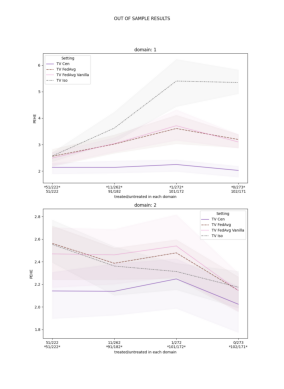

In [42]:
#plot the results in lineplot, the figure is presaved in the results folder
import matplotlib.pyplot as plt
fig_path = results_path + '/ITEerr_lines_test.png'
# Load and display the PNG image
img = plt.imread(fig_path)
plt.imshow(img)
plt.axis('off')  # Hide axes if needed
plt.show()
